In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
import datetime as dt

### The data has been ccleaned in excel files before processing

In [2]:
original_df = pd.read_excel(r'full purchasing.xlsx')
original_df.columns = original_df.iloc[0]
original_df.drop([0], axis=0, inplace=True)
original_df.drop(original_df.columns[0], axis=1, inplace=True)
# original_df.drop(original_df.columns[[0,11]], axis=1, inplace=True)
# original_df['Product Name'] = original_df['Product Name'].str.strip()

original_df.head(2)
original_df['Year'] = pd.DatetimeIndex(original_df['Date']).year
original_df = original_df[original_df['Year'] == 2025]

In [3]:
original_df

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Year
8213,حامل ذراع بمثبت صغير Tiger,Tiger,حامل ذراع بمثبت صغير,S,15,45,675,Kareem,26.4,Hemeda,1,2025-01-02 00:00:00,1/2025,279,2025
8214,حامل ذراع بمثبت Tiger XL,Tiger,حامل ذراع بمثبت XL,XL,15,45,675,Kareem,26.4,Hemeda,1,2025-01-02 00:00:00,1/2025,279,2025
8215,حامل ذراع بمثبت Tiger XXL,Tiger,حامل ذراع بمثبت XXL,XXL,15,45,675,Kareem,26.4,Hemeda,1,2025-01-02 00:00:00,1/2025,279,2025
8216,ماسك طبي,NaN,ماسك طبي,NaN,40,33,1320,Kareem,27,Hemeda,1,2025-01-02 00:00:00,1/2025,240,2025
8217,جوانتي لاتكس لارج يوكير,يوكير,جوانتي لاتكس لارج,L,320,157,50240,El Bayt El Tebby,148,Hemeda,1,2025-01-02 00:00:00,1/2025,2880,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,حاويه نفايات,NaN,حاويه نفايات,NaN,2,850,1700,Heba Lab,700,Arkan Center,152,2025-12-14 00:00:00,152/2026,300,2025
8974,ابر اسباينال برتقالي مقاس ٢٥ KDL,KDL,ابر اسباينال برتقالي مقاس ٢٥,25,300,45.6,13680.0,Motakhssoon,37.25,Taha Yasen,"17""",15/12/2025,"17""/2025",2505.0,2025
8975,شبكة برولين ٦*١١,NaN,شبكة برولين ٦*١١,6*11,15,171.0,2565.0,El Yosr,140,Taha Yasen,"18""",20/12/2025,"18""/2025",465.0,2025
8976,شبكة برولين ١٥*١٥ كوري,كوري,شبكة برولين ١٥*١٥,15*15,15,342.0,5130.0,El Yosr,285,Taha Yasen,"18""",20/12/2025,"18""/2025",855.0,2025


In [4]:
expenses_df = pd.read_excel(r'Expenses Full Data.xlsx')
expenses_df.columns = expenses_df.iloc[0]
expenses_df.drop([0], axis=0, inplace=True)
expenses_df.drop(expenses_df.columns[0], axis=1, inplace=True)
expenses_df = expenses_df[expenses_df['Destination'] != 'dawaa']
expenses_df.head(2)


,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880


In [5]:
Financial_df = pd.read_excel(r'Clients Full Data.xlsx')
Financial_df.columns = Financial_df.iloc[0]
Financial_df.drop([0], axis=0, inplace=True)
Financial_df.drop(Financial_df.columns[0], axis=1, inplace=True)
Financial_df.dropna(subset=['Cogs','Creditor','Debitor'],thresh=1, inplace=True)
Financial_df


,Date,Invoice No.,Cogs,Creditor,Debitor,Balance,Client
1,2020-01-01 00:00:00,1,7405,8192.5,NaN,8192.5,El Mahdy
2,2020-01-01 00:00:00,NaN,NaN,NaN,1000,-1000,El Mahdy
3,2020-01-01 00:00:00,NaN,NaN,NaN,750,-750,El Mahdy
4,2020-01-01 00:00:00,2,1242.5,1312.5,NaN,1312.5,El Mahdy
5,2020-01-01 00:00:00,NaN,NaN,NaN,600,-600,El Mahdy
...,...,...,...,...,...,...,...
16497,2025-12-15 00:00:00,NaN,NaN,NaN,30000,-30000,Taha Yasen
16535,2025-12-18 00:00:00,NaN,NaN,NaN,35000,-35000,Jasmin
16552,2025-12-20 00:00:00,18',7079.7,8094,23540,-15446,Taha Yasen
16561,2025-12-20 00:00:00,NaN,NaN,NaN,425,-425,eman khairy


In [6]:
# original_df.dropna(subset=['Qty.','Unit Price/ LE'],how='any', inplace=True)

In [7]:
# original_df.to_excel('output25.xlsx', index=False)


In [8]:
# original_df['Product Name'] = original_df['Product Name'].str.strip()

In [9]:
# original_df.to_excel('output.xlsx', index=False)

In [10]:
category_dict = {
'Spinal' : 'ابر اسباينال',
'Surgical Needles' : 'ابر جراحيه',
'Sample Needles' : 'ابر سحب',
'Dialysis Needle' : 'ابر غسيل كلوي',
'Pregnancy Test' : 'اختبار حمل',
'Baby Bottle' : 'ازازة لبن للأطفال',
'Steery Strip' : 'استيري سترب',
'ID' : 'اسورة تعريف',
'Hegama Cups' : 'اكواب حجامه',
'Electrode' : 'اليكترود',
'Amadol Blocker' : 'امادول عزل',
'Embo Bag' : 'امبو باج',
'Ear Tubes' : 'انابيب تهوية اذن',
'ET Tube' : 'انبوبة حنجرية',
'Deudenal Tube' : 'انبوبه دودية',
'Chest Tube' : 'انبوبه صدريه',
'Over Head' : 'اوفر شوز',
'Over Shoes' : 'اوفر هيد',
'Eye Patch' : 'اي باتش',
'Egycryl' : 'ايجي كريل',
'Ice Box' : 'ايس بوكس',
'Baby Bottle' : ['ببرونه','ازازة لبن للأطفال'],
'Over Suit' : 'بدلة عزل',
'Breast Suction Vac' : ['برطمان شفاط صدر','برطمان صدر'],
'Potassium Permengnate' : 'برمنجنات بوتاسيوم',
'Prolene' : ['برولين ٠/٢ راوند','برولين ٠/٢ قاطع','برولين ٠/٢ مستقيم','برولين ٠/٣ راوند','برولين ٠/٣ قاطع','برولين ٠/٣ مستقيم','برولين ٠/٤ راوند','برولين ٠/٤ قاطع','برولين ٠/٥ راوند','برولين ٠/٥ قاطع','برولين ٠/٦ ابرتين','برولين ٠/٦ راوند','برولين ٠/٦ قاطع','برولين ٢ راوند','برولين ٢ قاطع','برولين زيرو راوند','برولين زيرو قاطع','برولين واحد راوند','برولين واحد قاطع'],
'Sterilization Roll' : ['بكر تعقيم','رول تعقيم'],
'ECG Roll' : 'بكر رسم قلب',
'Sonar Roll' : 'بكر سونار',
'Plaster' : 'بلاستر طبي',
'Oxygen Pulse' : 'بلص اكسجين',
'Suction Tip' : 'بوز شفاط',
'Polyester' : 'بوليستر',
'Bone Wax' : 'بون واكس',
'BD' : 'بي دي',
'Betadine' : 'بيتادين',
'Thermometer' : ['ترمومتر ثلاجه','ترمومتر ديجيتال','ترمومتر عريض','ترمومتر مبروم'],
'Shash Roll' : 'توب شاش',
'T Tube' : 'تي تيوب',
'Sterilization Tape' : 'تيب تعقيم',
'Ice' : 'ثلج',
'Doctor Gown' : 'جاون طبيب',
'Patient Gown' : 'جاون مريض',
'Gypsona' : 'جبسونا',
'Camera Cover' : 'جراب كاميرا',
'Surgical Graft' : 'جرافت جراحي',
'Dialysis Sterilization Liquid' : 'جركن تعقيم',
'Dialysis Liquid' : 'جركن غسيل كلوي',
'Alcohol' : 'كحول',
'KY Gel' : 'جل KY',
'Sonar Gel' : 'جل سونار',
'Foam Gel' : 'جل فوم',
'Telescope Rubber' : 'جلدة تيليسكوب',
'Glycerine' : 'جلسرين',
'PCA' : 'جهاز تسكين الألم بي سي ايه',
'Rectal Syringe Set' : 'جهاز حقنة شرجية',
'Glucose Set' : 'جهاز سكر',
'Pressure Set' : 'جهاز ضغط',
'Flowmeter Set' : 'جهاز فلوميتير',
'Hemoglobin Set' : 'جهاز قياس الهيموجلوبين',
'Nebulizer Set' : 'جهاز نبيولايزر',
'Blood Transfusion' : 'جهاز نقل دم',
'IV Set' : 'جهاز وريد',
'Antivirus Gloves' : 'جوانتي انتي فيرس',
'Check Gloves' : 'جوانتي فحص',
'Latex' : 'جوانتي لاتكس',
'Sterile Gloves' : 'جوانتي معقم',
'Nitrile' : 'جوانتي نيتريل',
'Arm Holder' : 'حامل ذراع',
'Stabilizer Arm Holder' : 'حامل ذراع بمثبت',
'Silk' : 'حرير',
'Abdomen Belt' : 'حزام بطن',
'Testes Belt' : 'حزام رافع خصيه',
'Chest Belt' : 'حزام صدر',
'Nose Filler' : 'حشو انف',
'Diapers' : 'حفاضات',
'Tongue Depressor' : 'خافض لسان',
'Skin Stapler Remover' : 'خلاعه دبابيس',
'BDS' : 'خيط بي دي اس',
'Cervical' : 'خيط ربط عنق',
'Chromic' : 'خيط كروميك',
'Nylon' : 'خيط نايلون',
'Di Flow' : 'داي فلو',
'Skin Stapler' : 'دباسه جلد',
'Suction Vac Tube' : 'درنقة حصيرة',
'Dressing' : 'دريسنج',
'Nose Support' : 'دعامه انفيه',
'Bandage' : 'رباط ضاغط',
'Rosas' : 'رصاص',
'Neck Support' : 'رقبة',
'Oil' : 'زيت',
'Parafin Oil' : 'زيت بارافين',
'IV Burette' : 'سالوست',
'Cidex' : 'سايدكس',
'Sponge' : 'سبونج معقم',
'Sterilium' : 'ستريليم',
'Syringe' : 'سرنجات',
'Doctor Scrub' : 'سكراب طبيب',
'Cutting Wire' : 'سلك بتر',
'Stethoscope' : 'سماعه طبيب',
'Insulin Pen Tip' : 'سن قلم انسولين',
'Soof Pad' : 'سوف باد',
'Surgical Pad' : 'سيرجيكال باد',
'Safety Box' : 'سيفتي بوكس',
'Shash' : 'شاش',
'Vasiline Shash' : 'شاش فازلين',
'Shamber Modifier' : 'شامبر موديفير',
'Prolene Mesh' : 'شبكة برولين',
'Hemoglobin Strips' : 'شرائط الهيموجلوبين',
'Glucose Strips' : 'شرائط سكر',
'Cholestrol Strips' : 'شرائط كوليسترول',
'Varicose Veins Socks' : 'شراب دوالي',
'Surgical Vac' : 'شفاط جراحي',
'Blood Lancets' : 'شكاكه',
'Doctor Crocs' : 'صابوة طبيب',
'Diathermy Blocker' : 'عازل دياثيرم',
'Binoculars' : 'عضاضه مناظير',
'Pharmapore' : 'فارمابور',
'Surgical Gown' : 'فرش جراحي',
'Baby Bed Dressing' : 'فرش حضانه',
'Vicryl' : 'فكريل',
'Stool Bag' : ['فلانشه','كيس فلانشه','كيس براز'],
'Bacterial Filter' : 'فلتر بكتيري',
'Dialysis Filter' : 'فلتر غسيل كلوي',
'Lap Sample Tubes' : 'فوارغ معمل',
'Abdomen Towels' : 'فوط بطن',
'Sterilization Towels' : 'فوط تعقيم',
'Spinal Towels' : 'فوط سباينال',
'Surgical Towels' : ['فوط فرش','فوط فنيك','فوط جراحيه'],
'Face Sheild' : 'فيس شيلد',
'CVP Catheter' : 'قسطرة CVP',
'Epidural Catheter' : 'قسطرة ابيديورل',
'Feeding Rayl Catheter' : 'قسطرة رايل',
'Silicone Catheter' : 'قسطرة سيليكون',
'Rectal Catheter' : 'قسطرة شرجيه',
'Suction Catheter' : 'قسطرة شفط',
'Breast Catheter' : 'قسطرة صدرية',
'Dialysis Catheter' : ['قسطرة غسيل كلوي','قسطرة غسيل كلوي ماهوكر','قسطرة ماهوكر مستقيم'],
'Fogarty Catheter' : 'قسطرة فوجارتي',
'Folley Catheter' : 'قسطرة فولي',
'CVS Catheter' : 'قسطرة قلبيه',
'External Catheter' : 'قسطرة كاندم',
'Nelaton Catheter' : 'قسطرة نيلاتون',
'U.Cord Catheter' : 'قسطره سرة',
'Baby Stool Set' : 'قصرية',
'Cotton' : 'قطن',
'Doctor Cap' : 'كاب طبيب',
'Patient Cap' : 'كاب مريض',
'Nurse Cap' : 'كاب ممرضه ازرق',
'Diathermy Cable' : 'كابل دياثيرم',
'Biological Detector' : 'كاشف بيولوجي',
'Tape Detector' : 'كاشف شريط',
'IV Cannula' : ['كانيولا اخضر مقاس ١٨','كانيولا ازرق مقاس ٢٢','كانيولا اصفر مقاس ٢٤','كانيولا بمبي مقاس ٢٠','كانيولا بنفسجي مقاس ٢٦','كانيولا رصاصي مقاس ١٦'],
'Nasal Cannula' : 'كانيولا انفيه',
'Bi Bag Dialysis Capsules' : 'كبسولات غسيل كلوي باي باج',
'Digital Blood Pressure Cuff' : 'كف ضغط ديجيتال لارج',
'Monitor Cuff' : 'كف مونوتور',
'U.Cord Clamp' : 'كلبس سرة',
'Gallbladder Clamp' : 'كلبس مرارة',
'Polymer Clamp' : 'كلبسات بوليمير',
'Chlorine Tablet' : 'كلور اقراص',
'Sample Cup' : 'كوب تعقيم',
'Stress Ball' : 'كورة أعصاب',
'Ice Bag' : 'كيس تبريد',
'Breathing Bag' : 'كيس تنفس',
'Urine Bag' : 'كيس جمع بول',
'Liso Bag' : 'كيس ليزو',
'Baby Pacifiers' : 'لهايات',
'Loop' : 'لوب',
'Lup' : 'لولب',
'Linor' : 'لينور',
'Oxygen Water' : 'ماء اكسجين',
'N95 Mask' : 'ماسك N95',
'Oxygen Mask' : 'ماسك اكسجين',
'CPAP Mask' : 'ماسك سباب',
'Mask' : 'ماسك طبي',
'KN95 Mask' : 'ماسك طبي KN95',
'Venturi Mask' : 'ماسك فينتوري',
'Laryngial Mask' : 'ماسك لارنجال',
'Nebulizer Mask' : 'ماسك نبيولايزر',
'Anathesia Mask' : 'ماسك وصله تخدير',
'Makentosh' : 'ماكنتوش',
'Hard Urine Bag' : 'مبولة',
'Cannula Fixator' : 'مثبت كانيولا',
'Glucose Saline' : 'محلول جلوكوز',
'Ringer saline' : 'محلول رينجر',
'Normal Saline' : 'محلول ملح',
'Temperature Set' : 'مسدس قياس حرارة',
'CVP Ruler' : 'مسطرة CVP',
'Blades' : 'مشرط جراحي',
'Bed Dressing' : ['مفرش سرير','ملاية شق'],
'Airway Tube' : 'ممر هواء',
'Tissues' : 'مناديل',
'Cuff Monitor' : 'منظم كف',
'Monocryl' : 'مونوكريل',
'Scaler' : 'ميزان',
'Galsses' : 'نظارة محضن',
'Sterilization Paper' : ['ورق تعقيم','ورق جهاز صدمات'],
'IV Extension Line' : 'وصلة امتداد وريدي',
'CPAP Extension' : 'وصلة سباب',
'Dialysis Extension' : 'وصلة غسيل كلوي',
'Anathesia Extension' : ['وصله احاديه تخدير','وصله تخدير'],
'Breathing Circuits' : 'وصله تنفس',
'3Way Stopcock' : 'وصله ثلاثية',
'CPAP Extension' : 'وصلة سباب',
'Vent Extension' : 'وصله فنت',
'Monitor Extension' : 'وصله مونيتور',
'Pharmaceuticals' : 'Dawaa'
}

In [11]:
def categorize_product(product_name):
    for key, value in category_dict.items():
        if isinstance(value,list):
            if any(term in product_name for term in value):
                return key
        else:
            if value in product_name:
                return key
    return 'uncategorized'


original_df['Category'] = original_df['Product Name'].apply(categorize_product)


### check if all products categorized or not

In [12]:
# original_df[original_df['Category'] == 'uncategorized']
# pd.set_option('display.max_rows', None)
original_df[original_df['Category'] == 'uncategorized']


,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Year,Category
8864,معصم لارج Zola,Zola,معصم لارج,L,4,20,80,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,30.2,2025,uncategorized
8865,معصم ميديم Zola,Zola,معصم ميديم,M,3,20,60,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,22.65,2025,uncategorized
8866,معصم اكس لارج Zola,Zola,معصم اكس لارج,XL,3,20,60,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,22.65,2025,uncategorized
8871,ركبه لارج Zola,Zola,ركبه لارج,L,4,30,120,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,12,2025,uncategorized
8872,ركبه ميديم Zola,Zola,ركبه ميديم,M,3,30,90,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,9,2025,uncategorized
8873,ركبه اكس لارج Zola,Zola,ركبه اكس لارج,XL,3,30,90,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,9,2025,uncategorized
8885,عكاز ثابت,NaN,عكاز ثابت,NaN,2,600,1200,Kareem,455,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,290,2025,uncategorized
8896,ترنوكيه,NaN,ترنوكيه,NaN,3,30,90,Heba Lab,30,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,0,2025,uncategorized
8946,سيرجي سيل,NaN,سيرجي سيل,NaN,20,125,2500,Kareem,110,Taha Yasen,142,19/11/2025,142/2025,300,2025,uncategorized
8973,حاويه نفايات,NaN,حاويه نفايات,NaN,2,850,1700,Heba Lab,700,Arkan Center,152,2025-12-14 00:00:00,152/2026,300,2025,uncategorized


In [13]:
category_dict.update({'Hand Rest' : 'معصم',
                      'Knee Rest' : 'ركبه',
                      'Stand Holder' : 'عكاز',
                      'Tourniquet' : 'ترنوكيه',
                      'Hemostat' : 'سيرجي سيل',
                      'Plastic Rubbish Holder' : 'حاويه نفايات'})

In [14]:
original_df['Category'] = original_df['Product Name'].apply(categorize_product)

### recheck for uncategorized products again

In [15]:
original_df[original_df['Category'] == 'uncategorized']

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Year,Category


# 1. Sales & Revenue Metrics

In [16]:
Financial_df.head(2)

,Date,Invoice No.,Cogs,Creditor,Debitor,Balance,Client
1,2020-01-01 00:00:00,1,7405,8192.5,NaN,8192.5,El Mahdy
2,2020-01-01 00:00:00,NaN,NaN,NaN,1000,-1000,El Mahdy


In [17]:
original_df['Year'] = pd.DatetimeIndex(original_df['Date']).year
original_df['Month'] = pd.DatetimeIndex(original_df['Date']).month

In [18]:
Financial_df['Year'] = pd.DatetimeIndex(Financial_df['Date']).year
Financial_df['Month'] = pd.DatetimeIndex(Financial_df['Date']).month

### Total Sales Revenue (by year, quarter, month, week, day)
### Yearly Growth Rate

In [19]:
total_sales_by_year = Financial_df.groupby('Year')['Creditor'].sum().reset_index()
total_sales_by_year['Growth Rate'] = total_sales_by_year['Creditor'].pct_change() * 100
total_sales_by_year.round(1)

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/1014016078.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_sales_by_year['Growth Rate'] = total_sales_by_year['Creditor'].pct_change() * 100


,Year,Creditor,Growth Rate
0,2020,1584815.4625,NaN
1,2021,1592422.628431,0.5
2,2022,1866294.2718,17.2
3,2023,2783624.13,49.2
4,2024,7863257.17581,182.5
5,2025,9303421.8725,18.3


### Grawth Rate from Year one

In [20]:
start_value = total_sales_by_year["Creditor"].iloc[1]
end_value = total_sales_by_year["Creditor"].iloc[-2]
years = 5

Growth_Rate = ((end_value / start_value) ** (1/years) - 1) * 100
Growth_Rate

37.628643036311175

### Revenue Per Product

In [21]:
Revenue_per_product = original_df.groupby('Product Name')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_product.head(10)

,index,Product Name,Total Selling Price
0,66,جوانتي لاتكس لارج,394852.0
1,146,فكريل واحد راوند متر,341887.5
2,159,فكريل ٢ راوند متر,340965
3,198,كانيولا اصفر مقاس ٢٤,276926
4,1,ابر اسباينال برتقالي مقاس ٢٥,129325.0
5,149,فكريل ٠/٢ قاطع,91602
6,67,جوانتي لاتكس ميديم,82411
7,20,برولين ٠/٢ مستقيم,69298
8,61,جهاز وريد,65893.5
9,32,بلاستر طبي ١٠سم,61925


### Revenue Per Category

In [22]:
Revenue_per_category = original_df.groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_category.head(10)

,index,Category,Total Selling Price
0,107,Vicryl,1013131.5
1,58,Latex,531869.0
2,52,IV Cannula,399626.0
3,89,Spinal,146945.0
4,79,Prolene,118725.0
5,77,Plaster,112640
6,91,Sterile Gloves,101828.5
7,100,Syringe,72704.0
8,54,IV Set,65893.5
9,96,Surgical Gown,58826


### Category per units sold

In [23]:
Category_per_units_sold = original_df.groupby('Category')['Qty.'].sum().reset_index().sort_values(by='Qty.', ascending=False).reset_index()
Category_per_units_sold.head(10)
# Category_per_units_sold['rank']= Category_per_units_sold['Qty.'].rank(ascending=False)
# Category_per_units_sold.head(10)


,index,Category,Qty.
0,91,Sterile Gloves,9400
1,41,Feeding Rayl Catheter,9120
2,54,IV Set,8940
3,52,IV Cannula,6017
4,100,Syringe,4816
5,58,Latex,3483
6,89,Spinal,3400
7,6,Baby Bed Dressing,3300
8,77,Plaster,2680
9,11,Bed Dressing,2209


### Category per size

In [24]:
Category_size = original_df.groupby('Category').size().reset_index(name='Counts').sort_values(by='Counts', ascending=False).reset_index()
Category_size.head(10)

,index,Category,Counts
0,107,Vicryl,175
1,79,Prolene,56
2,58,Latex,43
3,100,Syringe,33
4,52,IV Cannula,32
5,91,Sterile Gloves,28
6,80,Prolene Mesh,16
7,89,Spinal,15
8,54,IV Set,15
9,41,Feeding Rayl Catheter,14


### Category per MFG

In [25]:
Revenue_per_mfg = original_df.groupby('MFG')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_mfg.head(10)

,index,MFG,Total Selling Price
0,14,Provin,344411.0
1,3,Egysorb,254769.5
2,11,KDL,146945.0
3,15,Silkplast,112640
4,8,GMS,102544.5
5,17,Ultra,97292.75
6,24,الدولية,72704.0
7,19,اكسيل,69875
8,42,يوكير,50240
9,26,الفرعونيه,36610


# 2.Profitability Metrics

### Total Profit Per Year
### Profit Growth Rate YOY

In [26]:
Financial_df['Creditor'] = pd.to_numeric(Financial_df['Creditor'], errors='coerce')
Financial_df['Cogs'] = pd.to_numeric(Financial_df['Cogs'], errors='coerce')


In [27]:
total_profits_by_year = Financial_df.groupby('Year').agg(revenue=("Creditor", "sum") , cogs = ("Cogs", "sum")).reset_index()
total_profits_by_year['Profit'] = total_profits_by_year['revenue'] - total_profits_by_year['cogs']
total_profits_by_year['Profit Margin'] = (total_profits_by_year['Profit'] / total_profits_by_year['revenue']) * 100
total_profits_by_year['Growth Rate'] = total_profits_by_year['Profit'].pct_change() * 100
total_profits_by_year.round(1)

,Year,revenue,cogs,Profit,Profit Margin,Growth Rate
0,2020,1584815.5,1435609.6,149205.9,9.4,NaN
1,2021,1592422.6,1447530.8,144891.8,9.1,-2.9
2,2022,1866294.3,1588133.4,278160.9,14.9,92.0
3,2023,2783624.1,2500627.7,282996.4,10.2,1.7
4,2024,7863257.2,7370826.4,492430.8,6.3,74.0
5,2025,9303421.9,8733532.1,569889.7,6.1,15.7


### Profit Growth Rate from year one

In [28]:
start_value = total_profits_by_year["Profit"].iloc[1]
end_value = total_profits_by_year["Profit"].iloc[-2]
years = 5

Profit_Growth_Rate = ((end_value / start_value) ** (1/years) - 1) * 100
Profit_Growth_Rate

np.float64(27.72039483555684)

### Profit Margin %

In [29]:
Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
                                                 Selling_sum=("Total Selling Price", "sum")
    )
    .reset_index()
)

# Then calculate profit margin
Profit_margin["Profit_Margin"] = Profit_margin["Profit_sum"] / Profit_margin["Selling_sum"]*100
Profit_margin

,Year,Profit_sum,Selling_sum,Profit_Margin
0,2025,329935.86,3392914.76,9.72426


In [30]:
total_profits_by_year

,Year,revenue,cogs,Profit,Profit Margin,Growth Rate
0,2020,1.584815e+06,1.435610e+06,149205.897500,9.414717,NaN
1,2021,1.592423e+06,1.447531e+06,144891.838431,9.098831,-2.891346
2,2022,1.866294e+06,1.588133e+06,278160.851800,14.904448,91.978275
3,2023,2.783624e+06,2.500628e+06,282996.425000,10.166474,1.738409
4,2024,7.863257e+06,7.370826e+06,492430.773130,6.262427,74.006005
5,2025,9.303422e+06,8.733532e+06,569889.729500,6.125593,15.729918


### Profit by Category
### Top Profit-Generating Products
### Profit Margin from each Category


In [31]:
Profit_margin_category = original_df.groupby('Category').agg(Profit_sum=("Profit", "sum"),
                                                 Selling_sum=("Total Selling Price", "sum")).reset_index().sort_values(by='Profit_sum', ascending=False).reset_index()

Profit_margin_category["Profit_Margin"] = Profit_margin_category["Profit_sum"] / Profit_margin_category["Selling_sum"]*100

Profit_margin_category.head(10)

,index,Category,Profit_sum,Selling_sum,Profit_Margin
0,107,Vicryl,98373.0,1013131.5,9.709796
1,58,Latex,39367.0,531869.0,7.401635
2,52,IV Cannula,34196.0,399626.0,8.557001
3,89,Spinal,17095.0,146945.0,11.633604
4,79,Prolene,11190.0,118725.0,9.425142
5,91,Sterile Gloves,10401.0,101828.5,10.214233
6,77,Plaster,9911.25,112640,8.79905
7,27,Dialysis Filter,7778.0,56112.0,13.861563
8,54,IV Set,6676.5,65893.5,10.132259
9,23,Chlorine Tablet,6489.6,34329.6,18.903803


### sorting by revenue

In [32]:
Profit_margin_category.sort_values(by = 'Selling_sum', ascending = False).head(10)

,index,Category,Profit_sum,Selling_sum,Profit_Margin
0,107,Vicryl,98373.0,1013131.5,9.709796
1,58,Latex,39367.0,531869.0,7.401635
2,52,IV Cannula,34196.0,399626.0,8.557001
3,89,Spinal,17095.0,146945.0,11.633604
4,79,Prolene,11190.0,118725.0,9.425142
6,77,Plaster,9911.25,112640,8.79905
5,91,Sterile Gloves,10401.0,101828.5,10.214233
17,100,Syringe,3314.75,72704.0,4.55924
8,54,IV Set,6676.5,65893.5,10.132259
10,96,Surgical Gown,5055,58826,8.593139


# 3. Quantity & Volume Metrics

### Total Quantity Sold

In [33]:
Category_per_units_sold = original_df.groupby('Category')['Qty.'].sum().reset_index().sort_values(by='Qty.', ascending=False).reset_index()
Category_per_units_sold.head(20)

,index,Category,Qty.
0,91,Sterile Gloves,9400
1,41,Feeding Rayl Catheter,9120
2,54,IV Set,8940
3,52,IV Cannula,6017
4,100,Syringe,4816
5,58,Latex,3483
6,89,Spinal,3400
7,6,Baby Bed Dressing,3300
8,77,Plaster,2680
9,11,Bed Dressing,2209


### Average Quantity per Transaction

In [34]:
original_df['Qty.'].sum() / original_df['Invoice No'].nunique()

453.1575757575758

In [35]:
original_df.groupby('Year').apply(lambda x : x['Qty.'].sum() / x['Invoice No'].nunique()).reset_index(name='Avg_Qty_per_Transaction')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/213644599.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  original_df.groupby('Year').apply(lambda x : x['Qty.'].sum() / x['Invoice No'].nunique()).reset_index(name='Avg_Qty_per_Transaction')


,Year,Avg_Qty_per_Transaction
0,2025,453.157576


### Most Frequently Purchased Products

In [36]:
Category_size = original_df.groupby('Category').size().reset_index(name='Counts').sort_values(by='Counts', ascending=False).reset_index()
Category_size.head(10)

,index,Category,Counts
0,107,Vicryl,175
1,79,Prolene,56
2,58,Latex,43
3,100,Syringe,33
4,52,IV Cannula,32
5,91,Sterile Gloves,28
6,80,Prolene Mesh,16
7,89,Spinal,15
8,54,IV Set,15
9,41,Feeding Rayl Catheter,14


# 4. Supplier Performance Metrics

### Total Purchases from Each Supplier

In [37]:
original_df['Total Buying Price'] = original_df['Qty.'] * original_df['Buying Price']
original_df.groupby('Supplier')['Total Buying Price'].sum().reset_index().sort_values(by='Total Buying Price', ascending=False).reset_index().head(10)

,index,Supplier,Total Buying Price
0,20,Safa,1647682.28
1,10,El Yosr,277406.0
2,3,Amazon,273245.0
3,15,Kareem,145870.37
4,7,El Hanafy,103571.0
5,17,Motakhssoon,89535.0
6,2,Ahmed Mongey,88569
7,13,FOX,87085
8,6,El Bayt El Tebby,52010
9,9,El Malek,46071.5


### Total Profit

In [38]:
Supplier_revenue_profit = original_df.groupby('Supplier').agg(Profit_sum=("Profit", "sum"),
                                                 Buying_sum=("Total Buying Price", "sum"),
                                                 revenue_sum = ("Total Selling Price","sum")).reset_index().sort_values(by='Buying_sum', ascending=False).reset_index()
Supplier_revenue_profit['contribution_margin'] = Supplier_revenue_profit['Profit_sum'] / Supplier_revenue_profit['revenue_sum'] * 100
Supplier_revenue_profit.head(10)

,index,Supplier,Profit_sum,Buying_sum,revenue_sum,contribution_margin
0,20,Safa,173855.32,1647682.28,1821537.6,9.544427
1,10,El Yosr,28509.0,277406.0,305915.0,9.319255
2,3,Amazon,17690.0,273245.0,290935,6.080396
3,15,Kareem,18142.99,145870.37,164013.36,11.061898
4,7,El Hanafy,12785,103571.0,116356,10.98783
5,17,Motakhssoon,14637.4,89535.0,104172.4,14.051131
6,2,Ahmed Mongey,12583.0,88569,101152.0,12.439695
7,13,FOX,7661,87085,94746,8.085829
8,6,El Bayt El Tebby,3090,52010,55100,5.607985
9,9,El Malek,6095.5,46071.5,52167,11.68459


### Supplier Dependence %

In [39]:
supplier_by_year = original_df.groupby(['Supplier','Year'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])
supplier_by_year

,Supplier,Year,Total Buying Price
20,Safa,2025,1647682.28
10,El Yosr,2025,277406.0
3,Amazon,2025,273245.0
15,Kareem,2025,145870.37
7,El Hanafy,2025,103571.0
17,Motakhssoon,2025,89535.0
2,Ahmed Mongey,2025,88569
13,FOX,2025,87085
6,El Bayt El Tebby,2025,52010
9,El Malek,2025,46071.5


In [40]:
buying_by_year = original_df.groupby('Year')['Total Buying Price'].sum().reset_index()
buying_by_year.rename(columns={'Total Buying Price':'Total Buying Price Yearly'}, inplace=True)
buying_by_year

,Year,Total Buying Price Yearly
0,2025,3062978.9


In [41]:
supplier_pivot = supplier_by_year.merge(buying_by_year, on='Year', how='left').reset_index()
supplier_pivot['Supplier Dependence %'] = supplier_pivot['Total Buying Price'] / supplier_pivot['Total Buying Price Yearly'] * 100
supplier_pivot.sort_values(by='Supplier Dependence %', ascending=False).head(20)

,index,Supplier,Year,Total Buying Price,Total Buying Price Yearly,Supplier Dependence %
0,0,Safa,2025,1647682.28,3062978.9,53.793458
1,1,El Yosr,2025,277406.0,3062978.9,9.056739
2,2,Amazon,2025,273245.0,3062978.9,8.920891
3,3,Kareem,2025,145870.37,3062978.9,4.762369
4,4,El Hanafy,2025,103571.0,3062978.9,3.381381
5,5,Motakhssoon,2025,89535.0,3062978.9,2.923135
6,6,Ahmed Mongey,2025,88569,3062978.9,2.891597
7,7,FOX,2025,87085,3062978.9,2.843147
8,8,El Bayt El Tebby,2025,52010,3062978.9,1.69802
9,9,El Malek,2025,46071.5,3062978.9,1.50414


# 5. Customer Performance Metrics

### Top Customers by Sales Volume

In [42]:
Customer_data2 = Financial_df.groupby('Client').agg(Sales_sum=("Creditor", "sum"),
                                 Transactions_count=("Creditor", "count"),
                                 COGS_sum = ("Cogs", "sum"),
                                 years_in_business=("Year", "nunique"),).reset_index().sort_values(by='Sales_sum', ascending=False)
Customer_data2['Profit_sum'] = Customer_data2['Sales_sum'] - Customer_data2['COGS_sum']
Customer_data2['Contribution Margin %'] = Customer_data2['Profit_sum'] / Customer_data2['Sales_sum'] * 100
Customer_data2['Cumalative_Sales_%'] = Customer_data2['Sales_sum'].cumsum() / Customer_data2['Sales_sum'].sum() * 100
Customer_data2['Cumalative_Profit_%'] = Customer_data2['Profit_sum'].cumsum() / Customer_data2['Profit_sum'].sum() * 100

Customer_data2.head(10)

,Client,Sales_sum,Transactions_count,COGS_sum,years_in_business,Profit_sum,Contribution Margin %,Cumalative_Sales_%,Cumalative_Profit_%
64,Wayaak,1.064632e+07,112,1.023557e+07,3,410754.375630,3.858180,42.617695,21.435586
60,Taha Yasen,3.202414e+06,349,2.867699e+06,6,334715.797000,10.451983,55.437098,38.903030
37,Jasmin,2.935501e+06,111,2.602852e+06,3,332648.850000,11.331929,67.188035,56.262609
34,Hemeda,1.635844e+06,238,1.466787e+06,6,169057.590000,10.334576,73.736391,65.085031
9,Bnoon,1.115427e+06,49,1.031086e+06,6,84340.500000,7.561275,78.201494,69.486415
31,Galal,7.836598e+05,69,6.443353e+05,3,139324.501800,17.778697,81.338518,76.757189
22,El Asema,6.310086e+05,87,5.567727e+05,4,74235.848431,11.764634,83.864473,80.631254
29,El Safwa,4.127091e+05,87,3.655116e+05,5,47197.510000,11.436024,85.516565,83.094298
52,Royal,3.671680e+05,25,3.394420e+05,2,27726.000000,7.551312,86.986354,84.541204
6,Amina,3.376710e+05,27,3.243705e+05,3,13300.500000,3.938893,88.338066,85.235303


In [43]:
Customer_data = original_df.groupby('Client').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum"),
                                 Transactions_count=("Invoice No", "nunique"),
                                 Products_No=("Product Name", "nunique"),
                                 Category_No=("Category", "nunique"),
                                 years_in_business=("Year", "nunique"),
                                 Units_sold=("Qty.", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)
Customer_data['Contribution Margin %'] = Customer_data['Profit_sum'] / Customer_data['Sales_sum'] * 100
Customer_data.head(10)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %
7,Jasmin,1289281.5,154577.5,40,63,34,1,36520,11.98943
13,Taha Yasen,679153.96,88309.71,41,71,37,1,9449,13.0029
3,Bnoon,579930,38307,10,18,12,1,12560,6.605452
10,Royal,220313,13525,14,26,11,1,3583,6.138993
11,SHARQA,185913.0,7981.25,16,62,30,1,2508,4.293003
1,Amina,180897.5,4187.5,11,19,11,1,5316,2.314847
6,Hemeda,74750,6294.5,1,11,6,1,2005,8.420736
0,ADAM,55666,4431,13,17,13,1,444,7.959976
8,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,32,1,1097,14.661221
2,Arkan Center,29737.5,2792.75,10,29,20,1,500.0,9.391341


In [44]:
retension = original_df.groupby('Year').agg(Unique_Customers_per_Year = ('Client' , 'nunique'),
                                Sales_sum=("Total Selling Price", "sum"),
                                Profit_sum=("Profit", "sum"),
                                Products_No=("Product Name", "nunique"),
                                Category_No=("Category", "nunique"),
                                Transactions_count=("Invoice No", "nunique")).reset_index()
retension['Avg_Sales_per_Customer'] = retension['Sales_sum'] / retension['Unique_Customers_per_Year']
retension['Avg_Sales_per_Transaction'] = retension['Sales_sum'] / retension['Transactions_count']
retension['Contribution_Margin_%'] = retension['Profit_sum'] / retension['Sales_sum'] * 100
retension.transpose()

,0
Year,2025
Unique_Customers_per_Year,14
Sales_sum,3392914.76
Profit_sum,329935.86
Products_No,240
Category_No,108
Transactions_count,165
Avg_Sales_per_Customer,242351.054286
Avg_Sales_per_Transaction,20563.119758
Contribution_Margin_%,9.72426


### CLV

### CLV=((AOV×Purchase Frequency×Gross Margin​) / (1+Discount Rate−Retention Rate) )

In [45]:
Customer_data['AOV'] = Customer_data['Sales_sum'] / Customer_data['Transactions_count']
Customer_data['Purchase_Frequency'] = Customer_data['Transactions_count'] / Customer_data["years_in_business"]
Customer_data['Gross_Margin'] = Customer_data['Profit_sum'] / Customer_data['Sales_sum']
Customer_data['CLV'] = (Customer_data['AOV'] * Customer_data['Purchase_Frequency'] * Customer_data['Gross_Margin']) / (1 + 0.1 - 0.95)  # Assuming Discount Rate = 10% and Retention Rate = 95%
Customer_data.sort_values(by= 'CLV', ascending= False).head(10)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,AOV,Purchase_Frequency,Gross_Margin,CLV
7,Jasmin,1289281.5,154577.5,40,63,34,1,36520,11.98943,32232.0375,40.0,0.119894,1030516.666667
13,Taha Yasen,679153.96,88309.71,41,71,37,1,9449,13.0029,16564.730732,41.0,0.130029,588731.4
3,Bnoon,579930,38307,10,18,12,1,12560,6.605452,57993.0,10.0,0.066055,255380.0
10,Royal,220313,13525,14,26,11,1,3583,6.138993,15736.642857,14.0,0.06139,90166.666667
11,SHARQA,185913.0,7981.25,16,62,30,1,2508,4.293003,11619.5625,16.0,0.04293,53208.333333
8,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,32,1,1097,14.661221,23595.75,2.0,0.146612,46125.666667
6,Hemeda,74750,6294.5,1,11,6,1,2005,8.420736,74750.0,1.0,0.084207,41963.333333
0,ADAM,55666,4431,13,17,13,1,444,7.959976,4282.0,13.0,0.0796,29540.0
1,Amina,180897.5,4187.5,11,19,11,1,5316,2.314847,16445.227273,11.0,0.023148,27916.666667
2,Arkan Center,29737.5,2792.75,10,29,20,1,500.0,9.391341,2973.75,10.0,0.093913,18618.333333


In [46]:
original_df['Date'] = pd.to_datetime(original_df['Date'])
customer_lifespan = original_df.groupby('Client')['Date'].agg(['min', 'max'])
customer_lifespan['observed_lifespan_years'] = (customer_lifespan['max'] - customer_lifespan['min']).dt.days / 365
customer_lifespan['observed_lifespan_years'] = customer_lifespan['observed_lifespan_years'].replace(0, 1/12)  # Replace 0 with 1 month in years
average_lifespan = customer_lifespan['observed_lifespan_years'].mean()
average_lifespan

np.float64(0.530968688845401)

In [47]:
customer_lifespan.sort_values(by='observed_lifespan_years', ascending=False).head(20)

,min,max,observed_lifespan_years
Client,,,
Jasmin,2025-01-08,2025-12-20,0.947945
Taha Yasen,2025-01-08,2025-12-20,0.947945
SHARQA,2025-02-26,2025-12-04,0.769863
Cash Customer,2025-03-04,2025-12-07,0.761644
Bnoon,2025-01-25,2025-10-27,0.753425
Amina,2025-01-05,2025-08-30,0.649315
Eman Khairy,2025-05-08,2025-12-11,0.594521
Royal,2025-03-24,2025-10-25,0.589041
ADAM,2025-02-26,2025-08-27,0.498630


In [48]:
dropped_customer_list = ["El Mahdy",
"Dr. Alaa El Saka",
"Dr. Salah",
"Rahma",
"Salah Salem",
"Nokhba",
"Montazah",
"Bright",
"El Hayat",
"Khaled Alexandria",
"Zagazig University",
"Hamdy El Sayed",
"Royal Sharqia",
"Rahma Pharmacy",
"Emad Montazah",
"Rabbat",
"Kamel Pharmacy",
"Ibn Sina",
"Adam Banha",
"Al Srour",
"Sharqia",
"Asmaa S Salem",
"El Safwa",
"Al Moaezz / El Kasr El Einy",
"Dr. Ahmed  Abdou Sanad",
"Montazah Pediatric",
"Tarooty",
"Radiology Center",
"El Asema",
"El Abd",
"Galal",
"Dr. Islam Sameer",
"Maghraby",
"Hamediya",
"Wady El Tip",
"Shourok",
"Dr. M.Fawzy"]

### Customer Buying Frequency

In [49]:
Customer_data.sort_values(by='Purchase_Frequency', ascending=False).head(20)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,AOV,Purchase_Frequency,Gross_Margin,CLV
13,Taha Yasen,679153.96,88309.71,41,71,37,1,9449,13.0029,16564.730732,41.0,0.130029,588731.4
7,Jasmin,1289281.5,154577.5,40,63,34,1,36520,11.98943,32232.0375,40.0,0.119894,1030516.666667
11,SHARQA,185913.0,7981.25,16,62,30,1,2508,4.293003,11619.5625,16.0,0.04293,53208.333333
10,Royal,220313,13525,14,26,11,1,3583,6.138993,15736.642857,14.0,0.06139,90166.666667
0,ADAM,55666,4431,13,17,13,1,444,7.959976,4282.0,13.0,0.0796,29540.0
1,Amina,180897.5,4187.5,11,19,11,1,5316,2.314847,16445.227273,11.0,0.023148,27916.666667
3,Bnoon,579930,38307,10,18,12,1,12560,6.605452,57993.0,10.0,0.066055,255380.0
2,Arkan Center,29737.5,2792.75,10,29,20,1,500.0,9.391341,2973.75,10.0,0.093913,18618.333333
4,Cash Customer,25599.8,1089.8,4,4,4,1,17,4.257065,6399.95,4.0,0.042571,7265.333333
8,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,32,1,1097,14.661221,23595.75,2.0,0.146612,46125.666667


In [50]:
Customer_data.sort_values(by='years_in_business', ascending=False).head(25)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,AOV,Purchase_Frequency,Gross_Margin,CLV
7,Jasmin,1289281.5,154577.5,40,63,34,1,36520,11.98943,32232.0375,40.0,0.119894,1030516.666667
13,Taha Yasen,679153.96,88309.71,41,71,37,1,9449,13.0029,16564.730732,41.0,0.130029,588731.4
3,Bnoon,579930,38307,10,18,12,1,12560,6.605452,57993.0,10.0,0.066055,255380.0
10,Royal,220313,13525,14,26,11,1,3583,6.138993,15736.642857,14.0,0.06139,90166.666667
11,SHARQA,185913.0,7981.25,16,62,30,1,2508,4.293003,11619.5625,16.0,0.04293,53208.333333
1,Amina,180897.5,4187.5,11,19,11,1,5316,2.314847,16445.227273,11.0,0.023148,27916.666667
6,Hemeda,74750,6294.5,1,11,6,1,2005,8.420736,74750.0,1.0,0.084207,41963.333333
0,ADAM,55666,4431,13,17,13,1,444,7.959976,4282.0,13.0,0.0796,29540.0
8,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,32,1,1097,14.661221,23595.75,2.0,0.146612,46125.666667
2,Arkan Center,29737.5,2792.75,10,29,20,1,500.0,9.391341,2973.75,10.0,0.093913,18618.333333


# 6. Time-Series & Trend Metrics

In [51]:
monthly_sales = Financial_df.groupby(['Year','Month'])['Creditor'].sum().reset_index()
monthly_sales

,Year,Month,Creditor
0,2020,1,6.473775e+04
1,2020,2,3.698195e+04
2,2020,3,1.302560e+05
3,2020,4,1.776650e+05
4,2020,5,1.366716e+05
...,...,...,...
67,2025,8,9.077853e+05
68,2025,9,8.174147e+05
69,2025,10,1.511673e+06
70,2025,11,3.531956e+05


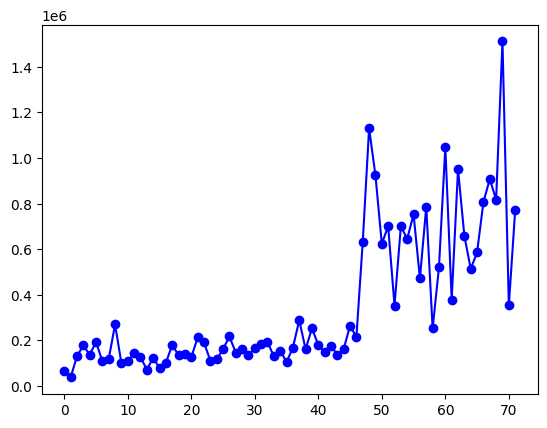

In [52]:
plt.plot(monthly_sales['Creditor'], color='blue', marker='o')

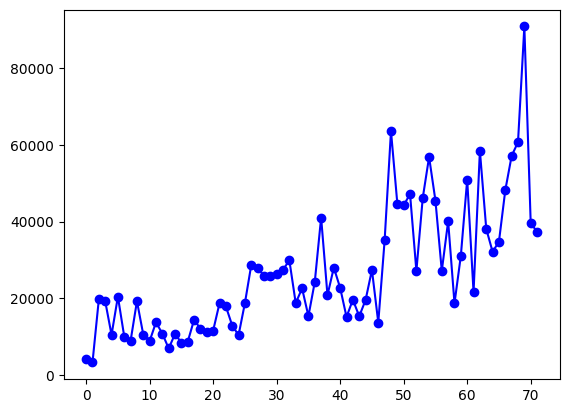

In [53]:
monthly_profit = Financial_df.groupby(['Year','Month']).agg({'Creditor':'sum', 'Cogs':'sum'}).reset_index()
monthly_profit['Profit'] = monthly_profit['Creditor'] - monthly_profit['Cogs']
plt.plot(monthly_profit['Profit'], color='blue', marker='o')

### Monthly Based

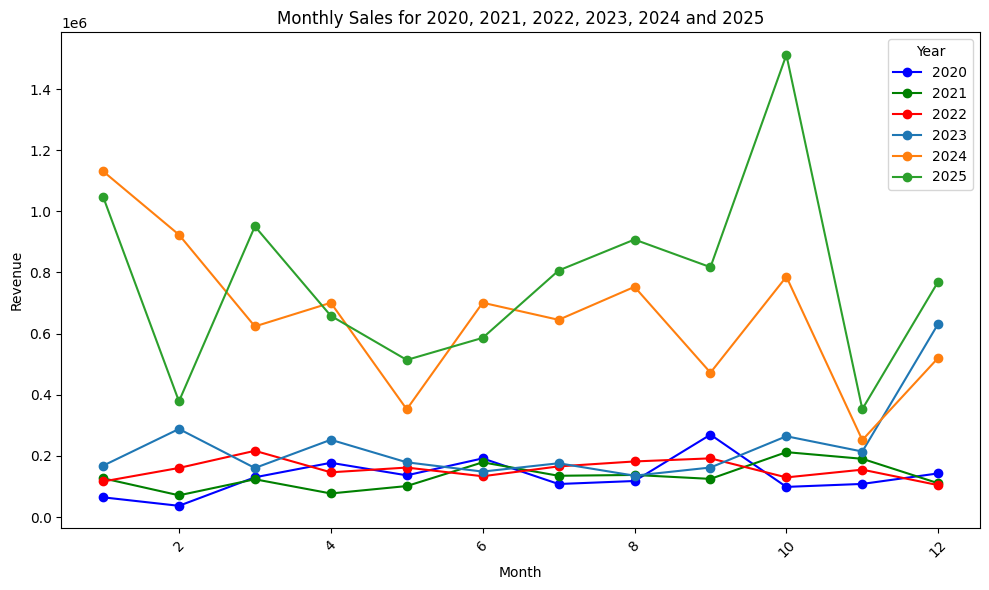

In [54]:
import matplotlib.pyplot as plt

# Filter data for 2020, 2021, and 2022
monthly_sales_2020 = monthly_sales[monthly_sales["Year"] == 2020]
monthly_sales_2021 = monthly_sales[monthly_sales["Year"] == 2021]
monthly_sales_2022 = monthly_sales[monthly_sales["Year"] == 2022]
monthly_sales_2023 = monthly_sales[monthly_sales["Year"] == 2023]
monthly_sales_2024 = monthly_sales[monthly_sales["Year"] == 2024]
monthly_sales_2025 = monthly_sales[monthly_sales["Year"] == 2025]

# Plotting the data for each year
plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(monthly_sales_2020['Month'], monthly_sales_2020['Creditor'], 
         color='blue', marker='o', label='2020')

# Plot for 2021
plt.plot(monthly_sales_2021['Month'], monthly_sales_2021['Creditor'], 
         color='green', marker='o', label='2021')

# Plot for 2022
plt.plot(monthly_sales_2022['Month'], monthly_sales_2022['Creditor'], 
         color='red', marker='o', label='2022')


# Plot for 2023
plt.plot(monthly_sales_2023['Month'], monthly_sales_2023['Creditor'], 
         marker='o', label='2023')

# Plot for 2024
plt.plot(monthly_sales_2024['Month'], monthly_sales_2024['Creditor'], 
         marker='o', label='2024')

# Plot for 2025
plt.plot(monthly_sales_2025['Month'], monthly_sales_2025['Creditor'], 
         marker='o', label='2025')


# Adding titles and labels
plt.title('Monthly Sales for 2020, 2021, 2022, 2023, 2024 and 2025')
plt.xlabel('Month')
plt.ylabel('Revenue')

# Add legend
plt.legend(title="Year")

# Rotate month labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Quarterly Based

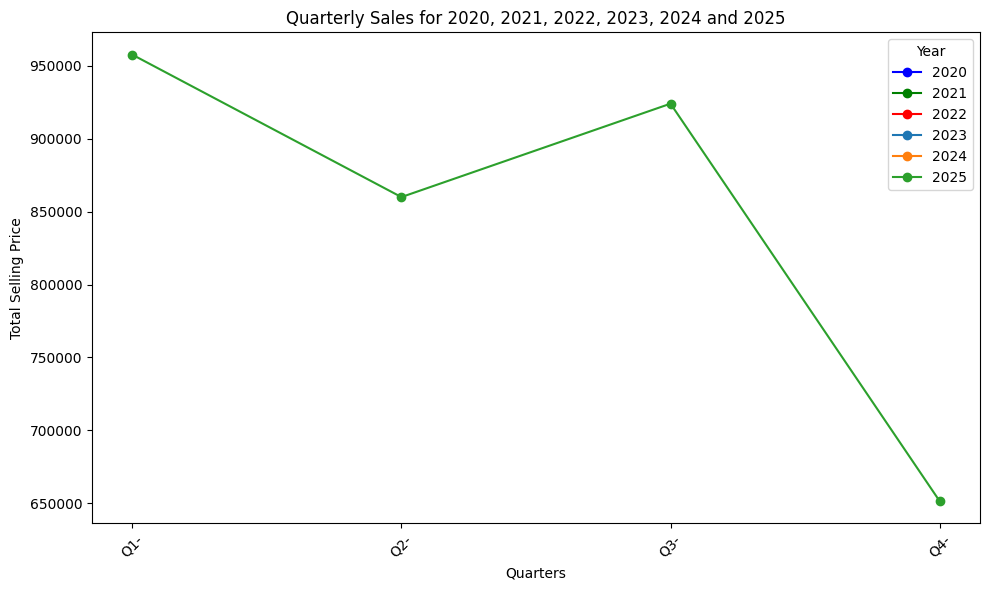

In [55]:
original_df['Quarters'] = pd.PeriodIndex(original_df['Date'], freq='Q').strftime('Q%q-')

Quarterly_sales = original_df.groupby(['Year','Quarters'])['Total Selling Price'].sum().reset_index()


Quarterly_sales_2020 = Quarterly_sales[Quarterly_sales["Year"] == 2020]
Quarterly_sales_2021 = Quarterly_sales[Quarterly_sales["Year"] == 2021]
Quarterly_sales_2022 = Quarterly_sales[Quarterly_sales["Year"] == 2022]
Quarterly_sales_2023 = Quarterly_sales[Quarterly_sales["Year"] == 2023]
Quarterly_sales_2024 = Quarterly_sales[Quarterly_sales["Year"] == 2024]
Quarterly_sales_2025 = Quarterly_sales[Quarterly_sales["Year"] == 2025]


# Plotting the data for each year
plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(Quarterly_sales_2020['Quarters'], Quarterly_sales_2020['Total Selling Price'], 
         color='blue', marker='o', label='2020')

# Plot for 2021
plt.plot(Quarterly_sales_2021['Quarters'], Quarterly_sales_2021['Total Selling Price'], 
         color='green', marker='o', label='2021')

# Plot for 2022
plt.plot(Quarterly_sales_2022['Quarters'], Quarterly_sales_2022['Total Selling Price'], 
         color='red', marker='o', label='2022')


# Plot for 2023
plt.plot(Quarterly_sales_2023['Quarters'], Quarterly_sales_2023['Total Selling Price'], 
         marker='o', label='2023')

# Plot for 2024
plt.plot(Quarterly_sales_2024['Quarters'], Quarterly_sales_2024['Total Selling Price'], 
         marker='o', label='2024')

# Plot for 2025
plt.plot(Quarterly_sales_2025['Quarters'], Quarterly_sales_2025['Total Selling Price'], 
         marker='o', label='2025')


# Adding titles and labels
plt.title('Quarterly Sales for 2020, 2021, 2022, 2023, 2024 and 2025')
plt.xlabel('Quarters')
plt.ylabel('Total Selling Price')

# Add legend
plt.legend(title="Year")

# Rotate month labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# 6. Pricing & Cost Metrics

### Average Unit Price per Product

In [56]:
original_df.groupby('Product Name')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).head(20)

,Product Name,Total Selling Price
66,جوانتي لاتكس لارج,394852.0
146,فكريل واحد راوند متر,341887.5
159,فكريل ٢ راوند متر,340965
198,كانيولا اصفر مقاس ٢٤,276926
1,ابر اسباينال برتقالي مقاس ٢٥,129325.0
149,فكريل ٠/٢ قاطع,91602
67,جوانتي لاتكس ميديم,82411
20,برولين ٠/٢ مستقيم,69298
61,جهاز وريد,65893.5
32,بلاستر طبي ١٠سم,61925


In [57]:
def calculate_growth_rates(original_df, product_name):
    """
    Calculate the average buying price, average selling price, and their growth rates for a given product.
    
    Parameters:
    - original_df: The dataframe containing sales data
    - product_name: The name of the product for which the analysis should be done
    
    Returns:
    - DataFrame with the calculated average prices and growth rates
    """
    
    # Filter data for the given product
    product_data = original_df[original_df['Product Name'] == product_name]

    # Group by Year and Product Name, and calculate the necessary metrics
    product_avg = product_data.groupby(['Year', 'Product Name']).apply(
        lambda x: pd.Series({
            'Average Buying Price': ((x['Buying Price'] * x['Qty.']).sum() / x['Qty.'].sum()),  # Average Buying Price
            'Average Selling Price': (x['Total Selling Price'].sum() / x['Qty.'].sum())  # Average Selling Price
        })
    ).reset_index()

    # Calculate Growth Rates
    product_avg['Buying Growth Rate'] = product_avg['Average Buying Price'].pct_change() * 100  # Growth Rate for Buying Price
    product_avg['Selling Growth Rate'] = product_avg['Average Selling Price'].pct_change() * 100  # Growth Rate for Selling Price

    # Reorder columns in the desired order
    product_avg = product_avg[['Year', 'Product Name', 'Average Buying Price', 'Buying Growth Rate', 'Average Selling Price', 'Selling Growth Rate']]

    # Return the final result rounded to 2 decimal places
    return product_avg.round(2)




In [58]:
latex_product_avg = calculate_growth_rates(original_df, 'جوانتي لاتكس')
latex_product_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,جوانتي لاتكس,133.33,NaN,140.33,NaN


In [59]:
Vicryl_product_avg = calculate_growth_rates(original_df,'فكريل واحد راوند متر')
Vicryl_product_avg


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,فكريل واحد راوند متر,639.12,NaN,706.38,NaN


In [60]:
Plaster_product_avg = calculate_growth_rates(original_df, 'بلاستر طبي ١٠سم')

Plaster_product_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,بلاستر طبي ١٠سم,54.54,NaN,58.98,NaN


In [61]:
Cannula_product_avg = calculate_growth_rates(original_df, 'كانيولا اصفر مقاس ٢٤')
Cannula_product_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,كانيولا اصفر مقاس ٢٤,197.45,NaN,211.72,NaN


In [62]:
Spinal_product_avg = calculate_growth_rates(original_df, 'ابر اسباينال برتقالي مقاس ٢٥')
Spinal_product_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,ابر اسباينال برتقالي مقاس ٢٥,38.17,NaN,43.11,NaN


### Category Avg

In [63]:
original_df.groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).head(20)

,Category,Total Selling Price
107,Vicryl,1013131.5
58,Latex,531869.0
52,IV Cannula,399626.0
89,Spinal,146945.0
79,Prolene,118725.0
77,Plaster,112640
91,Sterile Gloves,101828.5
100,Syringe,72704.0
54,IV Set,65893.5
96,Surgical Gown,58826


In [64]:
def calculate_category_growth_rates(original_df, product_name):
    """
    Calculate the average buying price, average selling price, and their growth rates for a given product.
    
    Parameters:
    - original_df: The dataframe containing sales data
    - product_name: The name of the product for which the analysis should be done
    
    Returns:
    - DataFrame with the calculated average prices and growth rates
    """
    
    # Filter data for the given product
    product_data = original_df[original_df['Category'] == product_name]

    # Group by Year and Product Name, and calculate the necessary metrics
    product_avg = product_data.groupby(['Year', 'Category']).apply(
        lambda x: pd.Series({
            'Average Buying Price': ((x['Buying Price'] * x['Qty.']).sum() / x['Qty.'].sum()),  # Average Buying Price
            'Average Selling Price': (x['Total Selling Price'].sum() / x['Qty.'].sum())  # Average Selling Price
        })
    ).reset_index()

    # Calculate Growth Rates
    product_avg['Buying Growth Rate'] = product_avg['Average Buying Price'].pct_change() * 100  # Growth Rate for Buying Price
    product_avg['Selling Growth Rate'] = product_avg['Average Selling Price'].pct_change() * 100  # Growth Rate for Selling Price

    # Reorder columns in the desired order
    product_avg = product_avg[['Year', 'Category', 'Average Buying Price', 'Buying Growth Rate', 'Average Selling Price', 'Selling Growth Rate']]

    # Return the final result rounded to 2 decimal places
    return product_avg.round(2)



In [65]:

latex_avg = calculate_category_growth_rates(original_df, 'Latex')
latex_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/3309269125.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Category']).apply(


,Year,Category,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,Latex,141.4,NaN,152.7,NaN


In [66]:
Vicryl_avg = calculate_category_growth_rates(original_df, 'Vicryl')
Vicryl_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/3309269125.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Category']).apply(


,Year,Category,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,Vicryl,663.35,NaN,734.69,NaN


In [67]:
calculate_category_growth_rates(original_df, 'Spinal')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/3309269125.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Category']).apply(


,Year,Category,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,Spinal,38.19,NaN,43.22,NaN


In [68]:
calculate_category_growth_rates(original_df, 'IV Cannula')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/3309269125.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Category']).apply(


,Year,Category,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2025,IV Cannula,60.73,NaN,66.42,NaN


### Discount / Markup Analysis


In [69]:
Profit_margin_category.head(10)

,index,Category,Profit_sum,Selling_sum,Profit_Margin
0,107,Vicryl,98373.0,1013131.5,9.709796
1,58,Latex,39367.0,531869.0,7.401635
2,52,IV Cannula,34196.0,399626.0,8.557001
3,89,Spinal,17095.0,146945.0,11.633604
4,79,Prolene,11190.0,118725.0,9.425142
5,91,Sterile Gloves,10401.0,101828.5,10.214233
6,77,Plaster,9911.25,112640,8.79905
7,27,Dialysis Filter,7778.0,56112.0,13.861563
8,54,IV Set,6676.5,65893.5,10.132259
9,23,Chlorine Tablet,6489.6,34329.6,18.903803


### Price Variance

In [70]:

def calculate_price_variance(original_df, product_name):
    """
    Calculate the price variance over time (standard deviation and coefficient of variation)
    for a given product.
    
    Parameters:
    - original_df: The dataframe containing sales data
    - product_name: The name of the product for which the analysis should be done
    
    Returns:
    - DataFrame with price variance and price volatility metrics
    """
    
    # Filter data for the given product
    product_data = original_df[original_df['Category'] == product_name]
    
    # Group by Year (or any other time period like Month) and calculate Average Unit Price
    product_data['Average Unit Price'] = product_data['Total Selling Price'] / product_data['Qty.']
    
    # Group by Year to calculate the variance and standard deviation
    price_variance = product_data.groupby('Year')['Average Unit Price'].agg(['mean', 'std', 'var'])
    
    # Calculate the Coefficient of Variation (CV) as (standard deviation / mean) * 100
    price_variance['CV'] = (price_variance['std'] / price_variance['mean']) * 100
    
    # Rename columns for clarity
    price_variance.rename(columns={'mean': 'Average Unit Price', 'std': 'Price Standard Deviation', 'var': 'Price Variance'}, inplace=True)
    
    # Return the result rounded to 2 decimal places
    return price_variance.round(2)

# Example usage:
product_price_variance = calculate_price_variance(original_df, 'Latex')
product_price_variance


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/91712918.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Average Unit Price'] = product_data['Total Selling Price'] / product_data['Qty.']


,Average Unit Price,Price Standard Deviation,Price Variance,CV
Year,,,,
2025,153.336744,7.29,53.137161,4.753932


### Products with Low / Negative Margins

In [71]:
Profit_margin_category.sort_values(by= 'Profit_Margin', ascending= False).head(50)

,index,Category,Profit_sum,Selling_sum,Profit_Margin
82,49,Hand Rest,75.5,200,37.75
76,64,Neck Support,103.5,390,26.538462
78,3,Airway Tube,99.0,399.0,24.81203
44,101,Thermometer,600,2425,24.742268
53,90,Stand Holder,290,1200,24.166667
55,71,Oxygen Mask,269,1199,22.435363
24,4,Alcohol,2422.0,11277.0,21.477343
16,28,Dialysis Liquid,4010,18885,21.233783
32,62,Nebulizer Mask,1475,7050,20.921986
36,5,Arm Holder,1077.8,5377,20.044635


# ⚖️ 8. Efficiency & Operational Metrics


### Avg. Total Price per invoice.
### Profit per Invoice
### Avg. profit per invoice.
### Productivity per Customer / Supplier
### Ratio of sales & profit contributed by each stakeholder.

In [72]:
Customer_data.head(10)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,AOV,Purchase_Frequency,Gross_Margin,CLV
7,Jasmin,1289281.5,154577.5,40,63,34,1,36520,11.98943,32232.0375,40.0,0.119894,1030516.666667
13,Taha Yasen,679153.96,88309.71,41,71,37,1,9449,13.0029,16564.730732,41.0,0.130029,588731.4
3,Bnoon,579930,38307,10,18,12,1,12560,6.605452,57993.0,10.0,0.066055,255380.0
10,Royal,220313,13525,14,26,11,1,3583,6.138993,15736.642857,14.0,0.06139,90166.666667
11,SHARQA,185913.0,7981.25,16,62,30,1,2508,4.293003,11619.5625,16.0,0.04293,53208.333333
1,Amina,180897.5,4187.5,11,19,11,1,5316,2.314847,16445.227273,11.0,0.023148,27916.666667
6,Hemeda,74750,6294.5,1,11,6,1,2005,8.420736,74750.0,1.0,0.084207,41963.333333
0,ADAM,55666,4431,13,17,13,1,444,7.959976,4282.0,13.0,0.0796,29540.0
8,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,32,1,1097,14.661221,23595.75,2.0,0.146612,46125.666667
2,Arkan Center,29737.5,2792.75,10,29,20,1,500.0,9.391341,2973.75,10.0,0.093913,18618.333333


In [73]:
Customer_data2.head(10)

,Client,Sales_sum,Transactions_count,COGS_sum,years_in_business,Profit_sum,Contribution Margin %,Cumalative_Sales_%,Cumalative_Profit_%
64,Wayaak,1.064632e+07,112,1.023557e+07,3,410754.375630,3.858180,42.617695,21.435586
60,Taha Yasen,3.202414e+06,349,2.867699e+06,6,334715.797000,10.451983,55.437098,38.903030
37,Jasmin,2.935501e+06,111,2.602852e+06,3,332648.850000,11.331929,67.188035,56.262609
34,Hemeda,1.635844e+06,238,1.466787e+06,6,169057.590000,10.334576,73.736391,65.085031
9,Bnoon,1.115427e+06,49,1.031086e+06,6,84340.500000,7.561275,78.201494,69.486415
31,Galal,7.836598e+05,69,6.443353e+05,3,139324.501800,17.778697,81.338518,76.757189
22,El Asema,6.310086e+05,87,5.567727e+05,4,74235.848431,11.764634,83.864473,80.631254
29,El Safwa,4.127091e+05,87,3.655116e+05,5,47197.510000,11.436024,85.516565,83.094298
52,Royal,3.671680e+05,25,3.394420e+05,2,27726.000000,7.551312,86.986354,84.541204
6,Amina,3.376710e+05,27,3.243705e+05,3,13300.500000,3.938893,88.338066,85.235303


In [74]:
Supplier_revenue_profit.head(10)

,index,Supplier,Profit_sum,Buying_sum,revenue_sum,contribution_margin
0,20,Safa,173855.32,1647682.28,1821537.6,9.544427
1,10,El Yosr,28509.0,277406.0,305915.0,9.319255
2,3,Amazon,17690.0,273245.0,290935,6.080396
3,15,Kareem,18142.99,145870.37,164013.36,11.061898
4,7,El Hanafy,12785,103571.0,116356,10.98783
5,17,Motakhssoon,14637.4,89535.0,104172.4,14.051131
6,2,Ahmed Mongey,12583.0,88569,101152.0,12.439695
7,13,FOX,7661,87085,94746,8.085829
8,6,El Bayt El Tebby,3090,52010,55100,5.607985
9,9,El Malek,6095.5,46071.5,52167,11.68459


# 📌 9. Strategic & Risk Insights
## Concentration Risk
### Too much reliance on 1 product, supplier, or customer.
## Profit Dependency Risk
### If 70% of profits come from 3 products, that’s risky.
## Slow-Moving Products
### Products with low sales/units.
## Potential Substitutes
### Compare similar sutures (3/0 vs. 5/0) and identify if customers shift.

In [75]:
total_profits_by_year

,Year,revenue,cogs,Profit,Profit Margin,Growth Rate
0,2020,1.584815e+06,1.435610e+06,149205.897500,9.414717,NaN
1,2021,1.592423e+06,1.447531e+06,144891.838431,9.098831,-2.891346
2,2022,1.866294e+06,1.588133e+06,278160.851800,14.904448,91.978275
3,2023,2.783624e+06,2.500628e+06,282996.425000,10.166474,1.738409
4,2024,7.863257e+06,7.370826e+06,492430.773130,6.262427,74.006005
5,2025,9.303422e+06,8.733532e+06,569889.729500,6.125593,15.729918


In [76]:
Profit_yearly_category = original_df.groupby(['Year','Category']).agg(Profit_sum=("Profit", "sum"),
                                                 Selling_sum=("Total Selling Price", "sum")).reset_index().sort_values(by='Profit_sum', ascending=False).reset_index()

Profit_yearly_category["Profit_Margin"] = Profit_yearly_category["Profit_sum"] / Profit_yearly_category["Selling_sum"]*100

Profit_yearly_category.head(10)

,index,Year,Category,Profit_sum,Selling_sum,Profit_Margin
0,107,2025,Vicryl,98373.0,1013131.5,9.709796
1,58,2025,Latex,39367.0,531869.0,7.401635
2,52,2025,IV Cannula,34196.0,399626.0,8.557001
3,89,2025,Spinal,17095.0,146945.0,11.633604
4,79,2025,Prolene,11190.0,118725.0,9.425142
5,91,2025,Sterile Gloves,10401.0,101828.5,10.214233
6,77,2025,Plaster,9911.25,112640,8.79905
7,27,2025,Dialysis Filter,7778.0,56112.0,13.861563
8,54,2025,IV Set,6676.5,65893.5,10.132259
9,23,2025,Chlorine Tablet,6489.6,34329.6,18.903803


In [77]:
Profit_Dependency_Risk = Profit_yearly_category.merge(total_profits_by_year[['Year','Profit']], on='Year', how='left')
Profit_Dependency_Risk['Category Profit Dependence %'] = Profit_Dependency_Risk['Profit_sum'] / Profit_Dependency_Risk['Profit'] * 100
Profit_Dependency_Risk = Profit_Dependency_Risk.sort_values(by=(['Year','Category Profit Dependence %']), ascending=False)
Profit_Dependency_Risk['Category Profit Dependence %'] = pd.to_numeric(Profit_Dependency_Risk['Category Profit Dependence %'], errors='coerce')
Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] = Profit_Dependency_Risk.groupby('Year')['Category Profit Dependence %'].cumsum()

print(f"2020 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2020) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2021 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2021) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2022 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2022) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2023 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2023) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2024 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2024) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2025 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2025) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")


2020 profit dependency = 0
2021 profit dependency = 0
2022 profit dependency = 0
2023 profit dependency = 0
2024 profit dependency = 0
2025 profit dependency = 108


In [78]:
Profit_Dependency_Risk

,index,Year,Category,Profit_sum,Selling_sum,Profit_Margin,Profit,Category Profit Dependence %,Cumalative_Profit_Dependency_%
0,107,2025,Vicryl,98373.0,1013131.5,9.709796,569889.7295,17.261760,17.261760
1,58,2025,Latex,39367.0,531869.0,7.401635,569889.7295,6.907828,24.169588
2,52,2025,IV Cannula,34196.0,399626.0,8.557001,569889.7295,6.000459,30.170047
3,89,2025,Spinal,17095.0,146945.0,11.633604,569889.7295,2.999703,33.169750
4,79,2025,Prolene,11190.0,118725.0,9.425142,569889.7295,1.963538,35.133288
...,...,...,...,...,...,...,...,...,...
103,83,2025,Sample Cup,10,60,16.666667,569889.7295,0.001755,57.918900
104,22,2025,Check Gloves,10.0,410.0,2.439024,569889.7295,0.001755,57.920654
105,87,2025,Sonar Gel,2,49,4.081633,569889.7295,0.000351,57.921005
106,103,2025,Tourniquet,0,90,0.0,569889.7295,0.000000,57.921005


# i want to know percentage of contribution of top 5 categories each year

In [79]:
Profit_margin_category['Total_Profit'] = original_df['Profit'].sum()
Profit_margin_category['Profit_Contribution_%'] = Profit_margin_category['Profit_sum'] / Profit_margin_category['Total_Profit'] * 100
Profit_margin_category['Cumalative Profit Contribution'] = Profit_margin_category['Profit_Contribution_%'].cumsum()
Profit_margin_category.head(20)

,index,Category,Profit_sum,Selling_sum,Profit_Margin,Total_Profit,Profit_Contribution_%,Cumalative Profit Contribution
0,107,Vicryl,98373.0,1013131.5,9.709796,329935.86,29.815795,29.815795
1,58,Latex,39367.0,531869.0,7.401635,329935.86,11.931713,41.747508
2,52,IV Cannula,34196.0,399626.0,8.557001,329935.86,10.364439,52.111947
3,89,Spinal,17095.0,146945.0,11.633604,329935.86,5.18131,57.293257
4,79,Prolene,11190.0,118725.0,9.425142,329935.86,3.391568,60.684825
5,91,Sterile Gloves,10401.0,101828.5,10.214233,329935.86,3.152431,63.837256
6,77,Plaster,9911.25,112640,8.79905,329935.86,3.003993,66.841249
7,27,Dialysis Filter,7778.0,56112.0,13.861563,329935.86,2.357428,69.198677
8,54,IV Set,6676.5,65893.5,10.132259,329935.86,2.023575,71.222252
9,23,Chlorine Tablet,6489.6,34329.6,18.903803,329935.86,1.966928,73.18918


# 🏆 10. Advanced Analytical Models
## ABC Analysis
### → Classify products into:
### A = top 20% products giving 80% value
### B = mid-value
### C = long tail
## Pareto Analysis (80/20 Rule)
### → Find which 20% of customers or products bring 80% of profit.
## Forecasting Models
### → Use past 6 years to predict demand (time-series ML).
## Segmentation
### → Cluster suppliers/customers into strategic, high-volume, low-margin, etc.
## Profitability Heatmaps
### → Visual grid showing high/low profit by product × customer × supplier.

In [80]:
Top_10_category_by_sales = Profit_margin_category['Category'].head(10).to_list()
Top_10_category_by_sales

['Vicryl',
 'Latex',
 'IV Cannula',
 'Spinal',
 'Prolene',
 'Sterile Gloves',
 'Plaster',
 'Dialysis Filter',
 'IV Set',
 'Chlorine Tablet']

In [81]:
Top_10_clients_by_sales = Customer_data['Client'].head(15).to_list()
Top_10_clients_by_sales

['Jasmin',
 'Taha Yasen',
 'Bnoon',
 'Royal',
 'SHARQA',
 'Amina',
 'Hemeda',
 'ADAM',
 'MEDECA HOSPITAL SHARM',
 'Arkan Center',
 'Cash Customer',
 'Sharqia ',
 'Eman Khairy',
 'Montazah']

In [82]:
customer_data_2025 = original_df[original_df['Year'] == 2025]
customer_data_2025 = customer_data_2025.groupby('Client').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)   
customer_data_2025['Contribution Margin %'] = customer_data_2025['Profit_sum'] / customer_data_2025['Sales_sum'] * 100
customer_data_2025

,Client,Sales_sum,Profit_sum,Contribution Margin %
7,Jasmin,1289281.5,154577.5,11.98943
13,Taha Yasen,679153.96,88309.71,13.0029
3,Bnoon,579930,38307,6.605452
10,Royal,220313,13525,6.138993
11,SHARQA,185913.0,7981.25,4.293003
1,Amina,180897.5,4187.5,2.314847
6,Hemeda,74750,6294.5,8.420736
0,ADAM,55666,4431,7.959976
8,MEDECA HOSPITAL SHARM,47191.5,6918.85,14.661221
2,Arkan Center,29737.5,2792.75,9.391341


In [83]:
category_data_2025 = original_df[original_df['Year'] == 2025]
category_data_2025 = category_data_2025.groupby('Category').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)   
category_data_2025['Contribution Margin %'] = category_data_2025['Profit_sum'] / category_data_2025['Sales_sum'] * 100
category_data_2025

,Category,Sales_sum,Profit_sum,Contribution Margin %
107,Vicryl,1013131.5,98373.0,9.709796
58,Latex,531869.0,39367.0,7.401635
52,IV Cannula,399626.0,34196.0,8.557001
89,Spinal,146945.0,17095.0,11.633604
79,Prolene,118725.0,11190.0,9.425142
...,...,...,...,...
40,Eye Patch,154,14,9.090909
93,Sterilization Paper,138,12,8.695652
103,Tourniquet,90,0,0.0
83,Sample Cup,60,10,16.666667


In [84]:
customer_data_2025['Client'].to_list()

['Jasmin',
 'Taha Yasen',
 'Bnoon',
 'Royal',
 'SHARQA',
 'Amina',
 'Hemeda',
 'ADAM',
 'MEDECA HOSPITAL SHARM',
 'Arkan Center',
 'Cash Customer',
 'Sharqia ',
 'Eman Khairy',
 'Montazah']

In [85]:
pivot_table = original_df[(original_df['Category'].isin(category_data_2025['Category'].head(10).to_list())) & (original_df['Client'].isin(customer_data_2025['Client'].to_list()))].pivot_table(index='Category', columns='Client', values='Profit', aggfunc='sum')
pivot_table = pivot_table.apply(pd.to_numeric, errors='coerce')
pivot_table.round(0)


Client,ADAM,Amina,Arkan Center,Bnoon,Cash Customer,Eman Khairy,Hemeda,Jasmin,MEDECA HOSPITAL SHARM,Montazah,Royal,SHARQA,Sharqia,Taha Yasen
Category,,,,,,,,,,,,,,
IV Cannula,400.0,NaN,140.0,16750.0,NaN,NaN,NaN,6425.0,345.0,NaN,NaN,725.0,60.0,9351.0
IV Set,72.0,202.0,NaN,360.0,NaN,NaN,NaN,3068.0,387.0,NaN,NaN,NaN,NaN,2587.0
Latex,NaN,50.0,104.0,9020.0,NaN,NaN,3090.0,10440.0,780.0,NaN,NaN,360.0,120.0,15403.0
Plaster,NaN,NaN,69.0,NaN,NaN,NaN,NaN,9375.0,468.0,NaN,NaN,NaN,NaN,NaN
Prolene,20.0,800.0,NaN,NaN,NaN,NaN,NaN,2765.0,225.0,NaN,1312.0,635.0,NaN,5433.0
Spinal,NaN,NaN,NaN,NaN,NaN,100.0,NaN,9700.0,NaN,100.0,NaN,NaN,600.0,6595.0
Sterile Gloves,NaN,1500.0,265.0,NaN,NaN,NaN,800.0,6620.0,NaN,NaN,NaN,NaN,200.0,1016.0
Surgical Gown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3060.0,1995.0,NaN,NaN
Syringe,NaN,NaN,20.0,NaN,NaN,NaN,NaN,3560.0,229.0,NaN,NaN,-247.0,NaN,-248.0


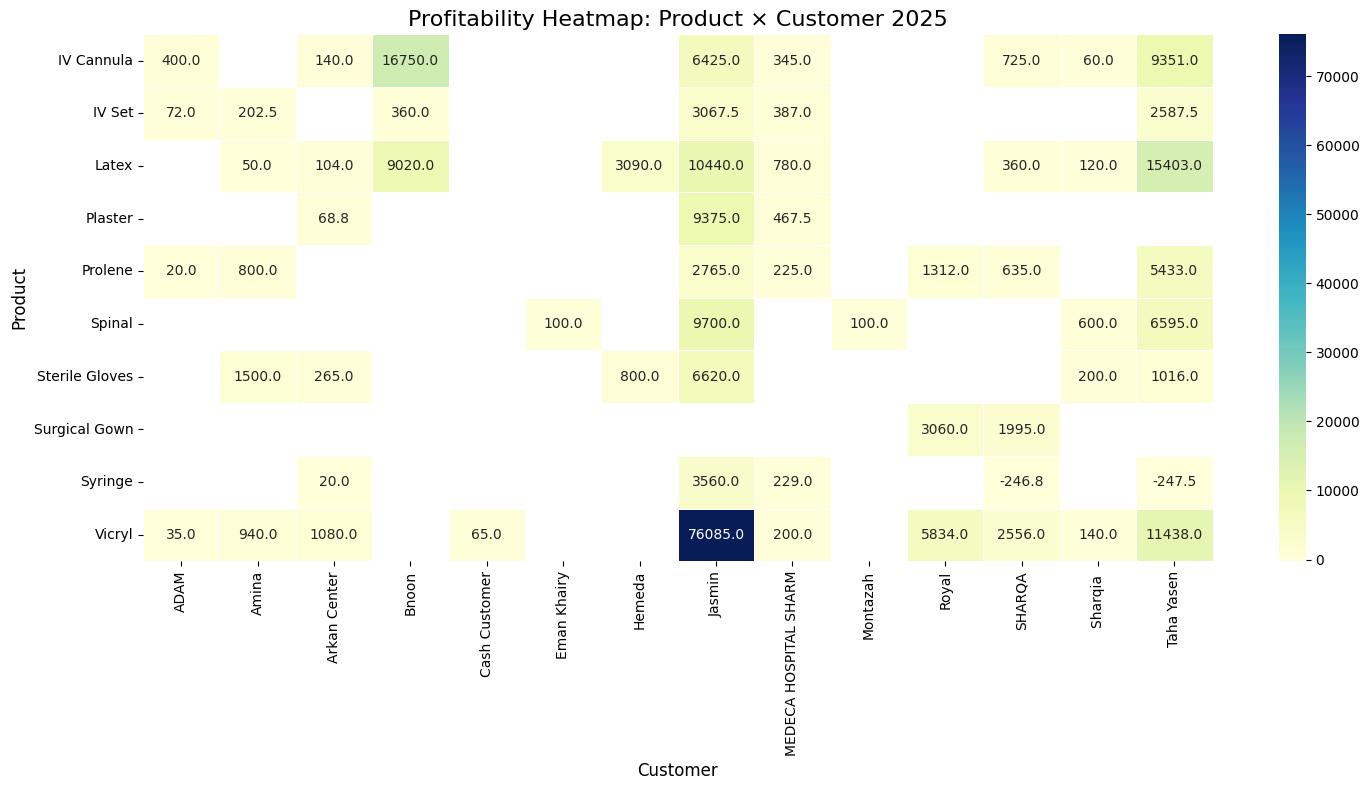

In [86]:
# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Profitability Heatmap: Product × Customer 2025', fontsize=16)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# 📍 Complete Roadmap with KPIs & Charts


## Phase 1 – Business Problem Framing

👉 Goal: Define objectives, scope, and align analysis with business goals.

KPIs / Metrics

Total Revenue (by year, by customer, by product)

Customer Count & Retention

Market Share (if available)

High-level Expense vs Revenue ratio

Preferable Charts

Line Chart → Revenue trend (6 years)

Bar Chart → Revenue by customer segment

KPI Cards → Total Revenue, Customer Count, Profit %

Pie Chart → Expense vs Revenue breakdown


## Phase 2 – Data Preparation & Quality Check (Pandas)

👉 Goal: Ensure data is clean, accurate, and usable.

KPIs / Metrics

Missing Value % per column

Duplicate Records Count

Data Completeness %

Outliers detected in sales/expenses

Preferable Charts

Bar Chart → Missing values by column

Heatmap → Correlation between numeric fields (sales, expenses, collection, etc.)

Box Plot → Outlier detection in sales/profit

## Phase 3 – Descriptive Analytics (What happened?)

👉 Goal: Summarize historical performance.

KPIs / Metrics

Total Sales per Year / Month

Top 10 Customers by Sales

Top 10 Products by Profit Contribution

Collection Efficiency (Cash Collected ÷ Sales)

Expense Breakdown (fixed vs variable, marketing vs operations)

Preferable Charts

Line Chart → Monthly Sales Trend (seasonality check)

Pareto Chart → 80/20 analysis of customers/products

Stacked Bar → Expenses by category per year

Heatmap → Sales by month & year (seasonality patterns)

Phase 4 – Diagnostic Analytics (Why it happened?)

👉 Goal: Explain performance drivers and root causes.
KPIs / Metrics

Profitability by Customer Segment

Churn Rate (Lost Customers ÷ Previous Customers)

Gross Margin % Trend

Marketing ROI = (Revenue Attributed ÷ Marketing Spend)

Supplier Dependency Ratio (Top 3 Suppliers ÷ Total Purchases)

Preferable Charts

Waterfall Chart → Profit breakdown (Revenue → COGS → Expenses → Net Profit)

Line Chart → Churn trend over 6 years

Bar Chart → ROI by marketing campaign / budget usage

Donut Chart → Supplier dependency distribution

Phase 5 – Predictive Analytics (What will happen?)

👉 Goal: Use models & historical data to forecast.

KPIs / Metrics

Forecasted Sales (next 12–24 months)

Forecasted Collections vs Expenses

Customer Lifetime Value (CLV) prediction

Cash Flow Projection

Preferable Charts

Line Chart with Forecast Cone → Sales forecast with confidence interval

Area Chart → Cash inflow vs outflow forecast

Histogram → Predicted CLV distribution

Scenario Comparison Bars → Best case vs worst case forecast

Phase 6 – Prescriptive Analytics (What should we do?)

👉 Goal: Recommend optimal actions.

KPIs / Metrics

Optimal Marketing Spend Allocation

Target Customer Segments (High CLV, High Retention)

Supplier Negotiation Opportunities (discount gain %)

Cost Reduction Opportunities

Preferable Charts

Tornado Chart → Sensitivity analysis (impact of costs, discounts, churn)

Waterfall Chart → Profit improvement with recommended actions

Clustered Bar → Scenario comparison (baseline vs optimized)

Bubble Chart → Customer segmentation (Revenue vs Profit vs Retention)

🎯 Portfolio Tip

If you show:

Phase 1–4 in Python (Pandas + Matplotlib/Seaborn/Plotly) → proves strong analytical & technical skills.

Phase 5–6 in Power BI (interactive dashboards) → proves strong storytelling & business impact.

That way, you demonstrate the full data analytics lifecycle in your portfolio.

# Phase 1 – Business Problem Framing

### 1. High-level Revenue / Profit KPIs

In [87]:
total_sales_by_year

,Year,Creditor,Growth Rate
0,2020,1584815.4625,NaN
1,2021,1592422.628431,0.480003
2,2022,1866294.2718,17.198427
3,2023,2783624.13,49.152477
4,2024,7863257.17581,182.482721
5,2025,9303421.8725,18.315116


In [88]:
total_sales_by_year

,Year,Creditor,Growth Rate
0,2020,1584815.4625,NaN
1,2021,1592422.628431,0.480003
2,2022,1866294.2718,17.198427
3,2023,2783624.13,49.152477
4,2024,7863257.17581,182.482721
5,2025,9303421.8725,18.315116


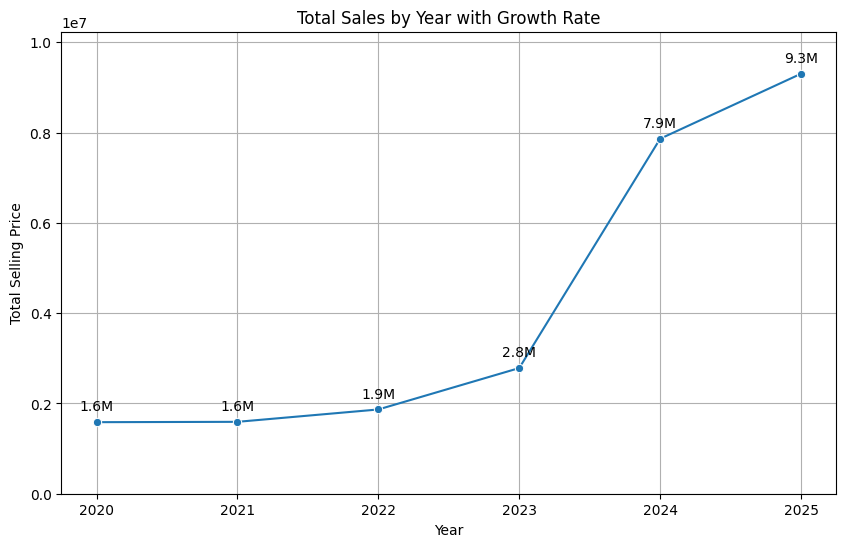

In [89]:
total_sales_by_year = Financial_df.groupby('Year')['Creditor'].sum().reset_index()
total_sales_by_year['Growth Rate'] = total_sales_by_year['Creditor'].pct_change() * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Creditor', data=total_sales_by_year, marker='o')

# Offset value: adjust as needed
offset = total_sales_by_year['Creditor'].max() * 0.02

for i, row in total_sales_by_year.iterrows():
    ax.text(row['Year'], row['Creditor'] + offset, f"{row['Creditor']/1000000:.1f}M", color='black', ha="center", va="bottom")
plt.title('Total Sales by Year with Growth Rate')
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.ylim(0, total_sales_by_year['Creditor'].max() * 1.1)
plt.grid(True)
plt.savefig('Sales.jpg', bbox_inches = 'tight', dpi = 200)
plt.show()


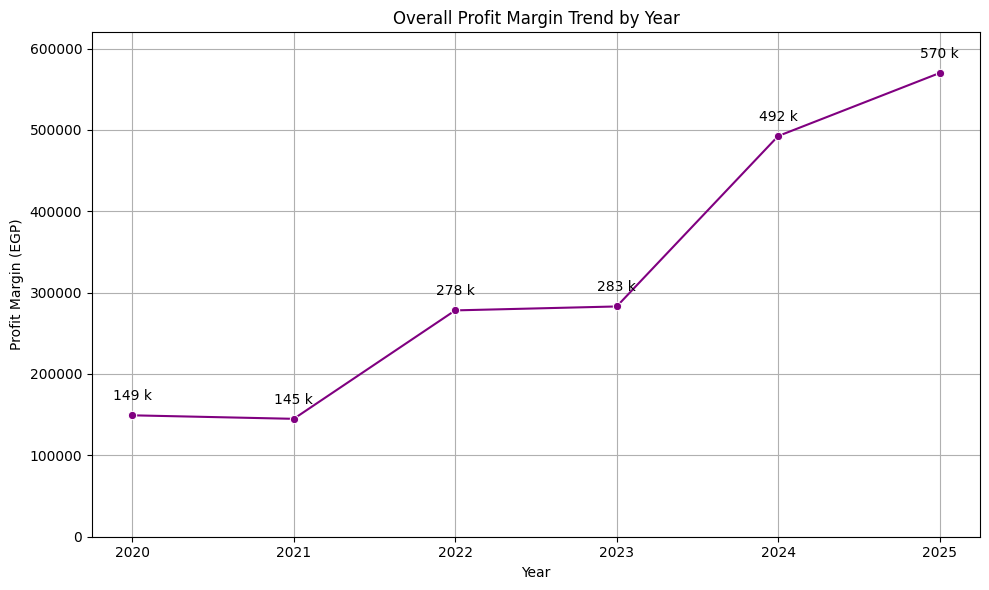

In [90]:

total_profits_by_year = Financial_df.groupby('Year').agg(revenue=("Creditor", "sum") , cogs = ("Cogs", "sum")).reset_index()
total_profits_by_year['Profit'] = total_profits_by_year['revenue'] - total_profits_by_year['cogs']
total_profits_by_year['Profit Margin'] = (total_profits_by_year['Profit'] / total_profits_by_year['revenue']) * 100
total_profits_by_year['Growth Rate'] = total_profits_by_year['Profit'].pct_change() * 100


# Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
#                                                  Selling_sum=("Total Selling Price", "sum"),
#                                                     Buying_sum=("Total Buying Price", "sum")
#     )
#     .reset_index()
# )

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_profits_by_year, x='Year', y='Profit', marker='o', color='purple')

# Add data labels
for i in range(len(total_profits_by_year)):
    year = total_profits_by_year.loc[i, 'Year']
    profit = total_profits_by_year.loc[i, 'Profit']
    
    plt.text(year, profit + 15000, f'{profit/1000:.0f} k',  # Adds comma formatting and rounds to int
             ha='center', va='bottom', fontsize=10, color='black')
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin (EGP)')
plt.ylim(0, total_profits_by_year['Profit'].max() + 50000)
plt.grid(True)
plt.tight_layout()
plt.savefig('GP.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [91]:
profit_pct_con = original_df['Profit'].sum() / original_df['Total Selling Price'].sum() * 100
print(f"Overall consumables Profit Percentage: {profit_pct_con:.2f}%")

Overall consumables Profit Percentage: 9.72%


In [92]:
profit_pct = total_profits_by_year['Profit'].sum() / total_profits_by_year['revenue'].sum() * 100
print(f"Overall Profit Percentage: {profit_pct:.2f}%")

Overall Profit Percentage: 7.67%


In [93]:
original_df.groupby('Year').apply(lambda x: x['Profit'].sum() / x['Total Selling Price'].sum() * 100).reset_index(name='Profit Percentage')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/2525905349.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  original_df.groupby('Year').apply(lambda x: x['Profit'].sum() / x['Total Selling Price'].sum() * 100).reset_index(name='Profit Percentage')


,Year,Profit Percentage
0,2025,9.72426


# Insight 1 : The entity is doing well on the level of sales , there is a big jump in sales in 2024 as pharmaceutical branch enters the market side by side with consumables branch with incremental gross about 182 % and almost 18 % in 2025, this also reflects on gross profit numbers with 73 % in 2024 and 16 % in 2025. Although both sales and GP decreased in 2025 comparedred with 2024 but remember that Q4 data for 2025 did not added to the data , so it is expecting that both sales and GP will be slightly high of 2024 numbers. Despite the incremntal amount in 2025 with 18% and 16% in both sales and gross profit in order, the increase in equity was 75% so there are some issues that we have to mark it and find some solution for them.

### Customer Count & Retention

In [94]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

# churn_data = []

# for i in range(1, len(customers_per_year)):
#     year = customers_per_year.loc[i, 'Year']
#     current = customers_per_year.loc[i, 'Client']
#     previous = customers_per_year.loc[i - 1, 'Client']
    
#     lost = previous - current
#     churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
#     churn_data.append({
#         'Year': year,
#         'Customers at Start': len(previous),
#         'Retained Customers': len(previous & current),
#         'Lost Customers': len(lost),
#         'new Customers': len(current - previous),
#         'Churn Rate (%)': round(churn_rate, 2)
#     })

# churn_df = pd.DataFrame(churn_data)
# churn_df

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')

# # Add labels above each point
# for i in range(len(churn_df)):
#     year = churn_df.loc[i, 'Year']
#     churn = churn_df.loc[i, 'Churn Rate (%)']
    
#     plt.text(year, churn + 1.5, f'{churn}%',  # Adjust `+ 1.5` to lift the label slightly
#              ha='center', va='bottom', fontsize=9, color='black')
    
# plt.title('Customer Churn Rate by Year')
# plt.xlabel('Year')
# plt.ylabel('Churn Rate (%)')
# plt.xticks(churn_df['Year'])
# plt.ylim(0, churn_df['Churn Rate (%)'].max() + 10)  # Add some space above the max churn rate
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

,Year,Client
0,2025,"{Montazah, Amina, MEDECA HOSPITAL SHARM, Eman ..."


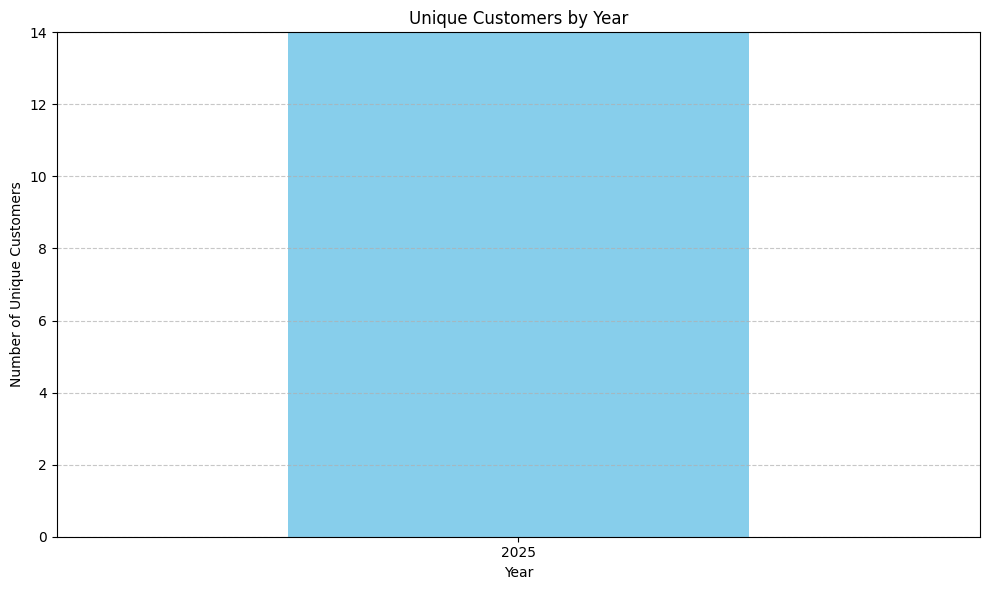

In [95]:
original_df.groupby('Year')['Client'].nunique().reset_index().plot(x='Year', y='Client', kind='bar', legend=False, figsize=(10, 6), color='skyblue')
plt.title('Unique Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=0)
plt.ylim(0, original_df['Client'].nunique() )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('customers number.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


# Insight 2 : Number of customers in the first year was very high and this is normal as the firm did not know how to select the most valuable customers so it took some time to detect the best fit customers and to be flexable enough with market dynamic. The change in number of customers over the next 5 years is low. Churn rate considered to be very high and by default customer retension is bad but in reality most of dropped customers were dropped by the firm itself as it has rapid reaction with market dynamic and when you see the valuable customers to the firm you can see that the retension of those customers closely to be 100%. number of customers almost stable in both 2024 and 2025 around 15 loyal customers.

In [96]:
expenses_df['Year'] = pd.DatetimeIndex(expenses_df['Date']).year
expenses_df['Month'] = pd.DatetimeIndex(expenses_df['Date']).month

In [97]:
yearly_expenses = expenses_df.groupby('Year')['Cost'].sum().reset_index()
yearly_expenses

,Year,Cost
0,2020,141835
1,2021,174540
2,2022,239157
3,2023,304613
4,2024,330040
5,2025,473948.62


In [98]:
total_profits_by_year

,Year,revenue,cogs,Profit,Profit Margin,Growth Rate
0,2020,1.584815e+06,1.435610e+06,149205.897500,9.414717,NaN
1,2021,1.592423e+06,1.447531e+06,144891.838431,9.098831,-2.891346
2,2022,1.866294e+06,1.588133e+06,278160.851800,14.904448,91.978275
3,2023,2.783624e+06,2.500628e+06,282996.425000,10.166474,1.738409
4,2024,7.863257e+06,7.370826e+06,492430.773130,6.262427,74.006005
5,2025,9.303422e+06,8.733532e+06,569889.729500,6.125593,15.729918


In [99]:
profit_expenses = total_profits_by_year[['Year','Profit']].merge(yearly_expenses, on='Year', how='left')
profit_expenses.rename(columns={'Cost':'Total Expenses'}, inplace=True)

profit_expenses.set_index('Year', inplace=True)
profit_expenses

,Profit,Total Expenses
Year,,
2020,149205.897500,141835
2021,144891.838431,174540
2022,278160.851800,239157
2023,282996.425000,304613
2024,492430.773130,330040
2025,569889.729500,473948.62


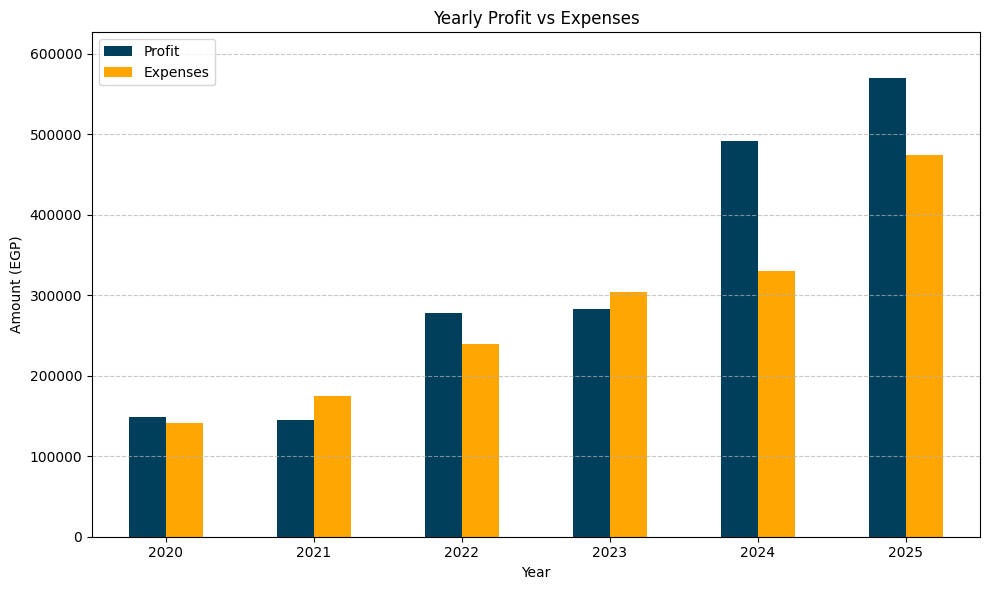

In [100]:
profit_expenses.plot(kind='bar', figsize=(10,6),color = ['#003f5c', '#ffa600'])
plt.title('Yearly Profit vs Expenses')
plt.xlabel('Year')
plt.ylabel('Amount (EGP)')
plt.xticks(rotation=0)
plt.ylim(0, max(profit_expenses['Profit'].max(), profit_expenses['Total Expenses'].max()) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Profit', 'Expenses'])
plt.tight_layout()
plt.savefig('expenses vs. profit.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


In [101]:
profit_expenses

,Profit,Total Expenses
Year,,
2020,149205.897500,141835
2021,144891.838431,174540
2022,278160.851800,239157
2023,282996.425000,304613
2024,492430.773130,330040
2025,569889.729500,473948.62


In [102]:
profit_expenses.sum()

Profit            1917575.515361
Total Expenses        1664133.62
dtype: object

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/1369646316.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  profit_expenses.sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors = ['#003f5c', '#ffa600'])


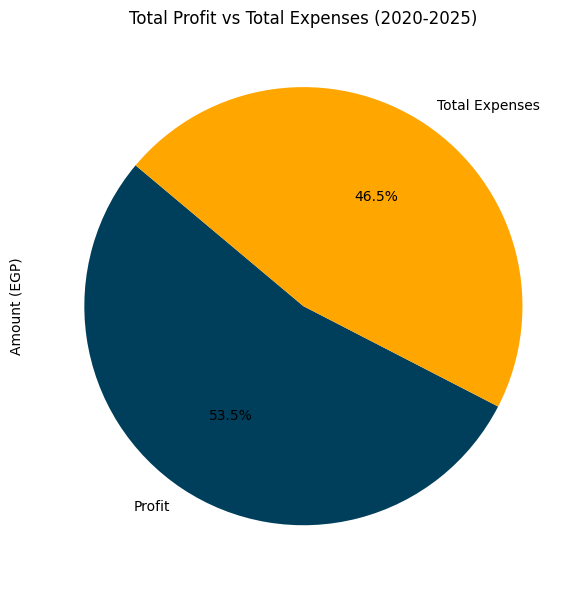

In [103]:
plt.figure(figsize=(10, 6))
profit_expenses.sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors = ['#003f5c', '#ffa600'])
plt.title('Total Profit vs Total Expenses (2020-2025)')
plt.ylabel('Amount (EGP)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_13025/2618378246.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  profit_expenses.sum().plot(


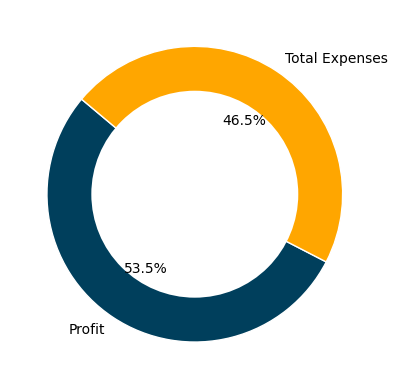

In [104]:
profit_expenses.sum().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=['#003f5c', '#ffa600'],
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Make it a donut by drawing a white circle in the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Insight 3 : the firm starts to show a good performance in 24 & 25 but expenses have a huge incresase jump in 2025.Gp increased from 24 to 25 with 16% while expenses increases with 43%.GP is going very well but the main problem is in expenses, it sucked most of profits, after analysis we found that salaries is the big issue so we have two options either to decrease salaries or increase profits, the most recommended action is to give the market new branch that can be increase both profit and sales and the same time works with the same employees without adding new persons with new salaries or to have a new to plan to pharmaceutical branch as it shows very good indicators in october 2025.

# Phase 2 – Data Preparation & Quality Check (Pandas)


In [105]:
original_df.isnull().sum()


0
Full Name                0
MFG                    443
Product Name             0
Size                   137
Qty.                     0
Unit Selling Price       0
Total Selling Price      0
Supplier                 0
Buying Price             0
Client                   0
Invoice                  0
Date                     0
Invoice No               0
Profit                   0
Year                     0
Category                 0
Month                    0
Total Buying Price       0
Quarters                 0
dtype: int64

In [106]:
original_df[original_df['Supplier'].isnull()]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Year,Category,Month,Total Buying Price,Quarters


In [107]:
original_df[(original_df['Full Name'] == 'ماسك طبي ٣ طبقات') & (original_df['Buying Price'] == 40)]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Year,Category,Month,Total Buying Price,Quarters


In [108]:
# original_df.loc[[2502,2515,2556], 'Supplier'] = 'Abd El Hamid'

In [109]:
original_df[(original_df['Full Name'] == 'ماسك N95')]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Year,Category,Month,Total Buying Price,Quarters


In [110]:
original_df.loc[2377, 'Supplier'] = 'El Tayseer Purchaser'

In [111]:
original_df.isnull().sum()


0
Full Name                1
MFG                    444
Product Name             1
Size                   138
Qty.                     1
Unit Selling Price       1
Total Selling Price      1
Supplier                 0
Buying Price             1
Client                   1
Invoice                  1
Date                     1
Invoice No               1
Profit                   1
Year                     1
Category                 1
Month                    1
Total Buying Price       1
Quarters                 1
dtype: int64

In [112]:
original_df.duplicated().sum()
original_df[original_df.duplicated()]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Year,Category,Month,Total Buying Price,Quarters


In [113]:
original_df = original_df.drop_duplicates()

In [114]:
original_df.duplicated().sum()


np.int64(0)

# Insight 4 : The data is almost clean, there is some duplicated values and some missing items and we have worked with this and the data became clean.

# Phase 3: Descriptive Analytics (What Happened?)
### The goal here is to summarize past performance clearly and visually. Each metric will highlight a specific part of your business (sales, customers, suppliers, finance).

## 🔑 Sales Metrics


### Total Sales Revenue (per Year/Quarter/Month)


In [115]:
# total_sales_by_year = original_df.groupby('Year')['Total Selling Price'].sum().reset_index()
# # total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100

# fig, ax = plt.subplots(figsize=(10, 6))
# sns.lineplot(x='Year', y='Total Selling Price', data=total_sales_by_year, marker='o')

# # Offset value: adjust as needed
# offset = total_sales_by_year['Total Selling Price'].max() * 0.02

# for i, row in total_sales_by_year.iterrows():
#     ax.text(row['Year'], row['Total Selling Price'] + offset, f"{row['Total Selling Price']/1000000:.1f}M", color='black', ha="center", va="bottom")
# plt.title('Total Sales by Year with Growth Rate')
# plt.xlabel('Year')
# plt.ylabel('Total Selling Price')
# plt.ylim(0, total_sales_by_year['Total Selling Price'].max() * 1.1)
# plt.grid(True)
# plt.show()

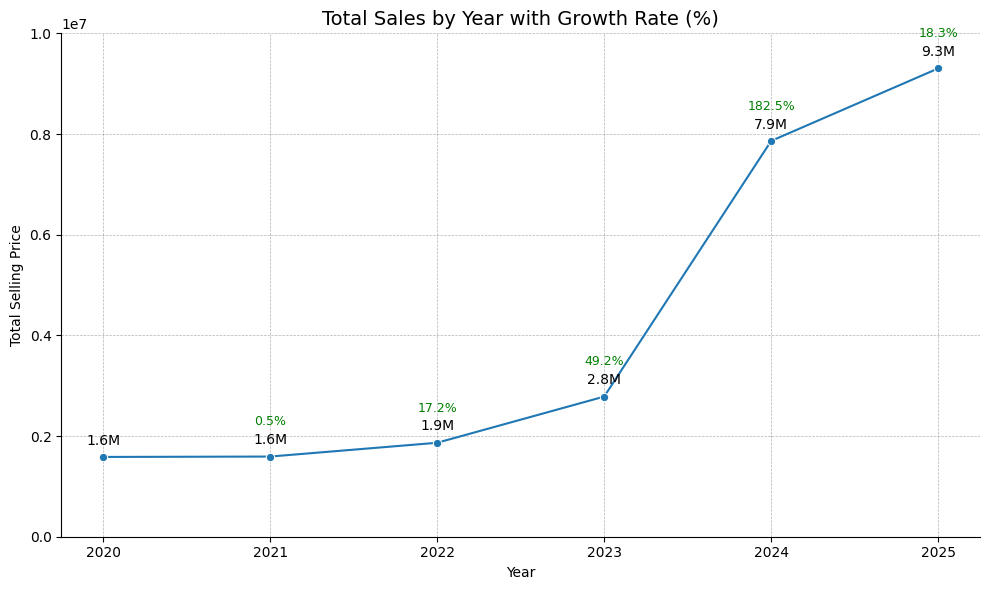

In [116]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.ticker as mtick

# # Step 1: Group and calculate
# total_sales_by_year = original_df.groupby('Year')['Total Selling Price'].sum().reset_index()
# total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100

# Step 2: Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Creditor', data=total_sales_by_year, marker='o', ax=ax)

# Set y-axis ticks manually based on max value (in millions)
max_value = total_sales_by_year['Creditor'].max()
tick_step = 1_000_000  # You can change this to 500_000 for more granularity
yticks = np.arange(0, max_value + tick_step, tick_step)

# Step 3: Add labels
offset = total_sales_by_year['Creditor'].max() * 0.02

for i, row in total_sales_by_year.iterrows():
    # Sales label
    ax.text(
        row['Year'],
        row['Creditor'] + offset,
        f"{row['Creditor'] / 1_000_000:.1f}M",
        ha="center",
        va="bottom",
        color='black',
        fontsize=10
    )
    
    # Growth rate label (skip first year since it has NaN)
    if pd.notna(row['Growth Rate']):
        ax.text(
            row['Year'],
            row['Creditor'] + offset * 3,
            f"{row['Growth Rate']:.1f}%",
            ha="center",
            va="bottom",
            color='green',
            fontsize=9
        )

# Step 4: Final touches
plt.title('Total Sales by Year with Growth Rate (%)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.ylim(0,10000000)
plt.grid(True)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
sns.despine()
plt.tight_layout()
plt.savefig('sales with growth rate.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


### Seasonality Heatmap → Revenue by Month vs Year.

### Consumables

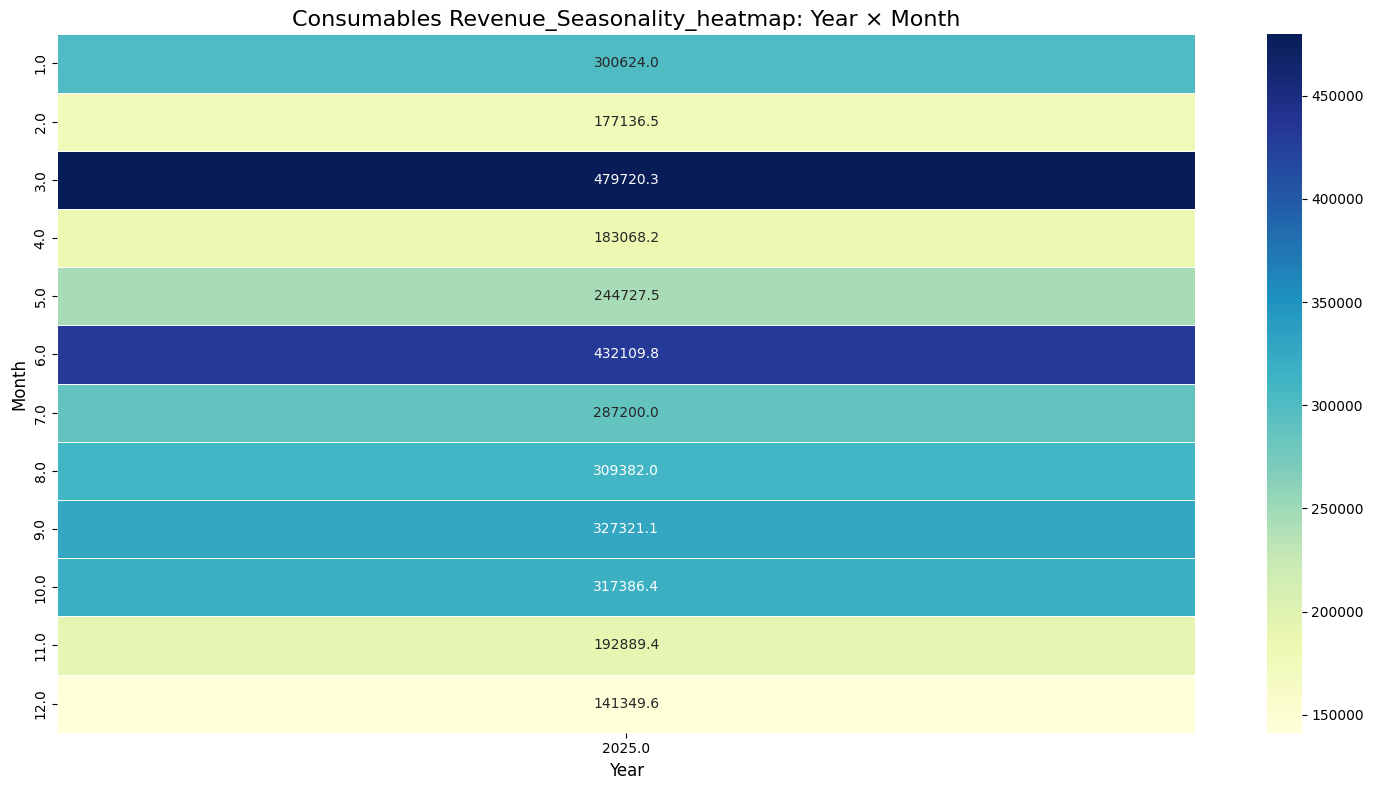

In [117]:
Seasonality_heatmap = original_df.pivot_table(index='Month', columns='Year', values='Total Selling Price', aggfunc='sum')
Seasonality_heatmap = Seasonality_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Consumables Revenue_Seasonality_heatmap: Year × Month', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

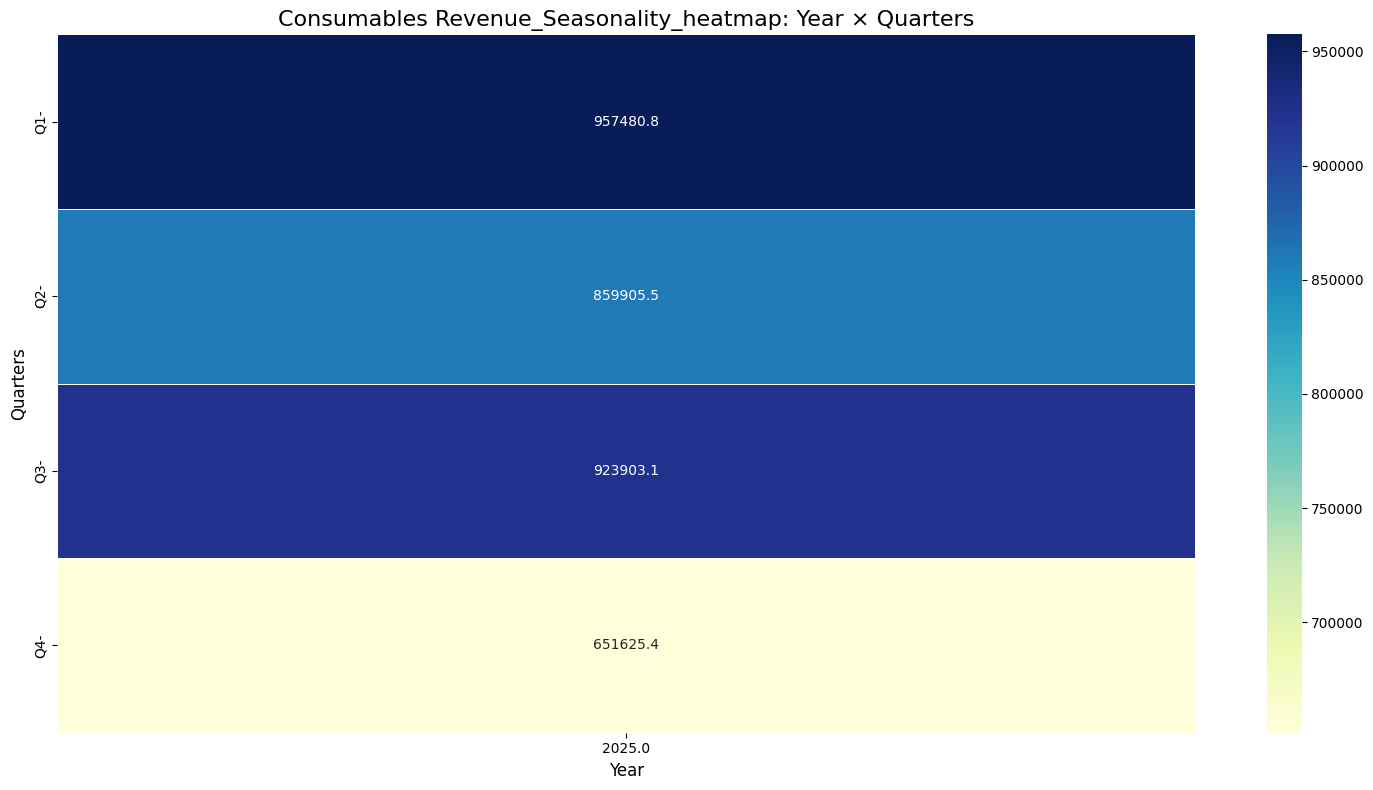

In [118]:
Seasonality_Q_heatmap = original_df.pivot_table(index='Quarters', columns='Year', values='Total Selling Price', aggfunc='sum')
Seasonality_Q_heatmap = Seasonality_Q_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_Q_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Consumables Revenue_Seasonality_heatmap: Year × Quarters', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quarters', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('consumables quarter sales.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

### Consumables + Pharmaceuticals

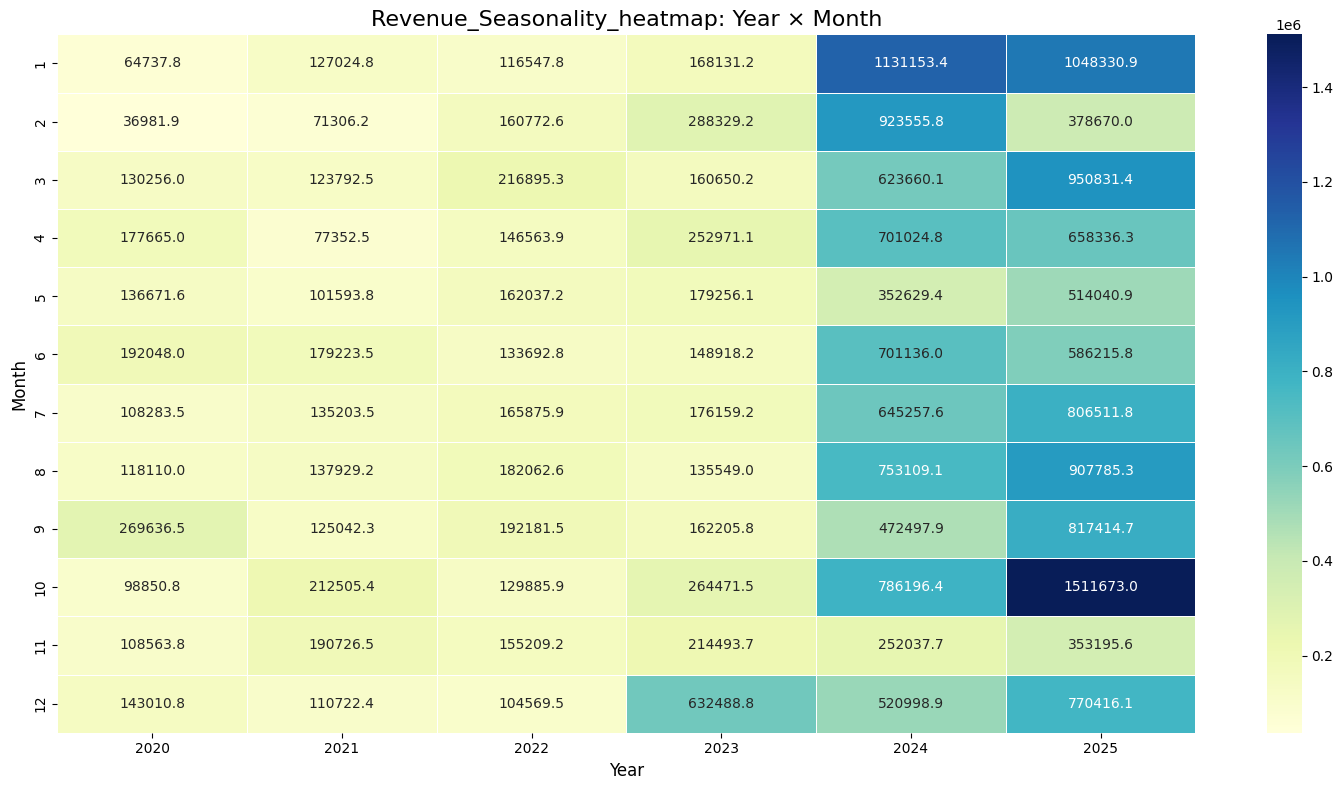

In [119]:
Seasonality_heatmap = Financial_df.pivot_table(index='Month', columns='Year', values='Creditor', aggfunc='sum')
Seasonality_heatmap = Seasonality_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Revenue_Seasonality_heatmap: Year × Month', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

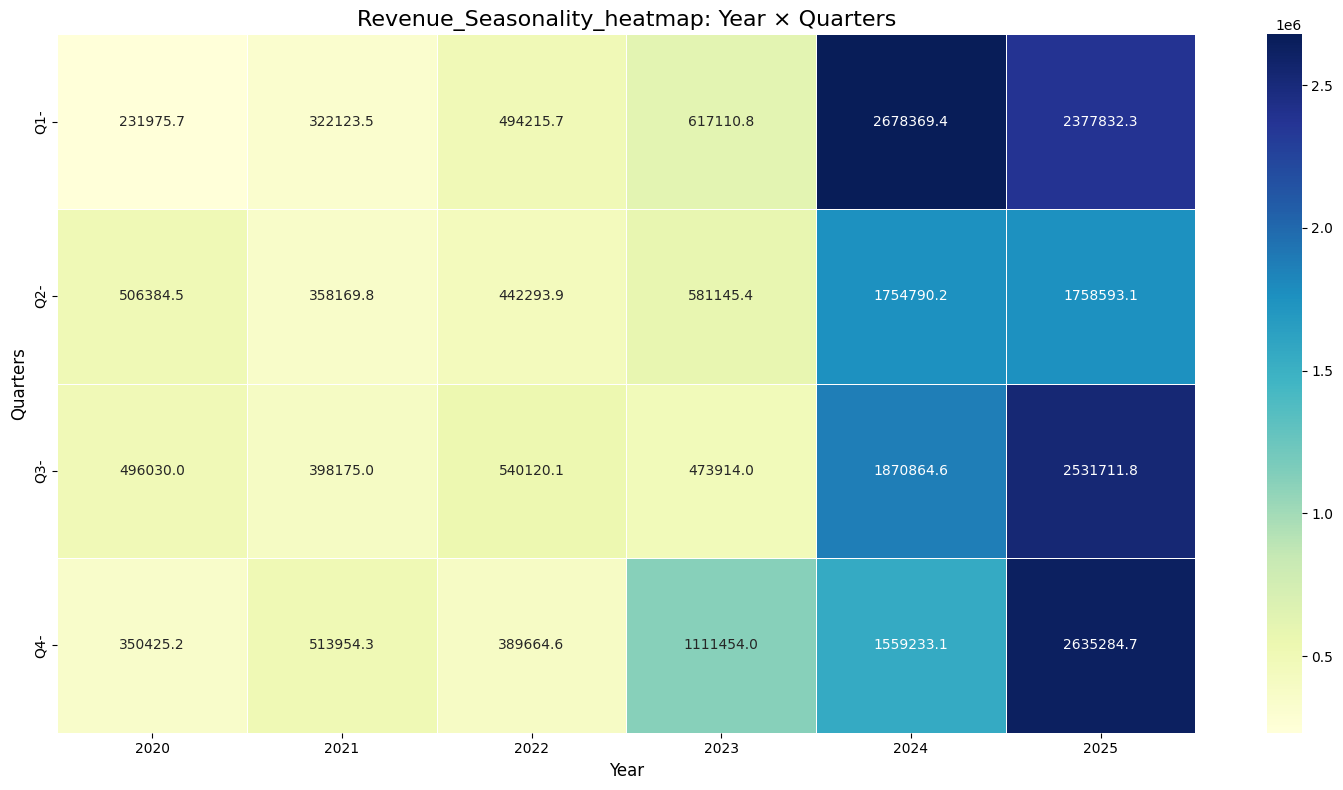

In [120]:
Financial_df['Quarters'] = pd.PeriodIndex(Financial_df['Date'], freq='Q').strftime('Q%q-')

Seasonality_Q_heatmap = Financial_df.pivot_table(index='Quarters', columns='Year', values='Creditor', aggfunc='sum')
Seasonality_Q_heatmap = Seasonality_Q_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_Q_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Revenue_Seasonality_heatmap: Year × Quarters', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quarters', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('sales in quarters.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

# Insight 5: the firm show high performance especially in Quarter 3 and quarter 4 in 2025 and bu analysis it seems that there is a new vision in pharmaceutical branch ,in the other hand the performance in consumables branch is stable , both 24 and 25 are the same numbers and this is a bad sign. the firm has to put a new clear plan for this branch in 2026 to avoid future loss. consumables sales team have to revise its way in dealing with the market.it is highly recommend to increase the sales force in the market in order not to going down.

## Sales by Product Category

In [121]:
# Revenue_per_category = original_df.groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
# Revenue_per_category.head(15)
# top_15_categories = Revenue_per_category['Category'].head(15).to_list()

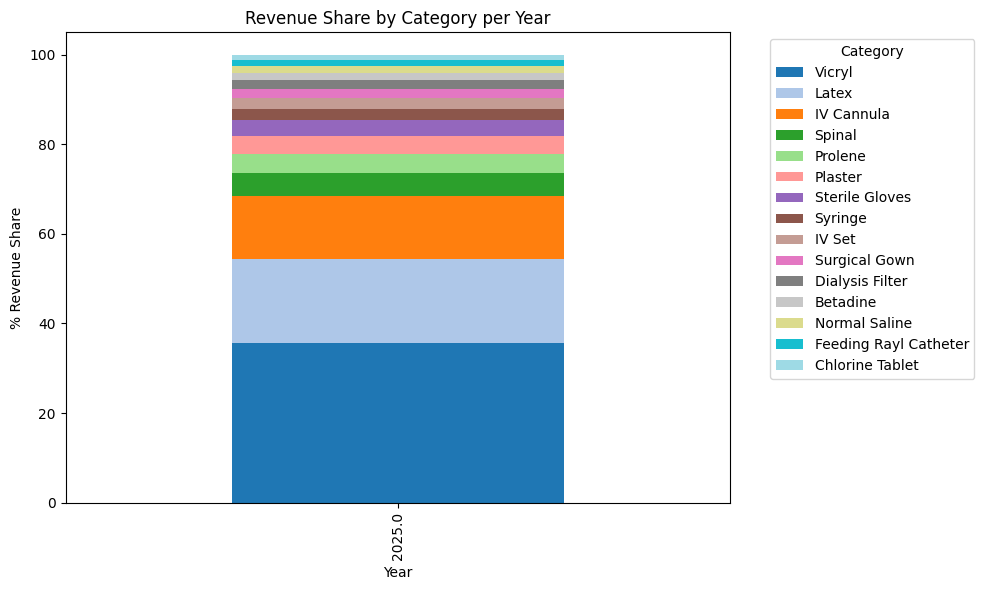

In [122]:
Revenue_per_category = original_df.groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_category.head(15)
top_15_categories = Revenue_per_category['Category'].head(15).to_list()

category_years = original_df[original_df['Category'].isin(top_15_categories)].groupby(['Year','Category'])["Total Selling Price"].sum().reset_index().sort_values(by=['Year','Total Selling Price'], ascending=[True,False])

category_years_pivot = category_years.pivot(index='Year', columns='Category', values='Total Selling Price')
pivot_percent = category_years_pivot.div(category_years_pivot.sum(axis=1), axis=0) * 100
sorted_columns = pivot_percent.sum().sort_values(ascending=False).index
pivot_percent = pivot_percent[sorted_columns]

pivot_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Category per Year')
# Move legend outside the plot
plt.legend(
    title='Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig('top 15 categories.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [123]:
Revenue_per_category

,index,Category,Total Selling Price
0,107,Vicryl,1013131.5
1,58,Latex,531869.0
2,52,IV Cannula,399626.0
3,89,Spinal,146945.0
4,79,Prolene,118725.0
...,...,...,...
103,40,Eye Patch,154
104,93,Sterilization Paper,138
105,103,Tourniquet,90
106,83,Sample Cup,60


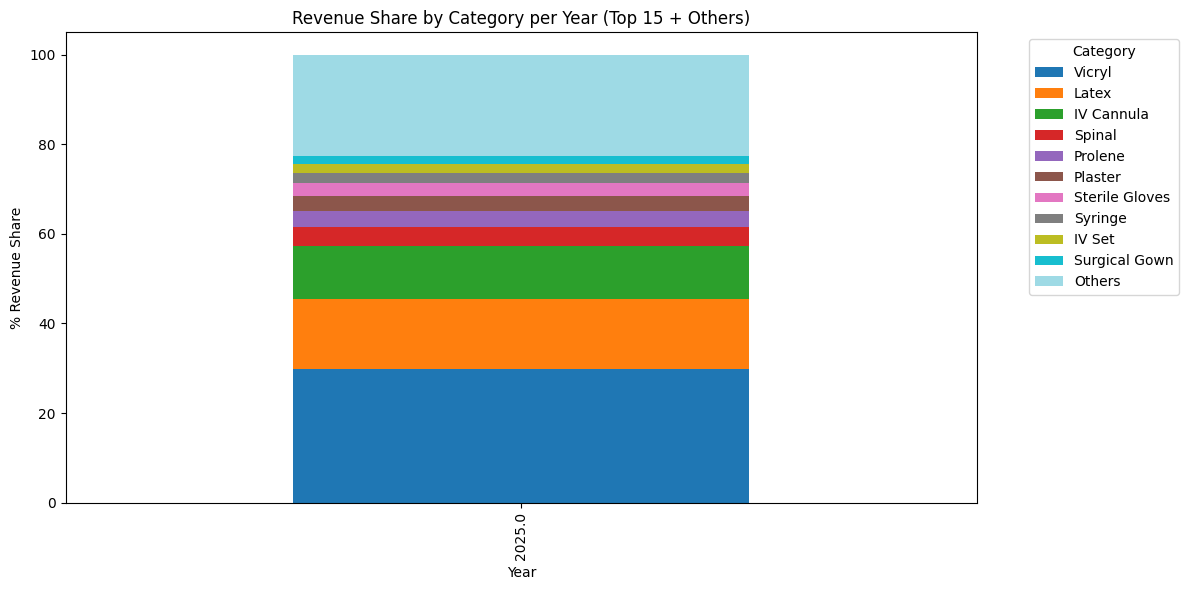

In [124]:




# Step 1: Find top 15 categories
Revenue_per_category = (
    original_df.groupby('Category')['Total Selling Price']
    .sum()
    .reset_index()
    .sort_values(by='Total Selling Price', ascending=False)
)
top_10_categories = Revenue_per_category['Category'].head(10).to_list()

# Step 2: Create a new column that labels top categories vs. "Others"
original_df['Category_Grouped'] = original_df['Category'].where(
    original_df['Category'].isin(top_10_categories), 'Others'
)

# Step 3: Group again by year and grouped category
category_years = (
    original_df.groupby(['Year', 'Category_Grouped'])['Total Selling Price']
    .sum()
    .reset_index()
    .sort_values(by=['Year', 'Total Selling Price'], ascending=[True, False])
)

# Step 4: Pivot for stacked bar
category_years_pivot = category_years.pivot(
    index='Year', columns='Category_Grouped', values='Total Selling Price'
)

# Step 5: Convert to % of revenue share
pivot_percent = category_years_pivot.div(category_years_pivot.sum(axis=1), axis=0) * 100

# Step 6: Sort columns (keep "Others" last)
sorted_columns = (
    pivot_percent.drop(columns='Others', errors='ignore').sum().sort_values(ascending=False).index
)
if 'Others' in pivot_percent.columns:
    sorted_columns = sorted_columns.insert(len(sorted_columns), 'Others')

pivot_percent = pivot_percent[sorted_columns]

# Step 7: Plot
pivot_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Category per Year (Top 15 + Others)')

# Legend outside
plt.legend(
    title='Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig('categories share.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()


In [125]:
pivot_percent

Category_Grouped,Vicryl,Latex,IV Cannula,Spinal,Prolene,Plaster,Sterile Gloves,Syringe,IV Set,Surgical Gown,Others
Year,,,,,,,,,,,
2025.0,29.860211,15.675873,11.778251,4.330937,3.499204,3.319859,3.00121,2.142818,1.942091,1.73379,22.715757


# insight 6: there is four categories to talk about, a significant increase in both vicryl and iv cannula categories share with 5% increase in vicryl and 8% in iv cannula , while latex has a stable share about 16%.Also spinal has a significat jump from 2% to 4% sharing percentage. so , in 2026 we have to either increase our GP from these categories or try to have some stock with lower prices.(find a more comfortable deals with suppliers)

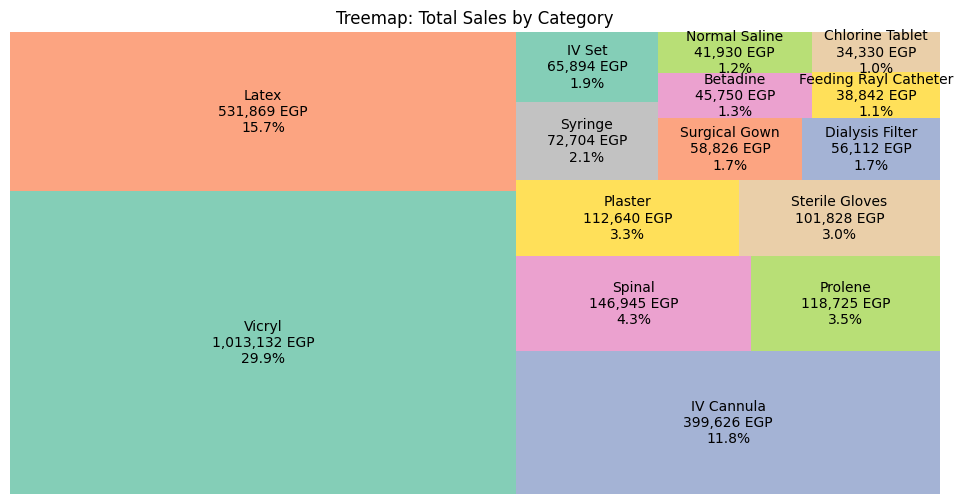

In [126]:
! pip install squarify
import squarify

category_total = original_df[original_df['Category'].isin(top_15_categories)].groupby('Category')['Total Selling Price'].sum().reset_index()
category_total = category_total.sort_values(by='Total Selling Price', ascending=False)
category_total['Total Selling Price'] = pd.to_numeric(category_total['Total Selling Price'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total['Category'], 
        category_total['Total Selling Price'], 
        (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100)
    )
]
squarify.plot(sizes=category_total['Total Selling Price'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total)), 
              alpha=0.8)

plt.axis('off')
plt.title('Treemap: Total Sales by Category')
plt.savefig('categories treemap sales.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

In [127]:
original_df

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Year,Category,Month,Total Buying Price,Quarters,Category_Grouped
8213,حامل ذراع بمثبت صغير Tiger,Tiger,حامل ذراع بمثبت صغير,S,15,45,675,Kareem,26.4,Hemeda,1,2025-01-02,1/2025,279,2025.0,Arm Holder,1.0,396.0,Q1-,Others
8214,حامل ذراع بمثبت Tiger XL,Tiger,حامل ذراع بمثبت XL,XL,15,45,675,Kareem,26.4,Hemeda,1,2025-01-02,1/2025,279,2025.0,Arm Holder,1.0,396.0,Q1-,Others
8215,حامل ذراع بمثبت Tiger XXL,Tiger,حامل ذراع بمثبت XXL,XXL,15,45,675,Kareem,26.4,Hemeda,1,2025-01-02,1/2025,279,2025.0,Arm Holder,1.0,396.0,Q1-,Others
8216,ماسك طبي,NaN,ماسك طبي,NaN,40,33,1320,Kareem,27,Hemeda,1,2025-01-02,1/2025,240,2025.0,Mask,1.0,1080,Q1-,Others
8217,جوانتي لاتكس لارج يوكير,يوكير,جوانتي لاتكس لارج,L,320,157,50240,El Bayt El Tebby,148,Hemeda,1,2025-01-02,1/2025,2880,2025.0,Latex,1.0,47360,Q1-,Latex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8974,ابر اسباينال برتقالي مقاس ٢٥ KDL,KDL,ابر اسباينال برتقالي مقاس ٢٥,25,300,45.6,13680.0,Motakhssoon,37.25,Taha Yasen,"17""",2025-12-15,"17""/2025",2505.0,2025.0,Spinal,12.0,11175.0,Q4-,Spinal
8975,شبكة برولين ٦*١١,NaN,شبكة برولين ٦*١١,6*11,15,171.0,2565.0,El Yosr,140,Taha Yasen,"18""",2025-12-20,"18""/2025",465.0,2025.0,Prolene Mesh,12.0,2100,Q4-,Others
8976,شبكة برولين ١٥*١٥ كوري,كوري,شبكة برولين ١٥*١٥,15*15,15,342.0,5130.0,El Yosr,285,Taha Yasen,"18""",2025-12-20,"18""/2025",855.0,2025.0,Prolene Mesh,12.0,4275,Q4-,Others
8977,ممر هواء مقاس زيرو اسود,NaN,ممر هواء مقاس زيرو اسود,0 black,1,399.0,399.0,Heba Lab,300,Taha Yasen,"18""",2025-12-20,"18""/2025",99.0,2025.0,Airway Tube,12.0,300,Q4-,Others


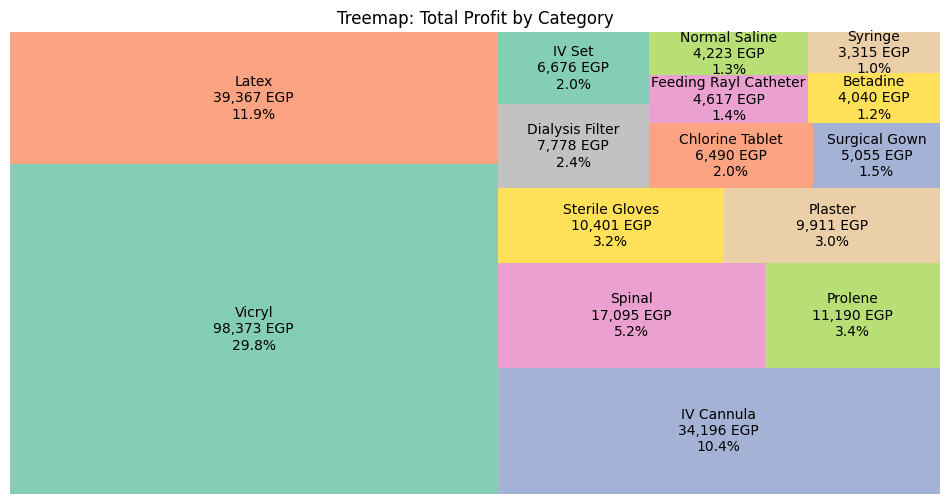

In [128]:
category_total_profit = original_df[original_df['Category'].isin(top_15_categories)].groupby('Category')['Profit'].sum().reset_index()
category_total_profit = category_total_profit.sort_values(by='Profit', ascending=False)
category_total_profit['Profit'] = pd.to_numeric(category_total_profit['Profit'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total_profit['Category'], 
        category_total_profit['Profit'], 
        (category_total_profit['Profit'] / original_df['Profit'].sum() * 100)
    )
]
squarify.plot(sizes=category_total_profit['Profit'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total)), 
              alpha=0.8)

plt.axis('off')
plt.savefig('categories treemap profit.jpg', bbox_inches = 'tight', dpi = 200)
plt.title('Treemap: Total Profit by Category')
plt.show()

# insight 7 : over the 6 years , our three main categories (latex,vicryl and iv cannula) have almost 40% from our total sales in consumables branch which is a huge percentage , there is a must to find a way to gain more profits from them as the overall profits from them is almost 32%

### 2025

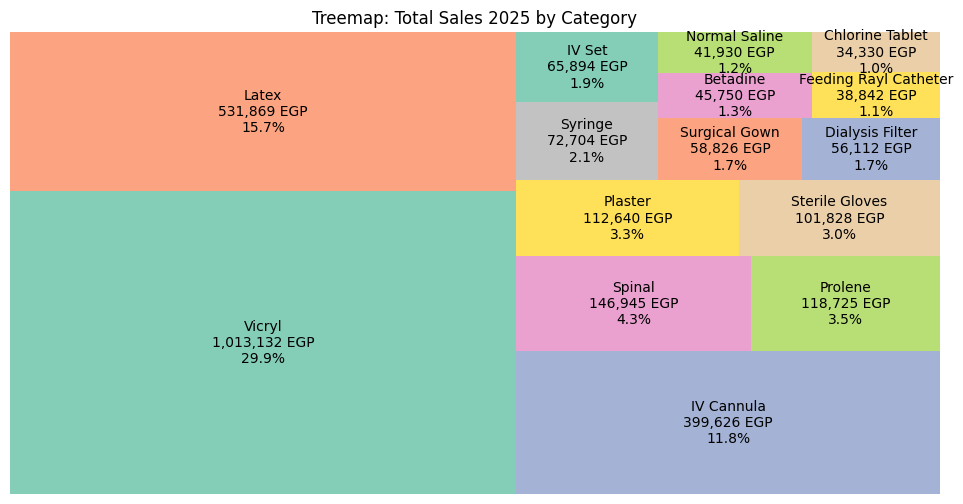

In [129]:
Revenue_per_category = original_df[original_df['Year'] == 2025].groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_category.head(15)
top_15_categories = Revenue_per_category['Category'].head(15).to_list()

category_total = original_df[(original_df['Category'].isin(top_15_categories)) & (original_df['Year'] == 2025)].groupby('Category')['Total Selling Price'].sum().reset_index()
category_total = category_total.sort_values(by='Total Selling Price', ascending=False)
category_total['Total Selling Price'] = pd.to_numeric(category_total['Total Selling Price'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total['Category'], 
        category_total['Total Selling Price'], 
        (category_total['Total Selling Price'] / original_df[original_df['Year'] == 2025]['Total Selling Price'].sum() * 100)
    )
]
squarify.plot(sizes=category_total['Total Selling Price'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total)), 
              alpha=0.8)

plt.axis('off')
plt.title('Treemap: Total Sales 2025 by Category')
plt.savefig('categories treemap sales 2025.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

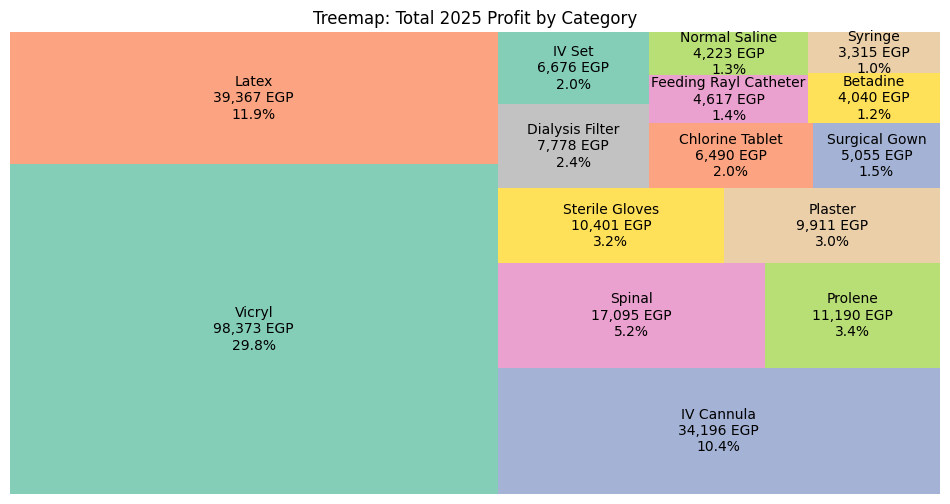

In [130]:
category_total_profit_25 = original_df[(original_df['Category'].isin(top_15_categories)) & (original_df['Year'] == 2025)].groupby('Category')['Profit'].sum().reset_index()
category_total_profit_25 = category_total_profit_25.sort_values(by='Profit', ascending=False)
category_total_profit_25['Profit'] = pd.to_numeric(category_total_profit_25['Profit'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total_profit_25['Category'], 
        category_total_profit_25['Profit'], 
        (category_total_profit_25['Profit'] / original_df[original_df['Year'] == 2025]['Profit'].sum() * 100)
    )
]
squarify.plot(sizes=category_total_profit_25['Profit'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total_profit_25)), 
              alpha=0.8)

plt.axis('off')
plt.title('Treemap: Total 2025 Profit by Category')
plt.savefig('categories treemap profit 2025.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

# insight 8 " in 2025, almost 60% of our sales in consumables from our top 3 categories(latex, vicryl and iv cannula) ,however there profit is almost 52% which means we are going on the right way but we have to make sure that in the next year profit % will exceed sales % in these categories

In [131]:
df_2025 = original_df[original_df['Year'] == 2025].groupby(['Product Name','Client']).agg(Total_Selling_Price=("Total Selling Price", "sum"),
                                                                           profit = ("Profit", "sum")).reset_index().sort_values(by=['Product Name','Total_Selling_Price'], ascending=True)
df_2025['pecentage'] = df_2025['Total_Selling_Price'] / df_2025['Total_Selling_Price'].sum() * 100
df_2025['Profit_Margin'] = df_2025['profit'] / df_2025['Total_Selling_Price'] * 100
df_2025.head(30)

,Product Name,Client,Total_Selling_Price,profit,pecentage,Profit_Margin
0,ابر اسباينال اسود مقاس ٢٢,Sharqia,4200,250,0.123787,5.952381
1,ابر اسباينال اسود مقاس ٢٢,Taha Yasen,13420.0,2020.0,0.39553,15.052161
4,ابر اسباينال برتقالي مقاس ٢٥,Montazah,3775,100,0.111261,2.649007
2,ابر اسباينال برتقالي مقاس ٢٥,Eman Khairy,3950,100,0.116419,2.531646
5,ابر اسباينال برتقالي مقاس ٢٥,Sharqia,4200,350,0.123787,8.333333
6,ابر اسباينال برتقالي مقاس ٢٥,Taha Yasen,27100.0,4575.0,0.798723,16.881919
3,ابر اسباينال برتقالي مقاس ٢٥,Jasmin,90300,9700,2.661428,10.741971
7,اسورة تعريف أطفال,Amina,425,25,0.012526,5.882353
8,اسورة تعريف كبار,Arkan Center,100,20,0.002947,20.0
9,اليكترود,Taha Yasen,2100,210,0.061894,10.0


# Insight 9 : Through the years number of products decreased and there is only three categories that took more shares even get more 50 % of total sales in last two years and this indicates that the firm started to know its way to the market and there is an obvious customer segmentation so the firm can make stocks and perform more valuable deals with suppliers regarding to these three categories. Also it is high recommended to revise profits comes from these categories to know if the firm target the right segment or not.

## Top 10 Customers by Revenue (Pareto 80/20)

### Consumables

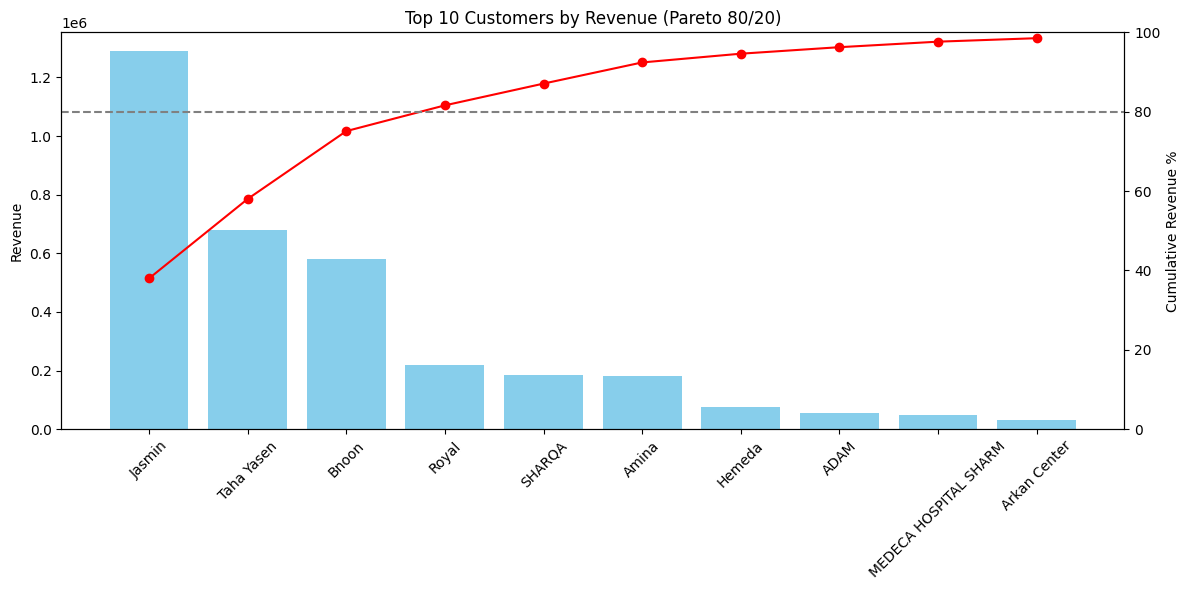

In [132]:
Customer_data = original_df.groupby('Client').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum"),
                                 Transactions_count=("Invoice No", "nunique"),
                                 Products_No=("Product Name", "nunique"),
                                 Category_No=("Category", "nunique"),
                                 years_in_business=("Year", "nunique"),
                                 Units_sold=("Qty.", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)
Customer_data['Contribution Margin %'] = Customer_data['Profit_sum'] / Customer_data['Sales_sum'] * 100
Customer_data['Cumalative_Sales_%'] = Customer_data['Sales_sum'].cumsum() / Customer_data['Sales_sum'].sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Revenue)
ax1.bar(Customer_data['Client'][:10], Customer_data['Sales_sum'][:10], color='skyblue')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(Customer_data['Client'][:10], Customer_data['Cumalative_Sales_%'][:10], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Revenue %')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line
ax2.set_ylim(0, 100)


# Title
plt.title('Top 10 Customers by Revenue (Pareto 80/20)')

plt.tight_layout()
plt.savefig('top consumables customers revenue.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()



In [133]:
Customer_data2

,Client,Sales_sum,Transactions_count,COGS_sum,years_in_business,Profit_sum,Contribution Margin %,Cumalative_Sales_%,Cumalative_Profit_%
64,Wayaak,1.064632e+07,112,1.023557e+07,3,410754.37563,3.858180,42.617695,21.435586
60,Taha Yasen,3.202414e+06,349,2.867699e+06,6,334715.79700,10.451983,55.437098,38.903030
37,Jasmin,2.935501e+06,111,2.602852e+06,3,332648.85000,11.331929,67.188035,56.262609
34,Hemeda,1.635844e+06,238,1.466787e+06,6,169057.59000,10.334576,73.736391,65.085031
9,Bnoon,1.115427e+06,49,1.031086e+06,6,84340.50000,7.561275,78.201494,69.486415
...,...,...,...,...,...,...,...,...,...
40,Leaders,2.105000e+03,3,1.990000e+03,2,115.00000,5.463183,99.988914,99.978578
45,Merchant,1.250000e+03,1,1.000000e+03,1,250.00000,20.000000,99.993917,99.991624
42,Madina,9.000000e+02,1,6.750000e+02,2,225.00000,25.000000,99.997520,100.003366
17,Dr. Salah,5.125000e+02,2,4.700000e+02,1,42.50000,8.292683,99.999572,100.005584


### All Customers (Consumables + Pharmaceuticals)

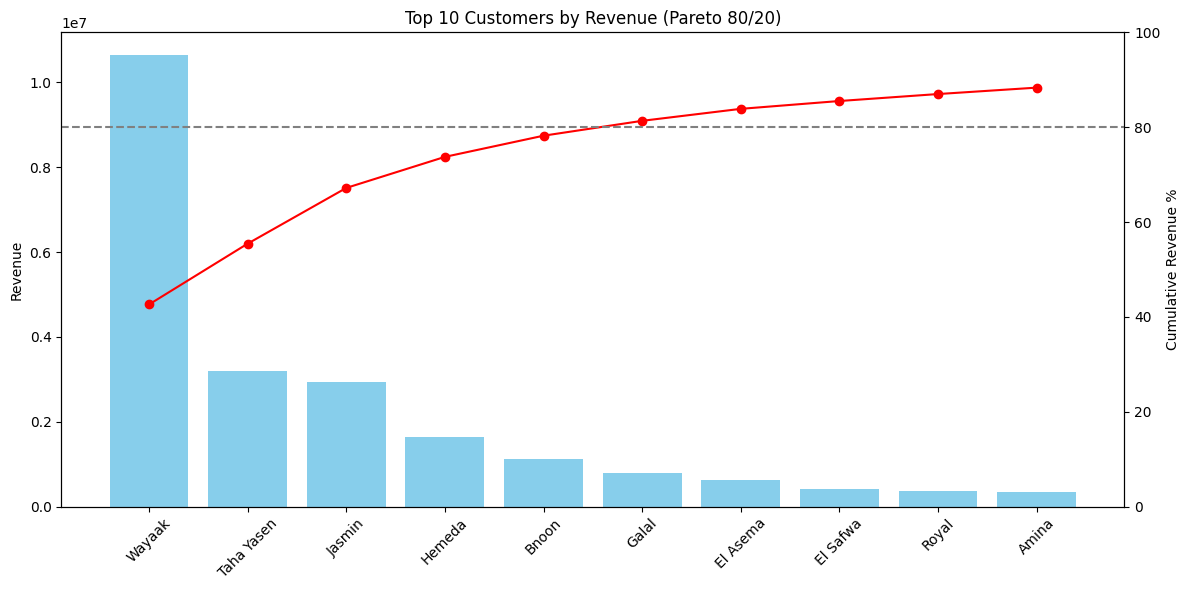

In [134]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Revenue)
ax1.bar(Customer_data2['Client'][:10], Customer_data2['Sales_sum'][:10], color='skyblue')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(Customer_data2['Client'][:10], Customer_data2['Cumalative_Sales_%'][:10], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Revenue %')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line
ax2.set_ylim(0, 100)


# Title
plt.title('Top 10 Customers by Revenue (Pareto 80/20)')

plt.tight_layout()
plt.savefig('top customers revenue.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

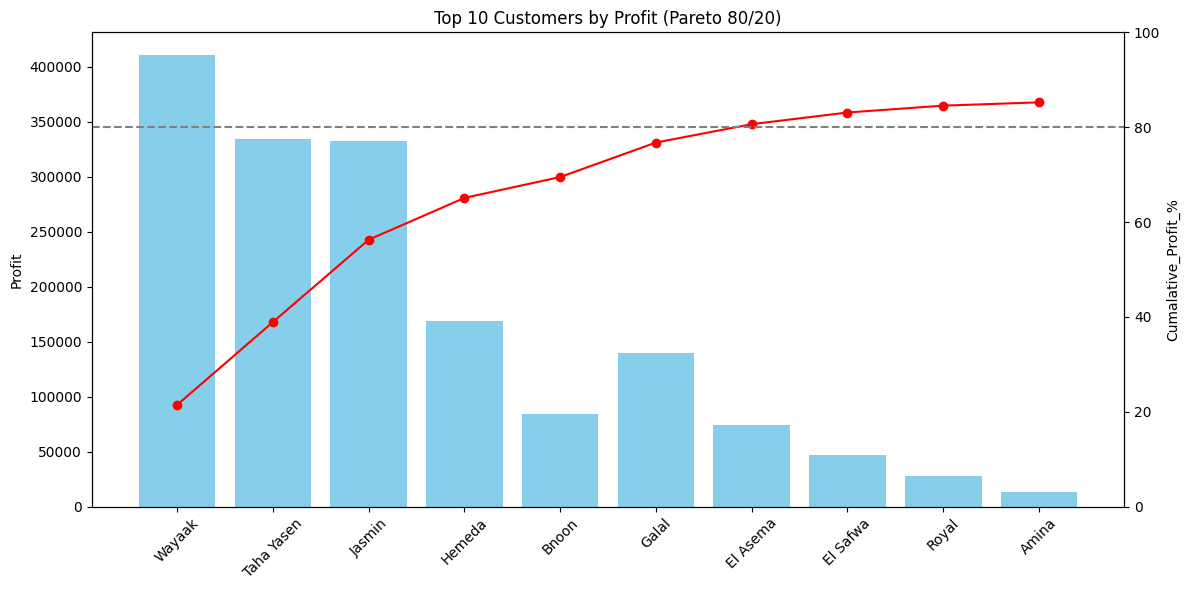

In [135]:


fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Revenue)
ax1.bar(Customer_data2['Client'][:10], Customer_data2['Profit_sum'][:10], color='skyblue')
ax1.set_ylabel('Profit')
ax1.tick_params(axis='x', rotation=45)

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(Customer_data2['Client'][:10], Customer_data2['Cumalative_Profit_%'][:10], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumalative_Profit_%')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line
ax2.set_ylim(0, 100)


# Title
plt.title('Top 10 Customers by Profit (Pareto 80/20)')

plt.tight_layout()
plt.savefig('top customers profit.jpg', bbox_inches = 'tight', dpi = 200)

plt.show()

# Insight 10 : 80% of sales and profits through all years comes from 6 customers, the firm succedded to make retension for 4 of them and the remain two customers were dropped by the firm itself because they had financial issues. Despite this is a good sign in stability and connection with customers but number of customers that make the bulk sales is very low if any of them drop under any circumstances this will make a big problem to the entity , so it is recommended to add either another two big accounts or to add four small accounts that can secure sales if the market changes in any time. Another obvious point that pharmaceutical branch which include only one customer succeded to make profits more than any customer in consumables branch so we have to put an eye on this branch in 2026 as it is very potential. 

### AVG order per year 
### Consumables only

In [136]:
yearly_sales = original_df.groupby('Year').agg(Unique_Customers_per_Year = ('Client' , 'nunique'),
                                Sales_sum=("Total Selling Price", "sum"),
                                Profit_sum=("Profit", "sum"),
                                Products_No=("Product Name", "nunique"),
                                Category_No=("Category", "nunique"),
                                Transactions_count=("Invoice No", "nunique")).reset_index()
yearly_sales['AOV'] = yearly_sales['Sales_sum'] / yearly_sales['Transactions_count']
yearly_sales['Purchase_Frequency'] = yearly_sales['Transactions_count'] / yearly_sales["Year"].nunique()
yearly_sales['Gross_Margin'] = yearly_sales['Profit_sum'] / yearly_sales['Sales_sum']
yearly_sales['CLV'] = (yearly_sales['AOV'] * yearly_sales['Purchase_Frequency'] * yearly_sales['Gross_Margin']) / (1 + 0.1 - 0.95)  # Assuming Discount Rate = 10% and Retention Rate = 95%
yearly_sales

,Year,Unique_Customers_per_Year,Sales_sum,Profit_sum,Products_No,Category_No,Transactions_count,AOV,Purchase_Frequency,Gross_Margin,CLV
0,2025.0,14,3392914.76,329935.86,240,108,165,20563.119758,165.0,0.097243,2199572.4


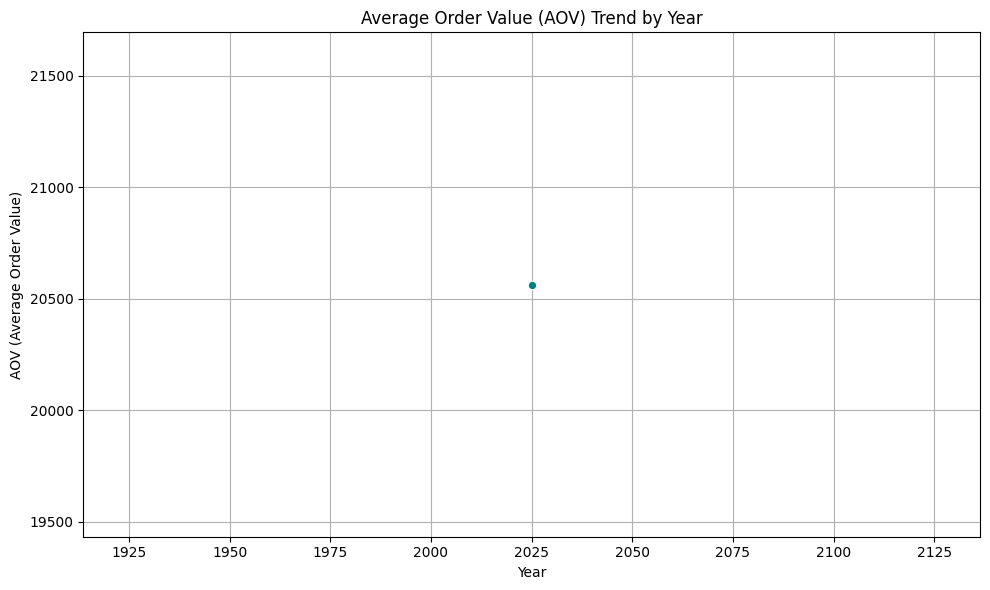

In [137]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='AOV', marker='o', color='teal')
plt.title('Average Order Value (AOV) Trend by Year')
plt.xlabel('Year')
plt.ylabel('AOV (Average Order Value)')
plt.grid(True)
plt.tight_layout()
plt.show()

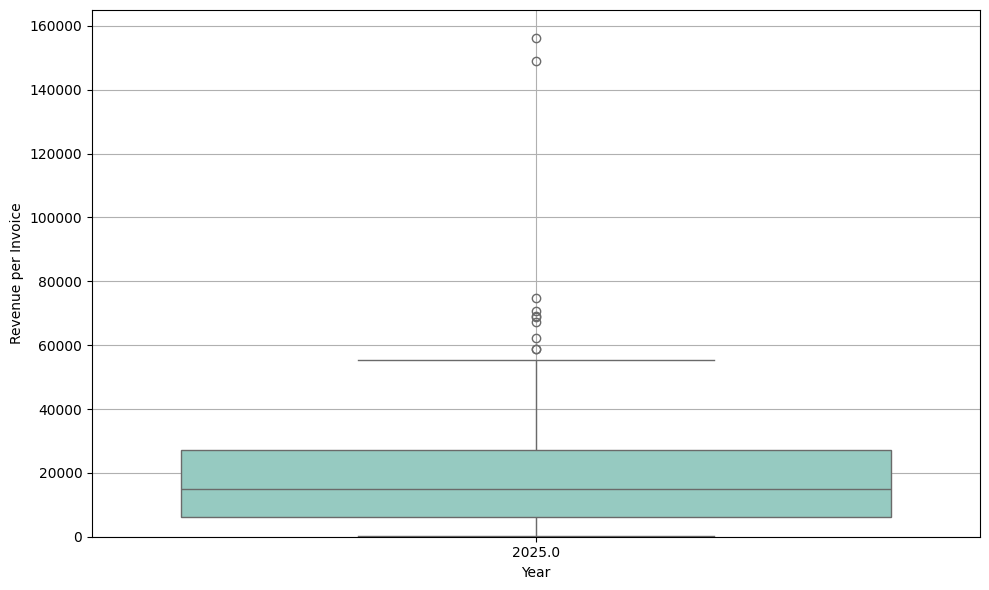

In [138]:
aov_boxplot = original_df.groupby(['Year', 'Invoice No'])['Total Selling Price'].sum().reset_index()
aov_boxplot

plt.figure(figsize=(10, 6))

sns.boxplot(data=aov_boxplot, x='Year', y='Total Selling Price',hue= 'Year', palette='Set3',legend = False)
plt.xlabel('Year')
plt.ylabel('Revenue per Invoice')
plt.ylim(0, 165000)  # Limit y-axis to focus on main distribution
plt.grid(True)
plt.tight_layout()
plt.show()

# insight 8 : Both AVG order value and number of orders are perfect as the firm dropped undesired sales and customers through years and increased value of each order with most valuable customers so AVG order value went up and number of orders dropped alittle and this also saved alot of operation expenses.The firm succedded to decrease AVG operation expenses per ticket.

## 🔑 Customer Metrics


In [139]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

# churn_data = []

# for i in range(1, len(customers_per_year)):
#     year = customers_per_year.loc[i, 'Year']
#     current = customers_per_year.loc[i, 'Client']
#     previous = customers_per_year.loc[i - 1, 'Client']
    
#     lost = previous - current
#     churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
#     churn_data.append({
#         'Year': year,
#         'Customers at Start': len(previous),
#         'Retained Customers': len(previous & current),
#         'Lost Customers': len(lost),
#         'new Customers': len(current - previous),
#         'Churn Rate (%)': round(churn_rate, 2)
#     })

# churn_df = pd.DataFrame(churn_data)
# churn_df

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
# plt.title('Customer Churn Rate by Year')
# plt.xlabel('Year')
# plt.ylabel('Churn Rate (%)')
# plt.xticks(churn_df['Year'])
# plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

,Year,Client
0,2025.0,"{Montazah, Amina, MEDECA HOSPITAL SHARM, Eman ..."


### Customer Churn Rate


In [140]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

,Year,Client
0,2025.0,"{Montazah, Amina, MEDECA HOSPITAL SHARM, Eman ..."


In [141]:
churn_data = []

for i in range(1, len(customers_per_year)):
    year = customers_per_year.loc[i, 'Year']
    current = customers_per_year.loc[i, 'Client']
    previous = customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate, 2)
    })

churn_df = pd.DataFrame(churn_data)
churn_df

""


In [142]:
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
# plt.title('Customer Churn Rate by Year')
# plt.xlabel('Year')
# plt.ylabel('Churn Rate (%)')
# plt.xticks(churn_df['Year'])
# plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [143]:
# churn_df_long = churn_df.melt(
#     id_vars='Year',
#     value_vars=['Customers at Start', 'Retained Customers', 'Lost Customers','new Customers'],
#     var_name='Stage',
#     value_name='Customer Count'
# )

# plt.figure(figsize=(12, 6))
# sns.barplot(data=churn_df_long, x='Year', y='Customer Count', hue='Stage', palette='Set2')
# plt.title('Customer Retention Funnel per Year')
# plt.ylabel('Number of Customers')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()


### Customer Concentration Risk


In [144]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
7,Jasmin,1289281.5,154577.5,40,63,34,1,36520,11.98943,37.99923
13,Taha Yasen,679153.96,88309.71,41,71,37,1,9449,13.0029,58.01606
3,Bnoon,579930,38307,10,18,12,1,12560,6.605452,75.108443
10,Royal,220313,13525,14,26,11,1,3583,6.138993,81.601769
11,SHARQA,185913.0,7981.25,16,62,30,1,2508,4.293003,87.081217
1,Amina,180897.5,4187.5,11,19,11,1,5316,2.314847,92.412842
6,Hemeda,74750,6294.5,1,11,6,1,2005,8.420736,94.615963
0,ADAM,55666,4431,13,17,13,1,444,7.959976,96.256617
8,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,32,1,1097,14.661221,97.647501
2,Arkan Center,29737.5,2792.75,10,29,20,1,500.0,9.391341,98.523959


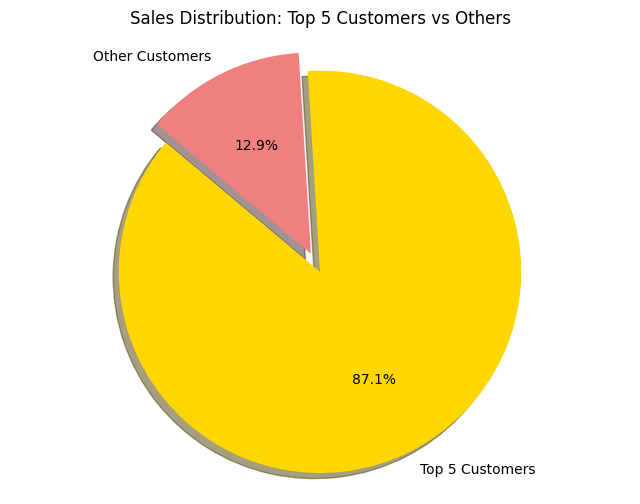

In [145]:
Top_5_customers_sales = Customer_data['Sales_sum'].head(5).sum()
other_customers_sales = Customer_data['Sales_sum'].iloc[5:].sum()

plt.figure(figsize=(8, 6))

plt.pie([Top_5_customers_sales, other_customers_sales], 
        labels=['Top 5 Customers', 'Other Customers'], 
        autopct='%1.1f%%', 
        colors=['gold', 'lightcoral'], 
        startangle=140, 
        explode=(0.1, 0), 
        shadow=True)
plt.title('Sales Distribution: Top 5 Customers vs Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [146]:
top_4 = Customer_data[['Client', 'Sales_sum']].head(4)
top_4

,Client,Sales_sum
7,Jasmin,1289281.5
13,Taha Yasen,679153.96
3,Bnoon,579930
10,Royal,220313


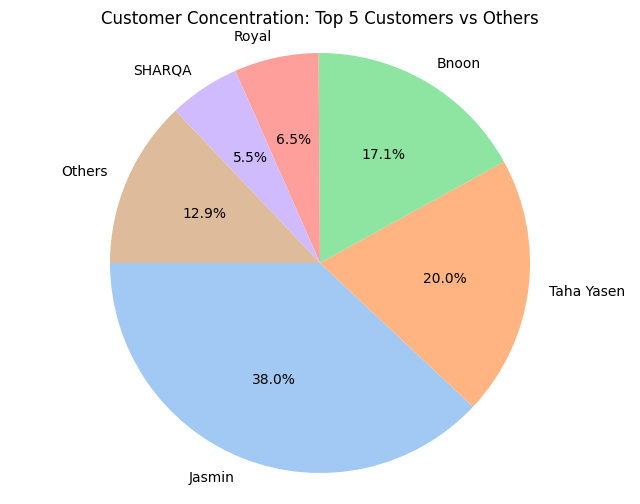

In [147]:
top_5 = Customer_data[['Client', 'Sales_sum']].head(5)
others = Customer_data['Sales_sum'].iloc[5:].sum()

labels = list(top_5['Client']) + ['Others']
sizes = list(top_5['Sales_sum']) + [others]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Customer Concentration: Top 5 Customers vs Others')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

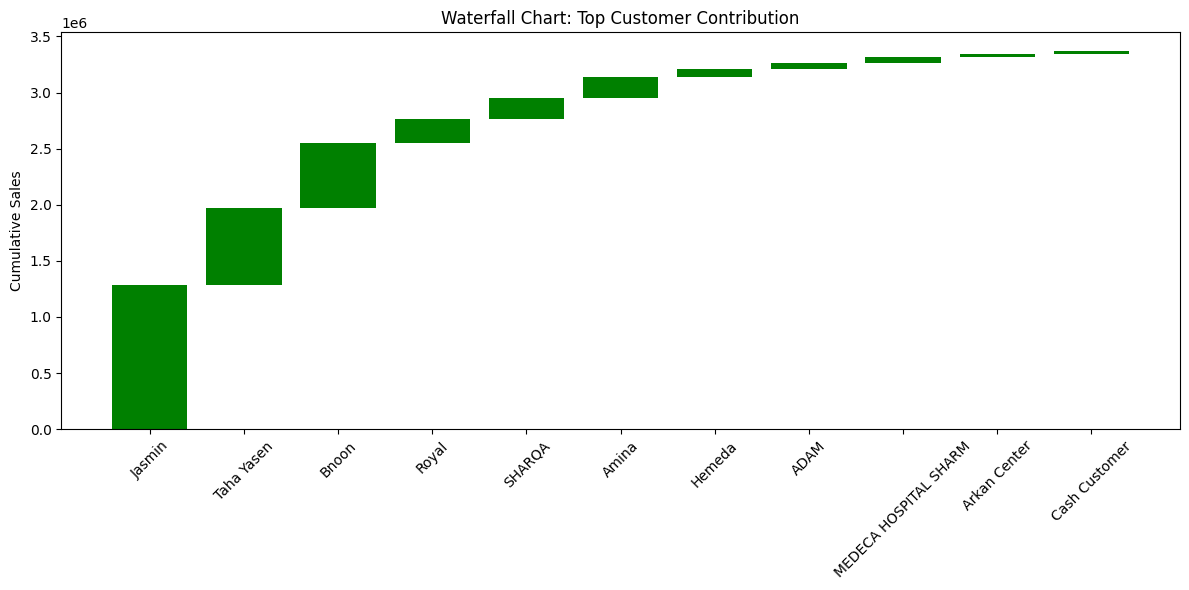

In [148]:
top_customers = original_df.groupby('Client')['Total Selling Price'].sum().sort_values(ascending=False)

top_customers = top_customers.reset_index()
top_customers.columns = ['Client', 'Sales']
top_customers['Cumulative'] = top_customers['Sales'].cumsum()
top_customers['Previous'] = top_customers['Cumulative'].shift(1, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
for i, row in top_customers[:11].iterrows():
    color = 'green' if row['Sales'] >= 0 else 'red'
    ax.bar(row['Client'], row['Sales'], bottom=row['Previous'], color=color)

ax.set_ylabel('Cumulative Sales')
ax.set_title('Waterfall Chart: Top Customer Contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔑 Supplier Metrics


### Supplier Concentration Risk


In [149]:
original_df['Total Buying Price'] = original_df['Qty.'] * original_df['Buying Price']
Supplier = original_df.groupby('Supplier')['Total Buying Price'].sum().reset_index().sort_values(by='Total Buying Price', ascending=False).reset_index()
Supplier['Cumalative_Supplier_%'] = Supplier['Total Buying Price'].cumsum() / Supplier['Total Buying Price'].sum() * 100
Supplier['share_of_total_buying'] = Supplier['Total Buying Price'] / Supplier['Total Buying Price'].sum() * 100
Supplier.head(10)

,index,Supplier,Total Buying Price,Cumalative_Supplier_%,share_of_total_buying
0,21,Safa,1647682.28,53.793458,53.793458
1,11,El Yosr,277406.0,62.850197,9.056739
2,3,Amazon,273245.0,71.771088,8.920891
3,16,Kareem,145870.37,76.533457,4.762369
4,7,El Hanafy,103571.0,79.914839,3.381381
5,18,Motakhssoon,89535.0,82.837974,2.923135
6,2,Ahmed Mongey,88569,85.72957,2.891597
7,14,FOX,87085,88.572718,2.843147
8,6,El Bayt El Tebby,52010,90.270738,1.69802
9,9,El Malek,46071.5,91.774878,1.50414


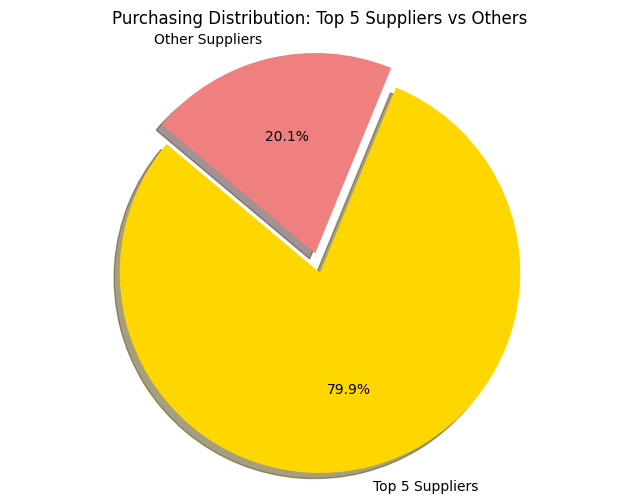

In [150]:
Top_5_suppliers_sales = Supplier['Total Buying Price'].head(5).sum()
other_suppliers_sales = Supplier['Total Buying Price'].iloc[5:].sum()

plt.figure(figsize=(8, 6))

plt.pie([Top_5_suppliers_sales, other_suppliers_sales], 
        labels=['Top 5 Suppliers', 'Other Suppliers'], 
        autopct='%1.1f%%', 
        colors=['gold', 'lightcoral'], 
        startangle=140, 
        explode=(0.1, 0), 
        shadow=True)
plt.title('Purchasing Distribution: Top 5 Suppliers vs Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


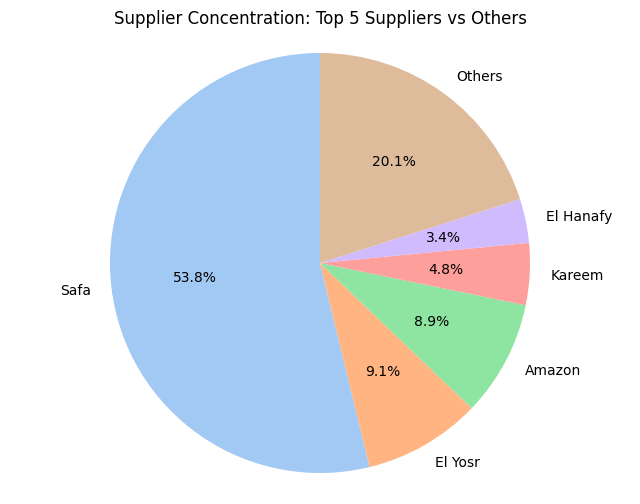

In [151]:
top_5 = Supplier[['Supplier', 'Total Buying Price']].head(5)
others = Supplier['Total Buying Price'].iloc[5:].sum()

labels = list(top_5['Supplier']) + ['Others']
sizes = list(top_5['Total Buying Price']) + [others]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Supplier Concentration: Top 5 Suppliers vs Others')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

In [155]:
Supplier_revenue_profit

,index,Supplier,Profit_sum,Buying_sum,revenue_sum
0,21,Safa,173855.32,1647682.28,1821537.6
1,11,El Yosr,28509.0,277406.0,305915.0
2,3,Amazon,17690.0,273245.0,290935
3,16,Kareem,18142.99,145870.37,164013.36
4,7,El Hanafy,12785,103571.0,116356
5,18,Motakhssoon,14637.4,89535.0,104172.4
6,2,Ahmed Mongey,12583.0,88569,101152.0
7,14,FOX,7661,87085,94746
8,6,El Bayt El Tebby,3090,52010,55100
9,9,El Malek,6095.5,46071.5,52167


In [158]:
Supplier_revenue_profit = original_df.groupby('Supplier').agg(Profit_sum=("Profit", "sum"),
                                                 Buying_sum=("Total Buying Price", "sum"),
                                                 revenue_sum = ("Total Selling Price","sum")).reset_index().sort_values(by='Buying_sum', ascending=False).reset_index()
Supplier_revenue_profit['contribution_margin'] = Supplier_revenue_profit['Profit_sum'] / Supplier_revenue_profit['revenue_sum'] * 100
Supplier_revenue_profit.head(10)

ZeroDivisionError: division by zero

<Figure size 1200x600 with 0 Axes>

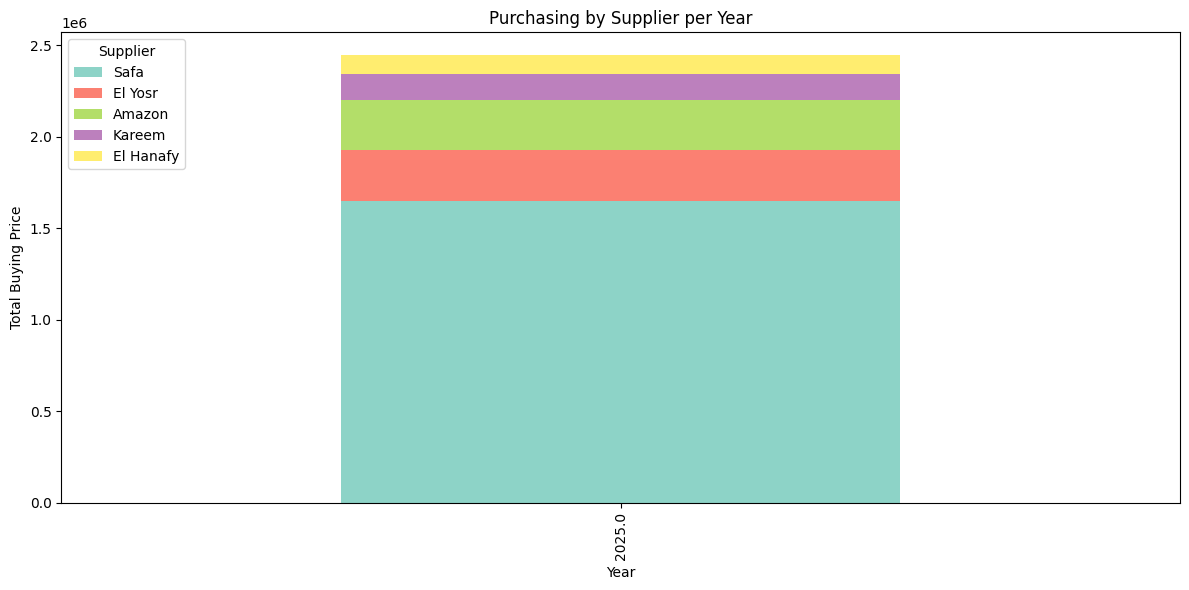

In [154]:
supplier_by_year = original_df.groupby(['Supplier','Year'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])
supplier_satcked = supplier_by_year.pivot(index='Year', columns='Supplier', values='Total Buying Price').loc[:, Supplier_revenue_profit['Supplier'].head(5)]  # Keep only top 10 suppliers

plt.figure(figsize=(12, 6))
supplier_satcked.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.ylabel('Total Buying Price')
plt.title('Purchasing by Supplier per Year')
# Move legend outside the plot
plt.legend(
    title='Supplier',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

# Insight 9 : Same point in suppliers , the firm depends on only five suppliers for more that 70% of its COGS, this is good in relationships and in making more valuable deals with those suppliers but its also recommended to add another one or two new suppliers.

## 🔑 Financial Metrics

### Expense Ratio

In [ ]:
total_profits_by_year

,Year,revenue,cogs,Profit,Profit Margin,Growth Rate
0,2020,1.584815e+06,1.435610e+06,149205.897500,9.414717,NaN
1,2021,1.592423e+06,1.447531e+06,144891.838431,9.098831,-2.891346
2,2022,1.866294e+06,1.588133e+06,278160.851800,14.904448,91.978275
3,2023,2.783624e+06,2.500628e+06,282996.425000,10.166474,1.738409
4,2024,7.863257e+06,7.370826e+06,492430.773130,6.262427,74.006005
5,2025,9.303422e+06,8.733532e+06,569889.729500,6.125593,15.729918


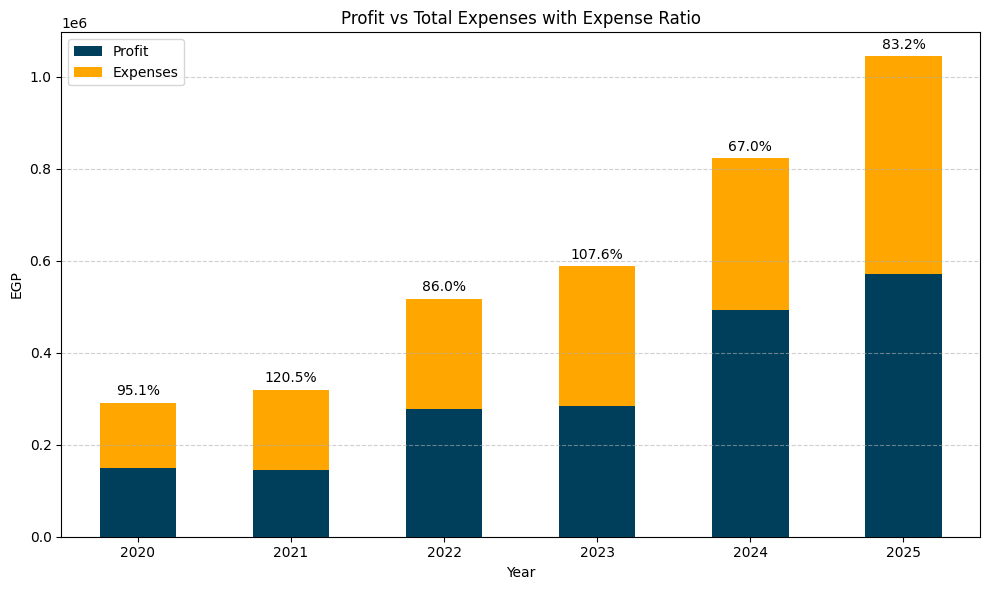

In [ ]:

# Your base code
profit_expenses = total_profits_by_year[['Year','Profit']].merge(yearly_expenses, on='Year', how='left')
profit_expenses['Expense ratio %'] = profit_expenses['Cost'] / profit_expenses['Profit'] * 100
profit_expenses.rename(columns={'Cost':'Total Expenses'}, inplace=True)
profit_expenses.set_index('Year', inplace=True)

# Plot
ax = profit_expenses[['Profit', 'Total Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(profit_expenses.iterrows()):
    ratio = row['Expense ratio %']
    total_height = row['Profit'] + row['Total Expenses']
    ax.text(i, total_height + 10000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Profit vs Total Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Profit', 'Expenses'])
plt.show()


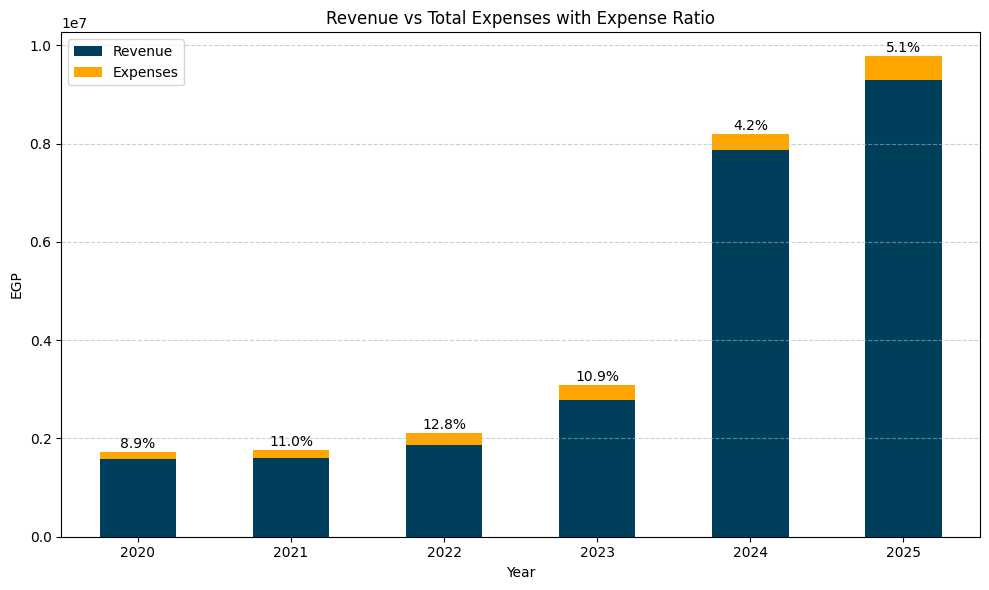

In [ ]:
# Your base code
revenue_expenses = total_profits_by_year[['Year','revenue']].merge(yearly_expenses, on='Year', how='left')
revenue_expenses['Expense ratio %'] = revenue_expenses['Cost'] / revenue_expenses['revenue'] * 100
revenue_expenses.rename(columns={'Cost':'Total Expenses'}, inplace=True)
revenue_expenses.set_index('Year', inplace=True)

# Plot
ax = revenue_expenses[['revenue', 'Total Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(revenue_expenses.iterrows()):
    ratio = row['Expense ratio %']
    total_height = row['revenue'] + row['Total Expenses']
    ax.text(i, total_height + 20000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Revenue vs Total Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Revenue', 'Expenses'])
plt.show()

# Insight 10: expenses eat almost all profits and in the most success year 2024 was 67% of GP, it highly recommend to ensure that expenses ratio in 2026 will be 60% only. This will be a good indicator for the firm financial health. we have recommended before to present a new branch to the market with the same nimber of emnployees. we can also do two more steps, first increasing sales alittle bit in each section and icrease our profit percentage alittle bit also but all of this cannot be done without incraese the collection cycle as there is already a problem in cashflow.

### Marketing Spend Ratio


In [ ]:
expenses_df.head()

,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost,Year,Month
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565,2020,1
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880,2020,1
3,2020-01-01 00:00:00,Operation,Transfer,Shbeen El Knater,El Mahdy,1,Safwat,50,2020,1
4,2020-01-01 00:00:00,General,Boxes,Shbeen El Kom,El Khawaga,NaN,Company,600,2020,1
5,2020-01-01 00:00:00,General,Cards,NaN,NaN,NaN,Khaled,80,2020,1


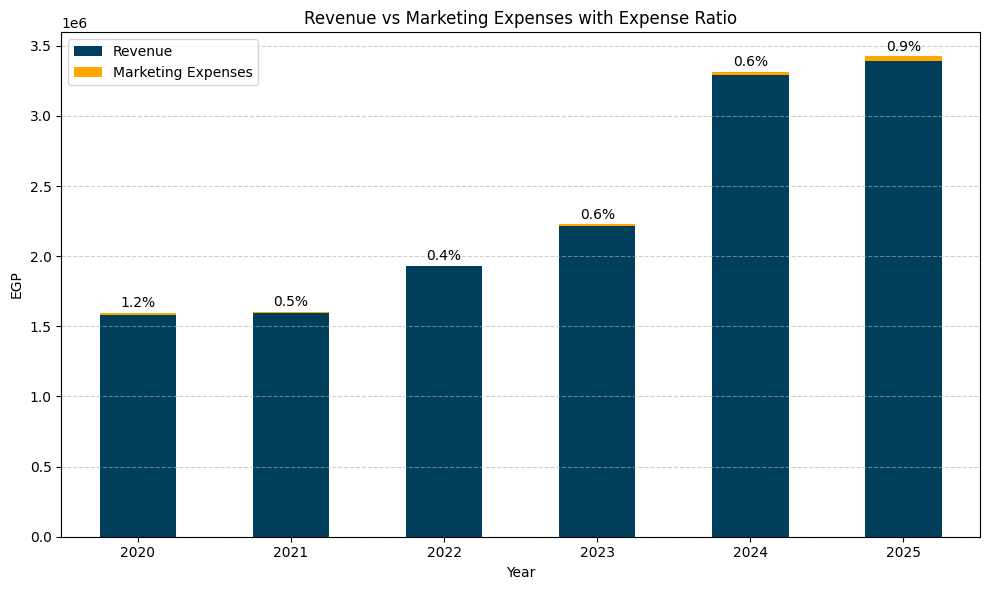

In [ ]:
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']
marketing = marketing.groupby('Year')['Cost'].sum().reset_index()  
marketing_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(marketing[['Year','Cost']], on='Year', how='left')
marketing_expenses['Marketing Expense ratio %'] = marketing_expenses['Cost'] / marketing_expenses['Selling_sum'] * 100
marketing_expenses.rename(columns={'Cost':'Marketing & Sales Expenses'}, inplace=True)
marketing_expenses.set_index('Year', inplace=True)
marketing_expenses

ax = marketing_expenses[['Selling_sum', 'Marketing & Sales Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(marketing_expenses.iterrows()):
    ratio = row['Marketing Expense ratio %']
    total_height = row['Selling_sum'] + row['Marketing & Sales Expenses']
    ax.text(i, total_height + 20000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Revenue vs Marketing Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Revenue', 'Marketing Expenses'])
plt.show()


In [ ]:
# marketing_expenses = marketing_expenses.merge(yearly_expenses, left_index=True, right_on='Year', how='left').set_index('Year')
# marketing_expenses['ratio from total expenses %'] = marketing_expenses['Marketing & Sales Expenses'] / marketing_expenses['Cost'] * 100
# marketing_expenses

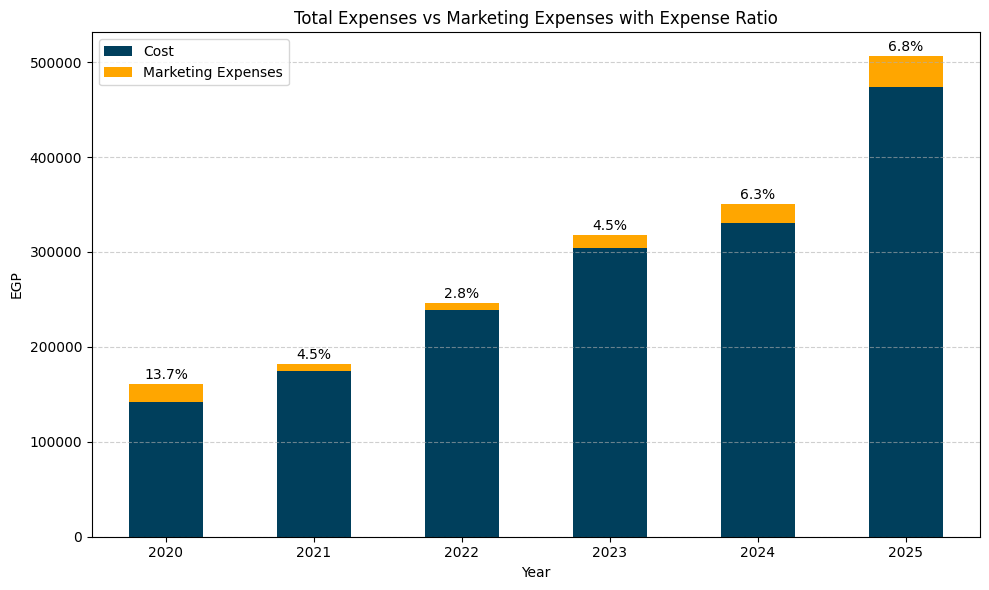

In [ ]:
marketing_expenses = marketing_expenses.merge(yearly_expenses, left_index=True, right_on='Year', how='left').set_index('Year')
marketing_expenses['ratio from total expenses %'] = marketing_expenses['Marketing & Sales Expenses'] / marketing_expenses['Cost'] * 100
marketing_expenses

ax = marketing_expenses[['Cost', 'Marketing & Sales Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(marketing_expenses.iterrows()):
    ratio = row['ratio from total expenses %']
    total_height = row['Cost'] + row['Marketing & Sales Expenses']
    ax.text(i, total_height + 2000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Total Expenses vs Marketing Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Cost', 'Marketing Expenses'])
plt.show()

In [ ]:
profit_expenses

,Profit,Total Expenses,Expense ratio %
Year,,,
2020,149205.897500,141835,95.059915
2021,144891.838431,174540,120.462272
2022,278160.851800,239157,85.977951
2023,282996.425000,304613,107.638462
2024,492430.773130,330040,67.022619
2025,569889.729500,473948.62,83.16497


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_11134/459346537.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



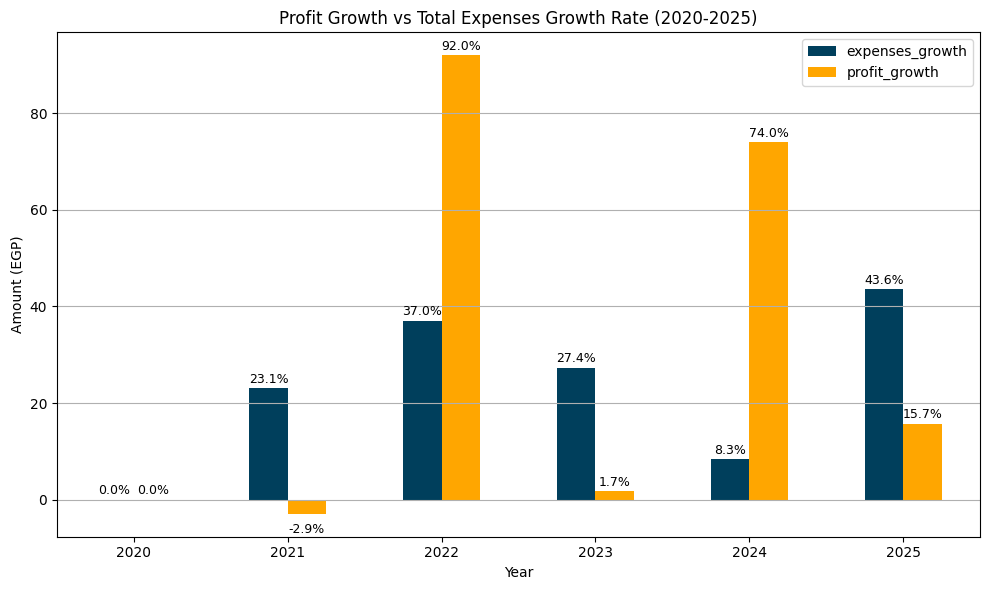

In [ ]:
profit_expenses['profit_growth'] = profit_expenses['Profit'].pct_change() * 100
profit_expenses['expenses_growth'] = profit_expenses['Total Expenses'].pct_change() * 100

ax = profit_expenses[['expenses_growth', 'profit_growth']].plot(kind='bar', figsize=(10,6), color = ['#003f5c', '#ffa600', 'green', 'red'])

# Add data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):  # Avoid labeling NaN values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5 if height >= 0 else height - 2,
                f"{height:.1f}%",
                ha='center',
                va='bottom' if height >= 0 else 'top',
                fontsize=9,
                color='black'
            )
            
plt.title('Profit Growth vs Total Expenses Growth Rate (2020-2025)')
plt.ylabel('Amount (EGP)')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
marketing_expenses

,Selling_sum,Profit_sum,Marketing & Sales Expenses,Marketing Expense ratio %,Cost,ratio from total expenses %
Year,,,,,,
2020,1577652.9625,153163.8875,19442,1.232337,141835,13.707477
2021,1593147.228431,142369.188431,7820,0.490852,174540,4.480348
2022,1926761.1328,272364.6228,6772,0.351471,239157,2.831613
2023,2213421.3,259498.91,13767,0.621978,304613,4.519505
2024,3290487.95,324551.23,20850,0.633645,330040,6.317416
2025,3392914.76,329935.86,32110,0.946384,473948.62,6.774996


In [ ]:
marketing_ratio = marketing_expenses['Marketing & Sales Expenses'].sum() / marketing_expenses['Selling_sum'].sum()
marketing_profit_ratio = marketing_expenses['Marketing & Sales Expenses'].sum() / marketing_expenses['Profit_sum'].sum()

print(f"Overall Marketing to Sales Ratio: {marketing_ratio:.2%}")
print(f"Overall Marketing to Profit Ratio: {marketing_profit_ratio:.2%}")

Overall Marketing to Sales Ratio: 0.72%
Overall Marketing to Profit Ratio: 6.80%


In [ ]:
operation = expenses_df[expenses_df['Type'] == 'Operation']
operation = operation.groupby('Year')['Cost'].sum().reset_index()
operation_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(operation[['Year','Cost']], on='Year', how='left')
operation_expenses['operation Expense ratio %'] = operation_expenses['Cost'] / operation_expenses['Selling_sum'] * 100  
operation_expenses.rename(columns={'Cost':'Operation Expenses'}, inplace=True)
operation_expenses.set_index('Year', inplace=True)
operation_expenses

,Selling_sum,Profit_sum,Operation Expenses,operation Expense ratio %
Year,,,,
2020,1577652.9625,153163.8875,15925,1.009411
2021,1593147.228431,142369.188431,23285,1.461572
2022,1926761.1328,272364.6228,22018,1.142747
2023,2213421.3,259498.91,29979,1.354419
2024,3290487.95,324551.23,32580,0.990127
2025,3392914.76,329935.86,43670,1.287094


In [ ]:
operation_ratio = operation_expenses['Operation Expenses'].sum() / operation_expenses['Selling_sum'].sum()
operation_profit_ratio = operation_expenses['Operation Expenses'].sum() / operation_expenses['Profit_sum'].sum()

print(f"Overall Operation to Sales Ratio: {operation_ratio:.2%}")
print(f"Overall Operation to Profit Ratio: {operation_profit_ratio:.2%}")

Overall Operation to Sales Ratio: 1.20%
Overall Operation to Profit Ratio: 11.30%


In [ ]:
general = expenses_df[expenses_df['Type'] == 'General']
general = general.groupby('Year')['Cost'].sum().reset_index()
general_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(general[['Year','Cost']], on='Year', how='left')
general_expenses['operation Expense ratio %'] = general_expenses['Cost'] / general_expenses['Selling_sum'] * 100  
general_expenses.rename(columns={'Cost':'General Expenses'}, inplace=True)
general_expenses.set_index('Year', inplace=True)
general_expenses

,Selling_sum,Profit_sum,General Expenses,operation Expense ratio %
Year,,,,
2020,1577652.9625,153163.8875,106468,6.748506
2021,1593147.228431,142369.188431,143435,9.003248
2022,1926761.1328,272364.6228,210367,10.918167
2023,2213421.3,259498.91,260867,11.785691
2024,3290487.95,324551.23,276610,8.406352
2025,3392914.76,329935.86,398168.62,11.735297


In [ ]:
general_ratio = general_expenses['General Expenses'].sum() / general_expenses['Selling_sum'].sum()
general_profit_ratio = general_expenses['General Expenses'].sum() / general_expenses['Profit_sum'].sum()

print(f"Overall General Expenses to Sales Ratio: {general_ratio:.2%}")
print(f"Overall General Expenses to Profit Ratio: {general_profit_ratio:.2%}")

Overall General Expenses to Sales Ratio: 9.97%
Overall General Expenses to Profit Ratio: 94.20%


### Operational Efficiency Ratio


# 🔎 Phase 4 – Diagnostic Analytics (Why it happened?)

## 🔑 KPIs / Metrics with Explanations + Charts

### 1. Profitability by Customer Segment

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_11134/3247820784.py:5: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<Figure size 1200x600 with 0 Axes>

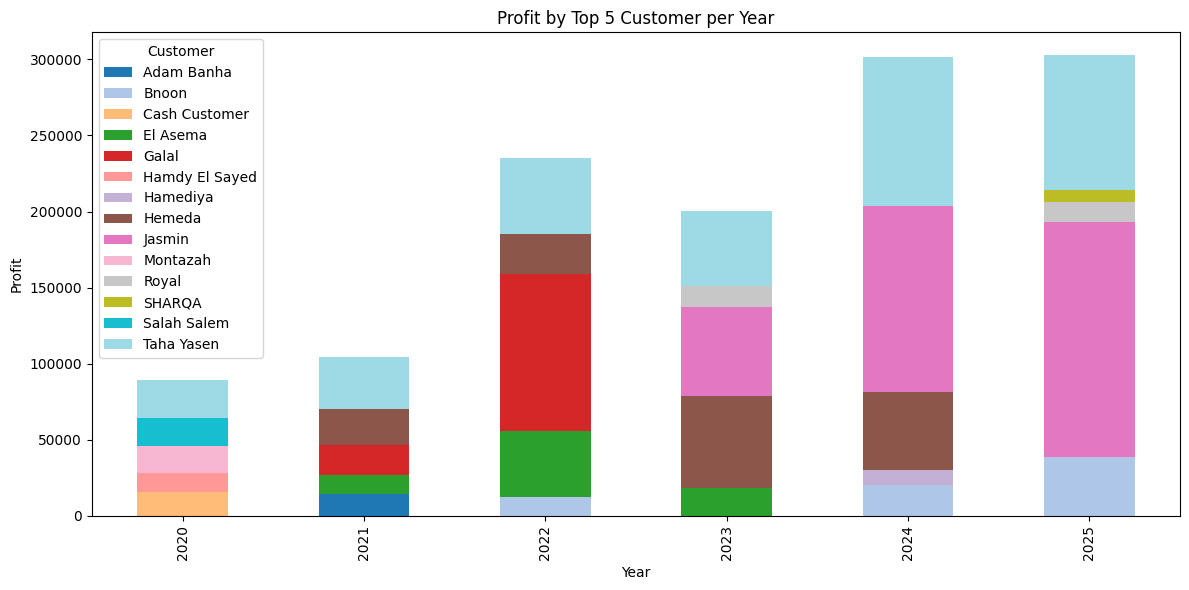

In [ ]:
yearly_customer_profit = original_df.groupby(['Year','Client'])['Profit'].sum().reset_index().sort_values(by=['Year','Profit'], ascending=[True,False])

yearly_customer_profit['Year'].astype(int)
yearly_customer_profit['Profit'] = pd.to_numeric(yearly_customer_profit['Profit'], errors='coerce')
top_5_customers_yearly_profit = yearly_customer_profit.groupby('Year').apply(lambda x : x.nlargest(5, 'Profit')).reset_index(drop=True)
top_5_customers_yearly_profit.head(10)

Top_5_yearly_customer_profit_pivot = top_5_customers_yearly_profit.pivot(index='Year', columns='Client', values='Profit')
# pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
Top_5_yearly_customer_profit_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Profit')
plt.title('Profit by Top 5 Customer per Year')
# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_11134/1811220933.py:8: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<Figure size 1200x600 with 0 Axes>

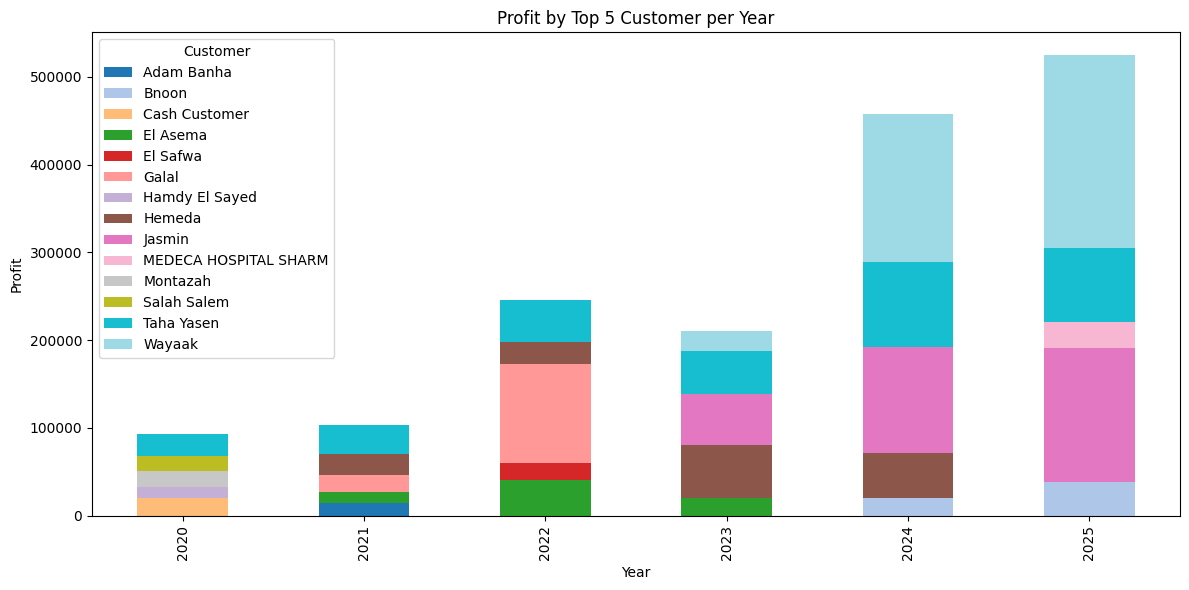

In [ ]:
yearly_customer_profit =Financial_df.groupby(['Year','Client']).agg(revenue = ('Creditor', 'sum'),
                                                                    cogs = ('Cogs', 'sum')).reset_index()
yearly_customer_profit['Profit'] = yearly_customer_profit['revenue'] - yearly_customer_profit['cogs']
yearly_customer_profit = yearly_customer_profit.sort_values(by=['Year','Profit'], ascending=[True,False])

yearly_customer_profit['Year'].astype(int)
yearly_customer_profit['Profit'] = pd.to_numeric(yearly_customer_profit['Profit'], errors='coerce')
top_5_customers_yearly_profit = yearly_customer_profit.groupby('Year').apply(lambda x : x.nlargest(5, 'Profit')).reset_index(drop=True)
top_5_customers_yearly_profit.head(10)

Top_5_yearly_customer_profit_pivot = top_5_customers_yearly_profit.pivot(index='Year', columns='Client', values='Profit')
# pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
Top_5_yearly_customer_profit_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Profit')
plt.title('Profit by Top 5 Customer per Year')
# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

# Insight 11 : There are three customers that walking very well in the level of profits wayaak , taha yaseen and jasmin and the good sign is that their collection is very good. recommended to increase their marketing budget.

#### 1. Waterfall Chart - Showing how Revenue flows to Net Profit

In [ ]:
expenses_df

,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost,Year,Month
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565,2020,1
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880,2020,1
3,2020-01-01 00:00:00,Operation,Transfer,Shbeen El Knater,El Mahdy,1,Safwat,50,2020,1
4,2020-01-01 00:00:00,General,Boxes,Shbeen El Kom,El Khawaga,NaN,Company,600,2020,1
5,2020-01-01 00:00:00,General,Cards,NaN,NaN,NaN,Khaled,80,2020,1
...,...,...,...,...,...,...,...,...,...,...
2355,2025-12-15 00:00:00,General,food,NaN,NaN,NaN,Safwat,40,2025,12
2356,2025-12-18 00:00:00,Marketing & Sales,Jasmin,NaN,NaN,NaN,Khaled,1800,2025,12
2357,2025-12-18 00:00:00,Operation,Transfer,Mnya El Kamh,NaN,NaN,Hasan,250,2025,12
2358,2025-12-18 00:00:00,Operation,Shipping,NaN,NaN,NaN,Hasan,100,2025,12


In [ ]:
salary = expenses_df[expenses_df['Description'] == 'Salary']['Cost'].sum()
operation = expenses_df[expenses_df['Type'] == 'Operation']['Cost'].sum()
cogs = Financial_df['Cogs'].sum()
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']['Cost'].sum()
other_expenses = expenses_df[(~expenses_df['Type'].isin(['Operation', 'Marketing & Sales'])) & (expenses_df['Description'] != 'Salary')]['Cost'].sum()
revenue = Financial_df['Creditor'].sum()
profit = revenue - cogs - salary - operation - marketing - other_expenses


In [ ]:
# Create Waterfall data
data = [
    {'label': 'Revenue', 'value': revenue, 'type': 'absolute'},
    {'label': 'COGS', 'value': -cogs, 'type': 'relative'},
    {'label': 'Salaries', 'value': -salary, 'type': 'relative'},
    {'label': 'Marketing', 'value': -marketing, 'type': 'relative'},
    {'label': 'Operations', 'value': -operation, 'type': 'relative'},
    {'label': 'Other Expenses', 'value': -other_expenses, 'type': 'relative'},
    {'label': 'Net Profit', 'value': profit, 'type': 'total'}
]

waterfall_df = pd.DataFrame(data)
waterfall_df


,label,value,type
0,Revenue,2.499384e+07,absolute
1,COGS,-2.307626e+07,relative
2,Salaries,-1.135200e+06,relative
3,Marketing,-1.007610e+05,relative
4,Operations,-1.674570e+05,relative
5,Other Expenses,-2.617156e+05,relative
6,Net Profit,2.524419e+05,total


In [ ]:
# Calculate percentage of revenue
waterfall_df['percent_of_revenue'] = (waterfall_df['value'] / revenue) * 100

# Format for display
waterfall_df['label_with_percent'] = waterfall_df['label'] + ' (' + waterfall_df['percent_of_revenue'].round(1).astype(str) + '%)'


In [ ]:
# ! pip install plotly
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "Financial Breakdown",
    orientation = "v",
    measure = waterfall_df['type'],       # 'absolute', 'relative', 'total'
    x = waterfall_df['label'],
    textposition = "outside",
    y = waterfall_df['value'],
    text = waterfall_df['percent_of_revenue'].round(1).astype(str) + '%',  # Show percentages as labels
    connector = {"line":{"color":"gray"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
    totals = {"marker":{"color":"blue"}}
))

fig.update_layout(
    title = "Profit Waterfall Chart with % of Revenue",
    waterfallgap = 0.5,
    yaxis_title = "Amount",
    xaxis_title = "Financial Steps",
    autosize=False,              # Set to False to manually control size
    width=1120,                  # Width in pixels (e.g., 1200px)
    height=520,                  # Height in pixels (e.g., 600px)
    showlegend=False
)

fig.show()


In [ ]:
salary = expenses_df[expenses_df['Description'] == 'Salary']['Cost'].sum()
operation = expenses_df[expenses_df['Type'] == 'Operation']['Cost'].sum()
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']['Cost'].sum()
other_expenses = expenses_df[(~expenses_df['Type'].isin(['Operation', 'Marketing & Sales'])) & (expenses_df['Description'] != 'Salary')]['Cost'].sum()
profit = revenue - cogs
net_profit = revenue - cogs - salary - operation - marketing - other_expenses

In [ ]:
# Create Waterfall data
data = [
    {'label': 'Profit', 'value': profit, 'type': 'absolute'},
    {'label': 'Salaries', 'value': -salary, 'type': 'relative'},
    {'label': 'Marketing', 'value': -marketing, 'type': 'relative'},
    {'label': 'Operations', 'value': -operation, 'type': 'relative'},
    {'label': 'Other Expenses', 'value': -other_expenses, 'type': 'relative'},
    {'label': 'Net Profit', 'value': net_profit, 'type': 'total'}
]

waterfall2_df = pd.DataFrame(data)
waterfall2_df

,label,value,type
0,Profit,1.917576e+06,absolute
1,Salaries,-1.135200e+06,relative
2,Marketing,-1.007610e+05,relative
3,Operations,-1.674570e+05,relative
4,Other Expenses,-2.617156e+05,relative
5,Net Profit,2.524419e+05,total


In [ ]:
# Calculate percentage of revenue
waterfall2_df['percent_of_revenue'] = (waterfall2_df['value'] / profit) * 100

# Format for display
waterfall2_df['label_with_percent'] = waterfall2_df['label'] + ' (' + waterfall2_df['percent_of_revenue'].round(1).astype(str) + '%)'

In [ ]:
fig = go.Figure(go.Waterfall(
    name = "Financial Breakdown",
    orientation = "v",
    measure = waterfall2_df['type'],       # 'absolute', 'relative', 'total'
    x = waterfall2_df['label'],
    textposition = "outside",
    y = waterfall2_df['value'],
    text = waterfall2_df['percent_of_revenue'].round(1).astype(str) + '%',  # Show percentages as labels
    connector = {"line":{"color":"gray"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
    totals = {"marker":{"color":"blue"}}
))

fig.update_layout(
    title = "Profit Waterfall Chart with % of Revenue",
    waterfallgap = 0.5,
    yaxis_title = "Amount",
    xaxis_title = "Financial Steps",
    autosize=False,              # Set to False to manually control size
    width=1120,                  # Width in pixels (e.g., 1200px)
    height=520,                  # Height in pixels (e.g., 600px)
    showlegend=False
)

fig.show()

# Insight 12 :The firm is doing well in case of sales and GP but on the other hand NP is very very low. recommended to increase sales to incraese GP in order to decrease salary ratio. now it takes 60 % from GP ,it is highly recommend to try to be 45% in 2026. we can also try to decrease operation expense alittle.

#### 2. Stacked Bar Chart - Profitability by Customer Segment Over Years


In [ ]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
63,Taha Yasen,3197157.06,344915.64,351,238,97,6,139297,10.788198,22.955936
38,Jasmin,2939293.25,335280.1,112,118,53,3,78331,11.406827,44.060382
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,55.771921
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,64.361931
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
...,...,...,...,...,...,...,...,...,...,...
43,Madina,900,225,1,1,1,1,3,25.0,99.990497
18,Dr. Salah,512.5,42.5,2,5,4,1,32,8.292683,99.994177
16,Dr. Islam Sameer,383,36.0,1,3,3,1,4,9.399478,99.996927
37,Ibn Sina,321,30,1,1,1,1,3,9.345794,99.999232


In [ ]:
yearly_customer = original_df.groupby(['Year','Client'])['Total Selling Price'].sum().reset_index().sort_values(by=['Year','Total Selling Price'], ascending=[True,False])

yearly_customer['Year'].astype(int)
yearly_customer['Total Selling Price'] = pd.to_numeric(yearly_customer['Total Selling Price'], errors='coerce')
top_5_customers_yearly = yearly_customer.groupby('Year').apply(lambda x : x.nlargest(5, 'Total Selling Price')).reset_index(drop=True)
top_5_customers_yearly.head(10)

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_11134/3747789746.py:5: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Year,Client,Total Selling Price
0,2020,Taha Yasen,360694.400000
1,2020,Montazah,159749.900000
2,2020,Salah Salem,159582.900000
3,2020,Hamdy El Sayed,127077.782500
4,2020,El Safwa,122223.250000
5,2021,Taha Yasen,450513.200000
6,2021,Galal,256085.850000
7,2021,Hemeda,249458.450000
8,2021,El Asema,157077.078431
9,2021,El Safwa,118832.450000


<Figure size 1200x600 with 0 Axes>

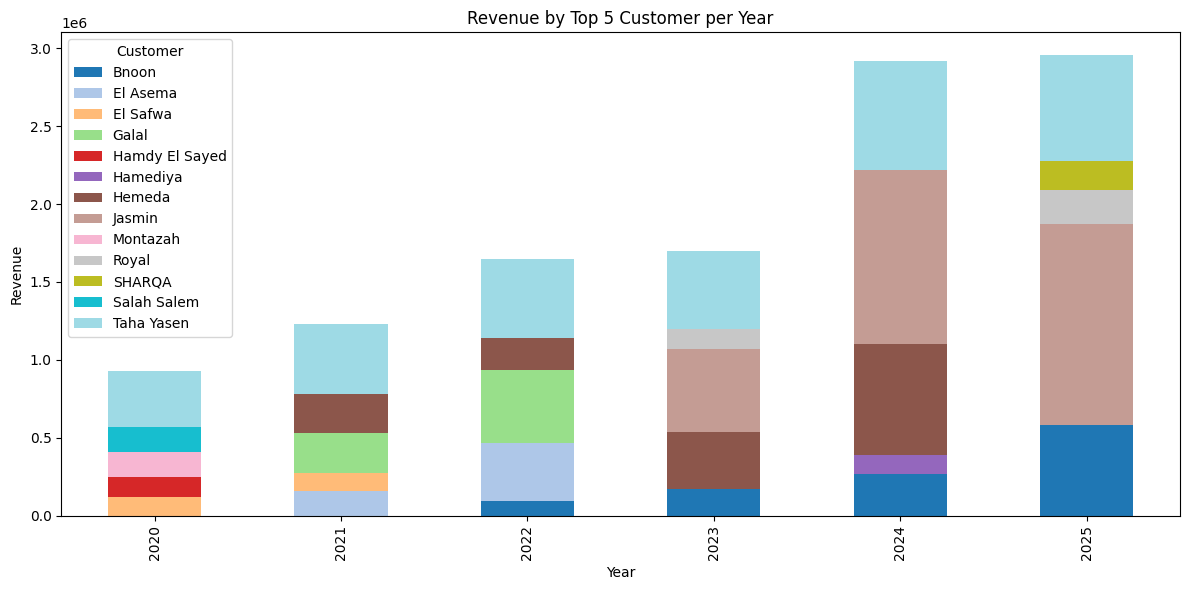

In [ ]:

Top_5_yearly_customer_pivot = top_5_customers_yearly.pivot(index='Year', columns='Client', values='Total Selling Price')
# pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
Top_5_yearly_customer_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Revenue')
plt.title('Revenue by Top 5 Customer per Year')
# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

In [ ]:

yearly_customer_pivot = yearly_customer.pivot(index='Year', columns='Client', values='Total Selling Price')
yearly_customer_pivot


Client,ADAM,Abd El Hamid,Adam Banha,Al Forkan,Al Moaezz / El Kasr El Einy,Al Srour,Amina,Arkan Center,Asmaa S Salem,Bnoon,...,Sharqia,Shourok,Tabarak,Taha Yasen,Tarooty,Tulip,Wady El Tip,Zagazig University,Zina El Hayat,Zohour El Hayat
Year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,69339.0,50337.00,NaN,7440.0,2310.0,NaN,NaN,4055.0,4247.0,...,72932.5,NaN,NaN,360694.40,14813.0,NaN,NaN,12752.5,18035.0,NaN
2021,NaN,16426.2,95585.25,2422.5,NaN,NaN,NaN,NaN,NaN,80685.0,...,3195.0,NaN,3115.0,450513.20,13930.0,16940.0,NaN,NaN,NaN,NaN
2022,NaN,3374.5,64742.75,NaN,NaN,NaN,NaN,NaN,NaN,94810.0,...,NaN,NaN,NaN,506875.80,30635.0,5921.0,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,42680.5,NaN,NaN,168780.0,...,NaN,3460.0,NaN,501027.50,NaN,NaN,38925.0,NaN,NaN,74597.75
2024,NaN,NaN,NaN,NaN,NaN,NaN,117873.0,NaN,NaN,267910.0,...,NaN,NaN,NaN,698892.20,NaN,NaN,27000.0,NaN,NaN,42355.00
2025,55666.0,NaN,NaN,NaN,NaN,NaN,180897.5,29737.5,NaN,579930.0,...,16331.0,NaN,NaN,679153.96,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100
pivot_percent_customer

Client,ADAM,Abd El Hamid,Adam Banha,Al Forkan,Al Moaezz / El Kasr El Einy,Al Srour,Amina,Arkan Center,Asmaa S Salem,Bnoon,...,Sharqia,Shourok,Tabarak,Taha Yasen,Tarooty,Tulip,Wady El Tip,Zagazig University,Zina El Hayat,Zohour El Hayat
Year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,4.395073,3.190626,NaN,0.471587,0.14642,NaN,NaN,0.257027,0.269197,...,4.622848,NaN,NaN,22.862721,0.938926,NaN,NaN,0.808321,1.143154,NaN
2021,NaN,1.031144,6.000302,0.152071,NaN,NaN,NaN,NaN,NaN,5.064949,...,0.200564,NaN,0.195542,28.280675,0.874447,1.063398,NaN,NaN,NaN,NaN
2022,NaN,0.175138,3.360186,NaN,NaN,NaN,NaN,NaN,NaN,4.920693,...,NaN,NaN,NaN,26.307143,1.589974,0.307303,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,1.934272,NaN,NaN,7.649075,...,NaN,0.156806,NaN,22.706464,NaN,NaN,1.764073,NaN,NaN,3.380755
2024,NaN,NaN,NaN,NaN,NaN,NaN,3.648768,NaN,NaN,8.293174,...,NaN,NaN,NaN,21.634261,NaN,NaN,0.835787,NaN,NaN,1.311102
2025,1.640654,NaN,NaN,NaN,NaN,NaN,5.331625,0.876459,NaN,17.092383,...,0.481327,NaN,NaN,20.016829,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dft = pivot_percent_customer.T
top=dft.apply(lambda x: x.nlargest(5).index, axis=0)

top_dict = top.to_dict(orient='list')
top_dict


{2020: ['Taha Yasen', 'Montazah', 'Salah Salem', 'Hamdy El Sayed', 'El Safwa'],
 2021: ['Taha Yasen', 'Galal', 'Hemeda', 'El Asema', 'El Safwa'],
 2022: ['Taha Yasen', 'Galal', 'El Asema', 'Hemeda', 'Bnoon'],
 2023: ['Jasmin', 'Taha Yasen', 'Hemeda', 'Bnoon', 'Royal'],
 2024: ['Jasmin', 'Hemeda', 'Taha Yasen', 'Bnoon', 'Hamediya'],
 2025: ['Jasmin', 'Taha Yasen', 'Bnoon', 'Royal', 'SHARQA']}

In [ ]:
# Create a copy to store the filtered values
filtered_df = pd.DataFrame(index=pivot_percent_customer.index, columns=pivot_percent_customer.columns)

# Loop through each year and filter the row to only include top 5 customers
for year, top_customers in top_dict.items():
    for customer in top_customers:
        if customer in pivot_percent_customer.columns:
            filtered_df.at[int(year), customer] = pivot_percent_customer.at[int(year), customer]

# Drop all columns that are completely NaN (i.e. customers not in any top 5)
filtered_df = filtered_df.dropna(axis=1, how='all')
filtered_df

Client,Bnoon,El Asema,El Safwa,Galal,Hamdy El Sayed,Hamediya,Hemeda,Jasmin,Montazah,Royal,SHARQA,Salah Salem,Taha Yasen
Year,,,,,,,,,,,,,
2020,NaN,NaN,7.747157,NaN,8.054863,NaN,NaN,NaN,10.125795,NaN,NaN,10.115209,22.862721
2021,NaN,9.860412,7.45963,16.075624,NaN,NaN,15.659593,NaN,NaN,NaN,NaN,NaN,28.280675
2022,4.920693,19.377514,NaN,24.336469,NaN,NaN,10.563873,NaN,NaN,NaN,NaN,NaN,26.307143
2023,7.649075,NaN,NaN,NaN,NaN,NaN,16.587254,24.234602,NaN,5.780993,NaN,NaN,22.706464
2024,8.293174,NaN,NaN,NaN,NaN,3.749457,22.123245,34.523121,NaN,NaN,NaN,NaN,21.634261
2025,17.092383,NaN,NaN,NaN,NaN,NaN,NaN,37.99923,NaN,6.493326,5.479448,NaN,20.016829


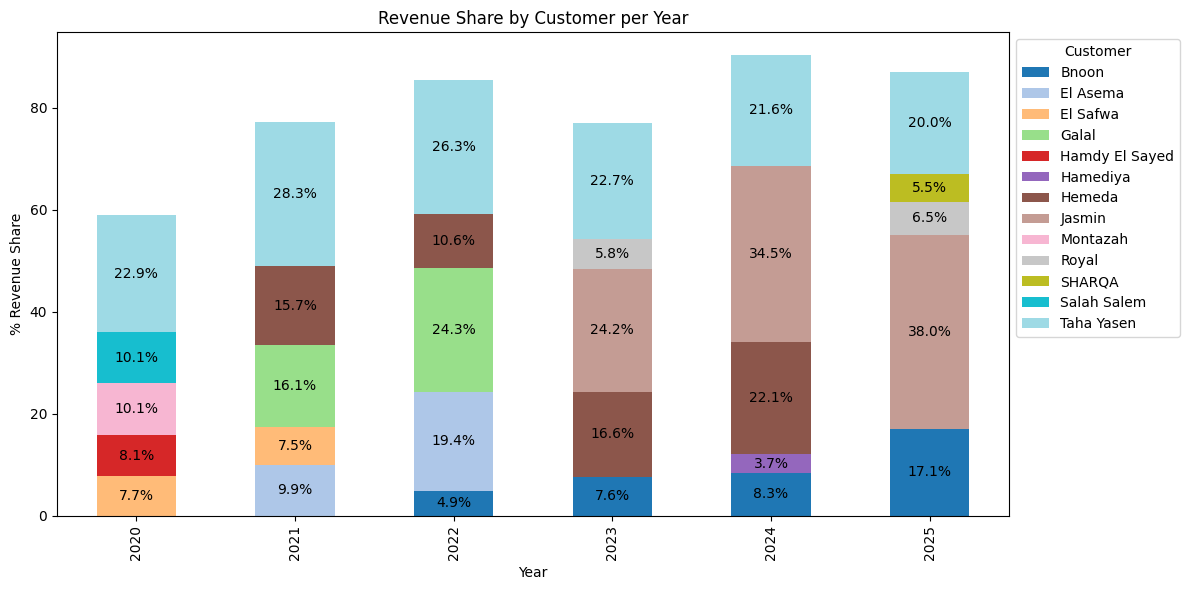

In [ ]:

# Plot and capture the Axes
ax = filtered_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Set labels and title
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Customer per Year')

# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(1, 1),
    loc='upper left'
)

# Annotate each bar segment with its value
for container in ax.containers:
    # Only show labels for segments with non-zero height
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='Black' if height > 5 else 'black'  # Adjust for visibility
            )

plt.tight_layout()
plt.show()


# Insight 13 : the market share of most valuable customers is increased year by year and this is a very good sign.

#### 3. Scatter Plot - Customer Revenue vs Profit Margin

In [ ]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
63,Taha Yasen,3197157.06,344915.64,351,238,97,6,139297,10.788198,22.955936
38,Jasmin,2939293.25,335280.1,112,118,53,3,78331,11.406827,44.060382
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,55.771921
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,64.361931
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
...,...,...,...,...,...,...,...,...,...,...
43,Madina,900,225,1,1,1,1,3,25.0,99.990497
18,Dr. Salah,512.5,42.5,2,5,4,1,32,8.292683,99.994177
16,Dr. Islam Sameer,383,36.0,1,3,3,1,4,9.399478,99.996927
37,Ibn Sina,321,30,1,1,1,1,3,9.345794,99.999232


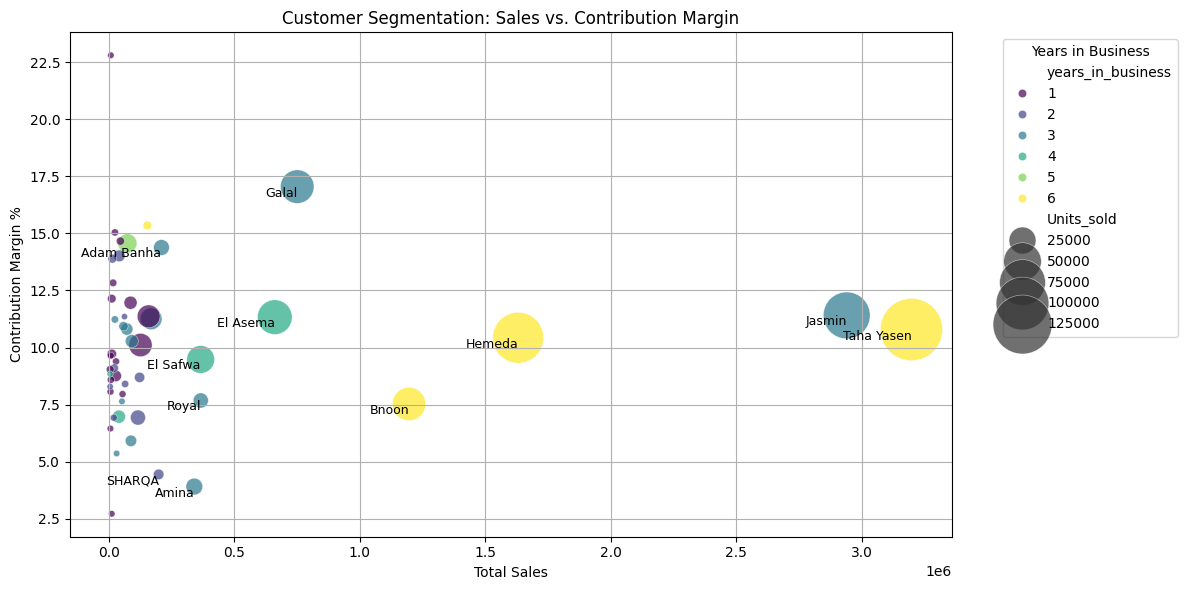

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Customer_data.head(50), x='Sales_sum', y='Contribution Margin %', size='Units_sold', hue='years_in_business', palette='viridis', sizes=(20, 2000), alpha=0.7)
plt.title('Customer Segmentation: Sales vs. Contribution Margin')
plt.xlabel('Total Sales')
plt.ylabel('Contribution Margin %')

# Add labels for the top 10 customers by Sales
for i in range(Customer_data.head(11).shape[0]):
    plt.text(
        Customer_data.iloc[i]['Sales_sum'], 
        Customer_data.iloc[i]['Contribution Margin %'], 
        Customer_data.iloc[i].Client,  # Assuming 'name' is the customer identifier or you can use another column
        fontsize=9,
        ha='right',
        va='top'
    )
    
plt.legend(title='Years in Business', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Insight 14: recommended to increase the CM of Taha Yasen and Jasmin alittle bit higher this will reflects directly on profits.

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=Customer_data.head(70), x='Sales_sum', y='Contribution Margin %', size='Units_sold', hue='years_in_business', palette='viridis', sizes=(20, 200), alpha=0.7)
# plt.title('Customer Segmentation: Sales vs. Contribution Margin')
# plt.xlabel('Total Sales')
# plt.ylabel('Contribution Margin %')
# plt.xlim(0, 800000)
# # Add labels for the top 10 customers by Sales
# for i in range(Customer_data.sort_values(by='Contribution Margin %', ascending = False).head(11).shape[0]):
#     plt.text(
#         Customer_data.sort_values(by='Contribution Margin %', ascending = False).iloc[i]['Sales_sum'], 
#         Customer_data.sort_values(by='Contribution Margin %', ascending = False).iloc[i]['Contribution Margin %'], 
#         Customer_data.sort_values(by='Contribution Margin %', ascending = False).iloc[i].Client,  # Assuming 'name' is the customer identifier or you can use another column
#         fontsize=9,
#         ha='right',
#         va='top'
#     )
    
# plt.legend(title='Years in Business', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
Customer_data.sort_values(by='Contribution Margin %').tail(11)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
2,Adam Banha,210665.0,30296.55,165,17,11,3,7705,14.381388,83.742349
32,Eman Khairy,74832.25,10897.75,56,13,8,5,11984,14.562906,93.754688
42,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,32,1,1097,14.661221,96.75355
59,Shady,25448.0,3827.75,8,27,18,1,572,15.041457,98.188546
11,Cash Customer,154423.3,23697.55,96,49,31,6,1363.5,15.345838,88.645262
3,Al Forkan,2422.5,375.0,4,4,4,1,165,15.479876,99.89987
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
46,Merchant,1250,250,1,1,1,1,5,20.0,99.984035
31,Emad Montazah,9234,2105.5,9,5,4,1,187,22.801603,99.333278
61,Shourok,3460,796,1,3,1,1,5,23.00578,99.840939


### 2. Churn Rate (Lost Customers ÷ Previous Customers)

#### Churn rate trend across 6 years

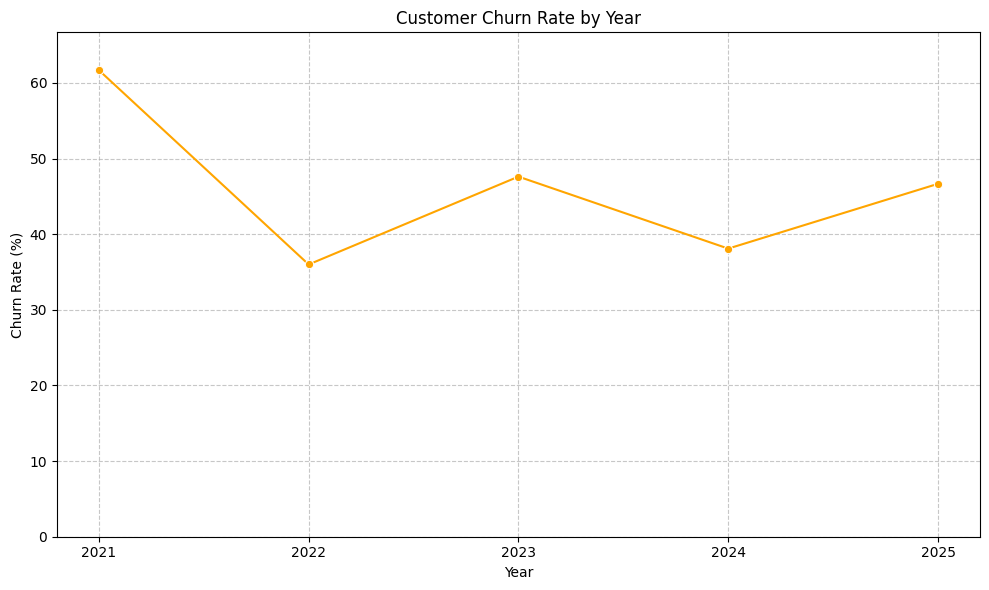

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Churn Rate after Clients Dropped

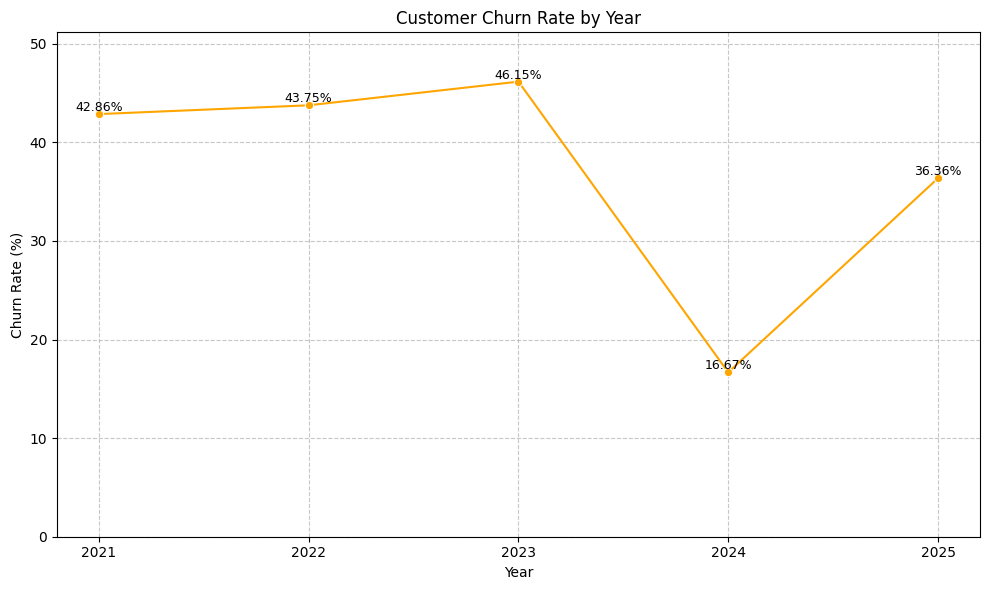

In [ ]:
drooped_customers_per_year = original_df[~original_df['Client'].isin(dropped_customer_list)].groupby('Year')['Client'].unique().apply(set).reset_index()
# customers_per_year
# dropped_customer_list
churn_data_dropped = []

for i in range(1, len(drooped_customers_per_year)):
    year = drooped_customers_per_year.loc[i, 'Year']
    current = drooped_customers_per_year.loc[i, 'Client']
    previous = drooped_customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate_dropped = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data_dropped.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate_dropped, 2)
    })

churn_df_dropped = pd.DataFrame(churn_data_dropped)
churn_df_dropped


plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df_dropped, x='Year', y='Churn Rate (%)', marker='o', color='orange')

for i in range(len(churn_df_dropped)):
    plt.text(churn_df_dropped.iloc[i]['Year'],
             churn_df_dropped.iloc[i]['Churn Rate (%)'],
             f"{churn_df_dropped.iloc[i]['Churn Rate (%)']}%",fontsize=9,
        ha='center',
        color = 'black',
        va='bottom',verticalalignment='bottom'
    )


plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df_dropped['Year'])
plt.ylim(0, churn_df_dropped['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Funnel Chart after dropped clients

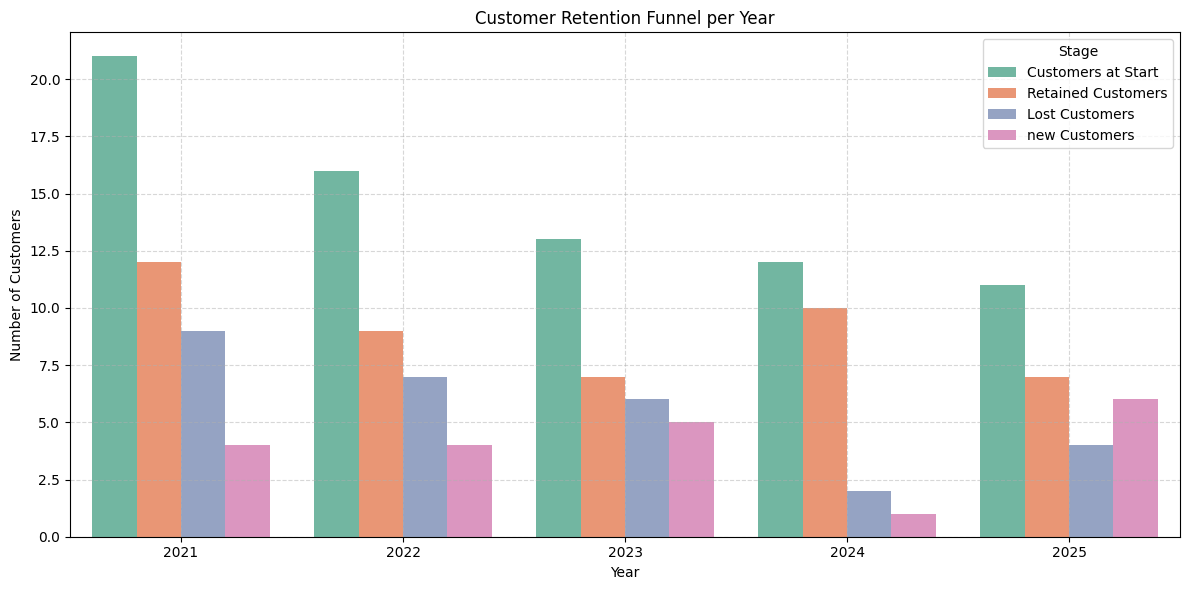

In [ ]:
churn_df_dropped_long = churn_df_dropped.melt(
    id_vars='Year',
    value_vars=['Customers at Start', 'Retained Customers', 'Lost Customers','new Customers'],
    var_name='Stage',
    value_name='Customer Count'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=churn_df_dropped_long, x='Year', y='Customer Count', hue='Stage', palette='Set2')
plt.title('Customer Retention Funnel per Year')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
Profit_margin

,Year,Profit_sum,Selling_sum,Profit_Margin
0,2020,153163.8875,1577652.9625,9.708338
1,2021,142369.188431,1593147.228431,8.936348
2,2022,272364.6228,1926761.1328,14.135879
3,2023,259498.91,2213421.3,11.723882
4,2024,324551.23,3290487.95,9.863316
5,2025,329935.86,3392914.76,9.72426


#### 3. Gross Margin % Trend
#### Consumables


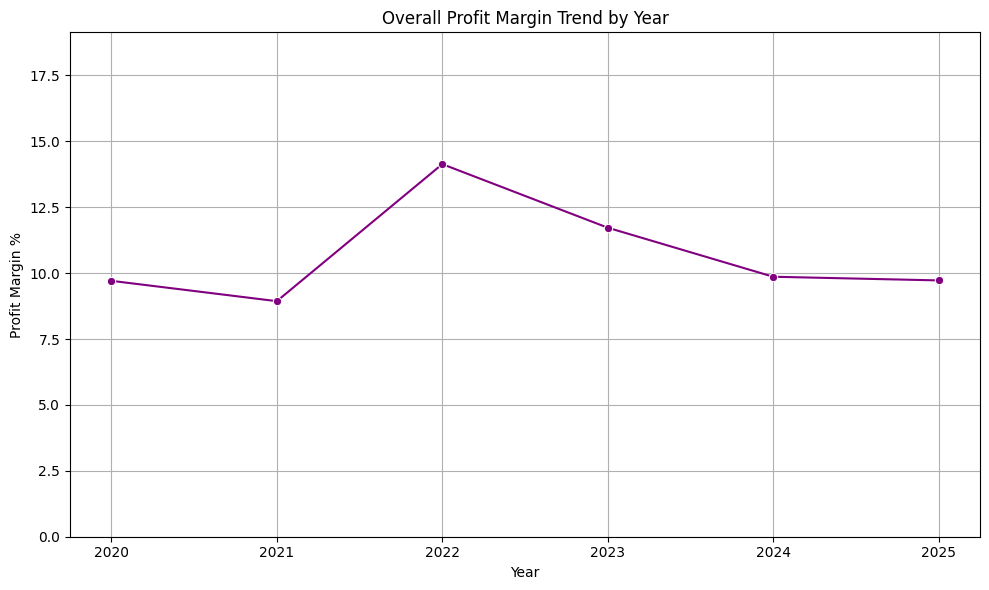

In [ ]:
# Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
#                                                  Selling_sum=("Total Selling Price", "sum"),
#                                                     Buying_sum=("Total Buying Price", "sum")
#     )
#     .reset_index()
# )

# Then calculate profit margin
Profit_margin["Profit_Margin"] = Profit_margin["Profit_sum"] / Profit_margin["Selling_sum"]*100
Profit_margin

plt.figure(figsize=(10, 6))
sns.lineplot(data=Profit_margin, x='Year', y='Profit_Margin', marker='o', color='purple')

    
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin %')
plt.ylim(0, Profit_margin['Profit_Margin'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
yearly_customer_profit

,Year,Client,revenue,cogs,Profit
41,2020,Taha Yasen,360465.4000,335198.500,25266.9000
7,2020,Cash Customer,114551.5000,94376.500,20175.0000
31,2020,Montazah,160354.9000,142630.430,17724.4700
38,2020,Salah Salem,159627.9000,142312.020,17315.8800
22,2020,Hamdy El Sayed,126214.2825,113491.035,12723.2475
...,...,...,...,...,...
136,2025,Cash Customer,14675.0000,13810.000,865.0000
146,2025,Zinat El Hayat,8800.0000,8600.000,200.0000
148,2025,montazah,3875.0000,3675.000,200.0000
147,2025,eman khairy,4375.0000,4275.000,100.0000


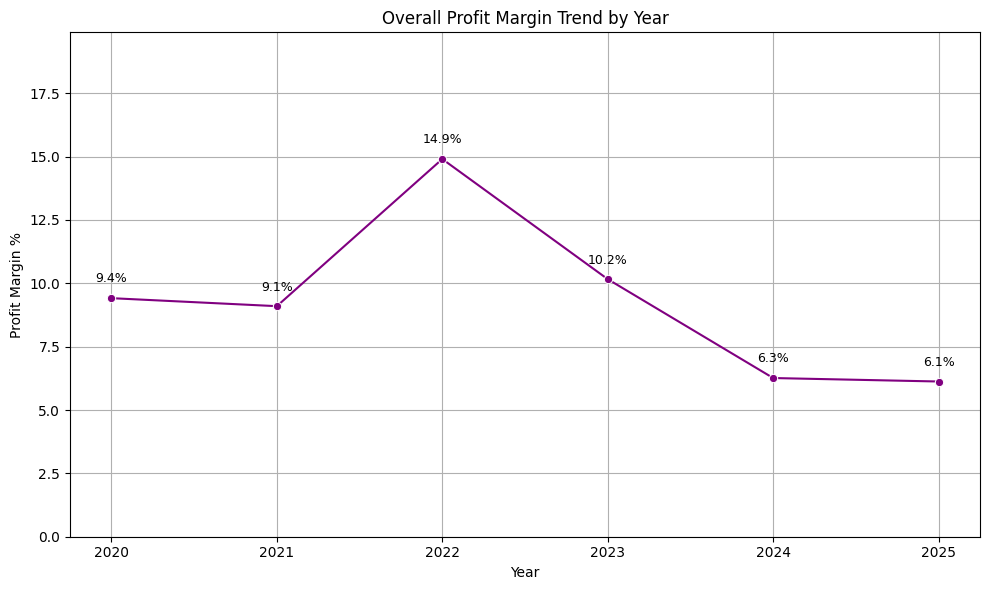

In [ ]:
yearly_profit = yearly_customer_profit.groupby('Year').agg(Profit=('Profit', 'sum'),
                                                           revenue = ('revenue', 'sum')).reset_index()
yearly_profit['Profit_%'] = yearly_profit['Profit'] / yearly_profit['revenue'] * 100


plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_profit, x='Year', y='Profit_%', marker='o', color='purple')

for i in range(len(yearly_profit)):
    plt.text(yearly_profit.iloc[i]['Year'],
             yearly_profit.iloc[i]['Profit_%'] + 0.5,
             f"{round(yearly_profit.iloc[i]['Profit_%'], 1)}%" ,
             fontsize=9,
        ha='center',
        color = 'black',
        va='bottom',verticalalignment='bottom'
    )
    
    
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin %')
plt.ylim(0, yearly_profit['Profit_%'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

# Insight 15 : Despite GP% clearly dropped in 2024 and 2025 , GP amount increased in an obvious way as the new pharmaceutical branch works with cost reduction strategy which low profits and high numbers of sales. But we need keep it stick it between 6.5 and 7% in 2026

# Conclusion : The firm is doing well but it needs to insert financial data in analysis to check cash flow , sales and GP are good , expenses is very high.
# Recommended actions : 1- increase sales alittle bit 2- increase GP% alittle bit 3- insert a new branch to the market with the same number of emplyees to solve NP problem 4- insert new cash in the begining of 2026 5- add two big customers or four small ones to avoid risk 6- add two new suppliers 7- revise suppliers deals for the top three categories 8-track dashboards to ensure that 2026 will closed in the desired percentages we have recommended before.

In [ ]:
# # Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
# #                                                  Selling_sum=("Total Selling Price", "sum"),
# #                                                     Buying_sum=("Total Buying Price", "sum")
# #     )
# #     .reset_index()
# # )
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=Profit_margin, x='Year', y='Profit_sum', marker='o', color='purple')
# plt.title('Overall Profit Margin Trend by Year')
# plt.xlabel('Year')
# plt.ylabel('Profit Margin (EGP)')
# plt.ylim(0, Profit_margin['Profit_sum'].max() + 50000)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# Profit_margin

In [ ]:
# Profit_margin['Year'] = pd.to_numeric(Profit_margin['Year'], errors='coerce')
# Profit_margin['Selling_sum'] = pd.to_numeric(Profit_margin['Selling_sum'], errors='coerce')
# Profit_margin['Buying_sum'] = pd.to_numeric(Profit_margin['Buying_sum'], errors='coerce')

# plt.figure(figsize=(10, 6))

# plt.stackplot(
#     Profit_margin['Year'],
#     Profit_margin['Selling_sum'],
#     Profit_margin['Buying_sum'],
#     labels=['Selling_sum', 'Buying_sum'],
#     colors=['#4CAF50', '#F44336'],
#     alpha=0.8
# )

# plt.title('Revenue vs COGS (Stacked Area)')
# plt.xlabel('Year')
# plt.ylabel('Amount')
# plt.legend(loc='upper left')
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

### 4. Marketing ROI



#### Definition: (Revenue Attributed to Marketing ÷ Marketing Spend).
#### Why: Shows which campaigns are actually profitable.
#### ✅ Suggested Charts:
#### Bar Chart → ROI by marketing campaign.
#### Bubble Chart → Campaign ROI (size = spend, color = ROI).
#### Line + Bar Combo Chart → Spend (bar) vs ROI (line).

### 5. Supplier Dependency Ratio


#### Supplier purchase distribution (Top 3 vs Others)

In [ ]:
# supplier_by_year = original_df.groupby(['Supplier','Year'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])
# supplier_satcked = supplier_by_year.pivot(index='Year', columns='Supplier', values='Total Buying Price').loc[:, Supplier['Supplier'].head(5)]  # Keep only top 10 suppliers
# supplier_satcked = supplier_satcked.apply(pd.to_numeric, errors='coerce')
# supplier_satcked

In [ ]:
# # plt.figure(figsize=(10, 6))
# # sns.heatmap(supplier_satcked, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f') #, cbar_kws={'label': 'Total Buying Price'}

# # Plot the heatmap
# plt.figure(figsize=(15, 8))
# sns.heatmap(supplier_satcked.T, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# # Add title and labels
# plt.title('Supplier vs Year spend intensity', fontsize=16)
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Suppliers', fontsize=12)

# # Show the plot
# plt.tight_layout()
# plt.show()

In [ ]:
# yearly_supplier = original_df.groupby(['Year','Supplier'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])

# yearly_supplier_pivot = yearly_supplier.pivot(index='Year', columns='Supplier', values='Total Buying Price')

# pivot_percent_supplier = yearly_supplier_pivot.div(yearly_supplier_pivot.sum(axis=1), axis=0) * 100

# dfs = pivot_percent_supplier.T.apply(pd.to_numeric, errors='coerce')

# top=dfs.apply(lambda x: x.nlargest(5).index, axis=0)

# top_dict = top.to_dict(orient='list')
# top_dict

# # Create a copy to store the filtered values
# filtered_supplier_df = pd.DataFrame(index=pivot_percent_supplier.index, columns=pivot_percent_supplier.columns)

# # Loop through each year and filter the row to only include top 5 customers
# for year, top_suppliers in top_dict.items():
#     for supplier in top_suppliers:
#         if supplier in pivot_percent_supplier.columns:
#             filtered_supplier_df.at[int(year), supplier] = pivot_percent_supplier.at[int(year), supplier]

# # Drop all columns that are completely NaN (i.e. customers not in any top 5)
# filtered_supplier_df = filtered_supplier_df.dropna(axis=1, how='all')
# filtered_supplier_df


# # Plot and capture the Axes
# ax = filtered_supplier_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# # Set labels and title
# plt.ylabel('% Revenue Share')
# plt.title('COGS Share by Supplier per Year')

# # Move legend outside the plot
# plt.legend(
#     title='Customer',
#     bbox_to_anchor=(1, 1),
#     loc='upper left'
# )

# # Annotate each bar segment with its value
# for container in ax.containers:
#     # Only show labels for segments with non-zero height
#     for bar in container:
#         height = bar.get_height()
#         if height > 0:
#             ax.text(
#                 bar.get_x() + bar.get_width() / 2,
#                 bar.get_y() + height / 2,
#                 f'{height:.1f}%',
#                 ha='center',
#                 va='center',
#                 fontsize=10,
#                 color='Black' if height > 5 else 'black'  # Adjust for visibility
#             )

# plt.tight_layout()
# plt.show()

In [ ]:
# yearly_supplier

## 🔮 Phase 5 – Predictive Analytics (What will happen?)


### 1. Forecasted Sales (Next 12–24 Months)


In [ ]:
# df2 = original_df.groupby(['Year','Month'])['Total Selling Price'].sum().reset_index()

# df2.to_excel('monthly_sales.xlsx', index=False)

In [ ]:
# df2['Total Selling Price'] = pd.to_numeric(df2['Total Selling Price'], errors='coerce')

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(df2['Total Selling Price'], order=(1,1,1))
# results = model.fit()
# print(results.summary())

# forecast = results.forecast(steps=12)


In [ ]:
# forecast

In [ ]:
# from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# model = SimpleExpSmoothing(df2['Total Selling Price'], initialization_method="estimated")
# fit = model.fit()

# # Forecast next 12 months
# forecast = fit.forecast(12)
# forecast

In [ ]:
# from statsmodels.tsa.holtwinters import Holt

# model = Holt(df2['Total Selling Price'], initialization_method="estimated")
# fit = model.fit()
# forecast = fit.forecast(12)

# forecast.plot(label='Holt Forecast', figsize=(12,6))
# df2['Total Selling Price'].plot(label='Actual')
# plt.legend()
# plt.title('Holt’s Linear Trend Forecast')
# plt.show()

In [ ]:
# forecast

## will complete it later after adding financial data to make a precise model

original_df['Client]

In [ ]:
# original_df['Client'].value_counts()
# # pd.set_option('display.max_rows',None)
# original_df['Client'].value_counts().reset_index().sort_values(by= 'Client')


In [ ]:
# Revenue_per_category_25 = original_df[original_df['Year'] == 2025].groupby('Category').agg(revenue = ("Total Selling Price" , "sum"),
#                                                                                            profit = ("Profit","sum")).reset_index().sort_values(by='revenue', ascending=False).reset_index()
# Revenue_per_category_25['percentage from sales'] = Revenue_per_category_25['revenue'] / Revenue_per_category_25['revenue'].sum()* 100
# Revenue_per_category_25['Profit %'] = Revenue_per_category_25['profit'] / Revenue_per_category_25['revenue'] * 100

# Revenue_per_category_25

In [ ]:
# Revenue_per_category_25['profit'].sum() / Revenue_per_category_25['revenue'].sum()

In [ ]:
# Revenue_per_category_25['cumsum'] = Revenue_per_category_25['percentage from sales'].cumsum()

In [ ]:
# Revenue_per_category_25

In [ ]:
# category_data = original_df[['Product Name', 'Category']]
# category_data.head()

In [ ]:
# category_data.to_excel('category_data.xlsx', index=False)